<div style="text-align:center">
    <img src="logo.png" alt="logo.png" />
</div>

<h1><center>Projet 2: Analysez des données de systèmes éducatifs</center></h1>


In [1]:
# Importation des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

### Sommaire

* [Exploration des fichiers](#chapter1)
    * [Fichier EdStatsCountry.csv](#section_1_1)
    * [Fichier EdStatsCountry-Series.csv](#section_1_2)
    * [Fichier EdStatsData.csv](#section_1_3)
    * [Fichier EdStatsFootNote.csv](#section_1_4)
    * [Fichier EdStatsSeries.csv](#section_1_5)
* [Conclusion de l'analyse exploratoire de mes 5 fichiers](#chapter2)
* [Selection des indicateurs](#chapter3)
    * [Indicateur revenu](#section_3_1)
    * [Indicateur pour les études secondaires](#section_3_2)
    * [Indicateur pour les études supérieures](#section_3_3)
    * [Indicateur Démographique](#section_3_4)
    * [Indicateur Stabilité politique](#section_3_5)
    * [Indicateur Accès à Internet](#section_3_6)
* [Préparation des données sélectionnées](#chapter4)
    * [Sélection des pays](#section_4_1)
    * [Sélection des indicateurs](#section_4_2)
    * [Concaténations et jointure](#section_4_3)
    * [Valeurs manquantes](#section_4_4)
    * [Choix des années](#section_4_5)
* [Analyse des données](#chapter5)
    * [Ordre de grandeur des indicateurs par région en 2015](#section_5_1) 
    * [ACP](#section_5_2) 
    * [Classification ascendante hiérarchique](#section_5_3) 
    * [Clustermap](#section_5_4) 
    * [Boxplot des clusters](#section_5_5) 
    * [Choix des clusters](#section_5_6) 
* [Evolution des indicateurs des pays sélectionnés](#chapter6)
    * [Indicateur Population](#section_6_1) 
    * [Indicateur de revenus](#section_6_2) 
    * [Indicateur Etudes Secondaires](#section_6_3) 
    * [Indicateur Etudes Supérieures](#section_6_4) 
    * [Indicateur Internet](#section_6_5) 
    * [Indicateur Stabilité Politique](#section_6_6) 
* [Conclusion](#chapter7)

# Exploration des fichiers<a class="anchor" id="chapter1"></a>

## Fichier EdStatsCountry.csv <a class="anchor" id="section_1_1"></a>

In [2]:
# Ouverture du fichier EdStatsCountry
pays = pd.read_csv('EdStatsCountry.csv')

In [3]:
# Affichage des premières lignes du fichier
pays.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
# Affichage des dernières lignes du fichier
pays.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [5]:
# Taille de la dataframe
pays.shape

(241, 32)

In [6]:
# Description de chaque colonne du dataframe
pays.describe(include = 'all')

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


In [7]:
# Affichage des informations du dataframe
pays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Ce dataframe comprend 32 colonnes et 241 lignes.  
* Les colonnes 0 à 4 donnent des informations sur le nom du pays.
* La colonne 5 indique la monnaie locale.
* La colonne 6 donne des précisions supplémentaires sur un événement liés à l'économie du pays.
* La colonne 7 indique la région où se situe le pays.
* Les colonnes de 8 à 30 concernent des indicateurs sociaux et économiques du pays.    


In [8]:
# Création d'une boucle pour afficher le nombre de valeurs uniques par colonne 
for col in pays:
    print("_ _ _ _ _ _ _ _ _ _")  
    print("_____",col,pays[col].nunique(),"éléments","____") 
    print(col,pays[col].unique()) 
    print("_ _ _ _ _ _ _ _ _ _")   

_ _ _ _ _ _ _ _ _ _
_____ Country Code 241 éléments ____
Country Code ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI'
 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAP' 'EAS' 'ECA'
 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH' 'EUU' 'FIN' 'FJI' 'FRA'
 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC'
 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN'
 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN'
 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR'
 'LBY' 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTU' 'LUX'
 'LVA' 'MAC' 'MAF' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'MNP' 'MOZ'

Remarque :  
* Plusieurs colonnes sont des descriptions et ne contiennent pas de données numériques
* La colonne Short Name comprend aussi le nom de régions et de classes sociales
* La dernière colonne ne contient aucune données.

In [9]:
# Je crée une liste qui regroupe uniquement les pays afin de filtrer ma dataframe
liste_pays = ['Aruba', 'Afghanistan', 'Angola' ,'Albania', 'Andorra',
 'United Arab Emirates' ,'Argentina' ,'Armenia', 'American Samoa',
 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan' ,'Burundi',
 'Belgium', 'Benin', 'Burkina Faso' ,'Bangladesh' ,'Bulgaria', 'Bahrain',
 'The Bahamas' ,'Bosnia and Herzegovina', 'Belarus' ,'Belize', 'Bermuda',
 'Bolivia', 'Brazil', 'Barbados', 'Brunei' ,'Bhutan', 'Botswana',
 'Central African Republic', 'Canada' ,'Switzerland', 'Channel Islands',
 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo' ,'Congo',
 'Colombia' ,'Comoros', 'Cabo Verde', 'Costa Rica' ,'Cuba' ,'Curaçao',
 'Cayman Islands' ,'Cyprus' ,'Czech Republic' ,'Germany' ,'Djibouti',
 'Dominica' ,'Denmark' ,'Dominican Republic', 'Algeria','Ecuador', 'Egypt',
 'Eritrea', 'Spain' ,'Estonia', 'Ethiopia' ,'Finland' ,'Fiji',
 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom' ,'Georgia',
 'Ghana', 'Gibraltar', 'Guinea' ,'The Gambia', 'Guinea-Bissau',
 'Equatorial Guinea','Greece', 'Grenada' ,'Greenland', 'Guatemala', 'Guam',
 'Guyana', 'Hong Kong SAR, China' ,'Honduras','Croatia' ,'Haiti' 'Hungary',
 'Indonesia', 'Isle of Man', 'India' ,'Ireland', 'Iran' ,'Iraq' ,'Iceland',
 'Israel', 'Italy','Jamaica' ,'Jordan', 'Japan', 'Kazakhstan', 'Kenya',
 'Kyrgyz Republic' ,'Cambodia' ,'Kiribati', 'St. Kitts and Nevis' ,'Korea',
 'Kuwait','Lao PDR', 'Lebanon', 'Liberia', 'Libya' ,'St. Lucia',
 'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
 'St. Martin (French part)' ,'Morocco' ,'Monaco' ,'Moldova', 'Madagascar',
 'Maldives' , 'Mexico', 'Marshall Islands' ,'Macedonia', 'Mali' ,'Malta', 'Myanmar',
 'Montenegro', 'Mongolia', 'Northern Mariana Islands', 'Mozambique' ,'Mauritania' ,'Mauritius', 'Malawi',
 'Malaysia' ,'Namibia' ,'New Caledonia' ,'Niger' ,'Nigeria',
 'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Nauru' ,'New Zealand',
 'Oman' ,'Pakistan', 'Panama' ,'Peru', 'Philippines', 'Palau',
 'Papua New Guinea', 'Poland', 'Puerto Rico', "Dem. People's Rep. Korea",
 'Portugal', 'Paraguay', 'West Bank and Gaza' ,'French Polynesia' ,'Qatar',
 'Romania' ,'Russia' ,'Rwanda' ,'Saudi Arabia' ,'Sudan', 'Senegal',
 'Singapore', 'Solomon Islands' ,'Sierra Leone' ,'El Salvador' ,'San Marino',
 'Somalia', 'Serbia','South Sudan', 'São Tomé and Principe',
 'Suriname', 'Slovak Republic', 'Slovenia' ,'Sweden', 'Swaziland',
 'Sint Maarten (Dutch part)', 'Seychelles' ,'Syrian Arab Republic',
 'Turks and Caicos Islands', 'Chad', 'Togo' ,'Thailand' ,'Tajikistan',
 'Turkmenistan', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago' ,'Tunisia',
 'Turkey' ,'Tuvalu', 'Tanzania' ,'Uganda', 'Ukraine' ,
 'Uruguay' ,'United States', 'Uzbekistan', 'St. Vincent and the Grenadines',
 'Venezuela', 'Virgin Islands' ,'Vietnam', 'Vanuatu','Samoa', 'Kosovo',
 'Yemen', 'South Africa', 'Zambia', 'Zimbabwe']

In [10]:
# Je crée une autre dataframe en incluant les colonnes Country Code, 2alpha code
df_pays_code = pays.loc[pays['Short Name'].isin(liste_pays)][['Short Name','Country Code']]

In [11]:
df_pays_code

,Short Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
236,Kosovo,XKX
237,Yemen,YEM
238,South Africa,ZAF
239,Zambia,ZMB


In [12]:
# J'affiche les regions
pays.Region.unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

La colonne Region contient des valeurs manquantes qu'il faudra compléter par la suite.

In [13]:
# J'affiche les différents niveaux de revenus
pays['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

La colonne Income Group contient également des valeurs manquantes qu'il faudra compléter.

In [14]:
# Je crée une dataframe qui contient la somme et le pourcentage des valeurs manquantes par colonne.
pays_val = { 'Nombre valeurs manquantes': pays.isnull().sum(), 'Pourcentage' :(pays.isnull().sum())/241*100 }
df_manquantes = pd.DataFrame(data=pays_val)

In [15]:
# Je tri mes valeurs par ordre décroissant
df_manquantes = df_manquantes.sort_values('Pourcentage', ascending = False)

In [16]:
df_manquantes

,Nombre valeurs manquantes,Pourcentage
Unnamed: 31,241,100.000000
National accounts reference year,209,86.721992
Alternative conversion factor,194,80.497925
Other groups,183,75.933610
Latest industrial data,134,55.601660
Vital registration complete,130,53.941909
External debt Reporting status,117,48.547718
Latest household survey,100,41.493776
Latest agricultural census,99,41.078838
Lending category,97,40.248963


Text(0.5, 1.0, 'Nombre de valeurs manquantes par colonne')

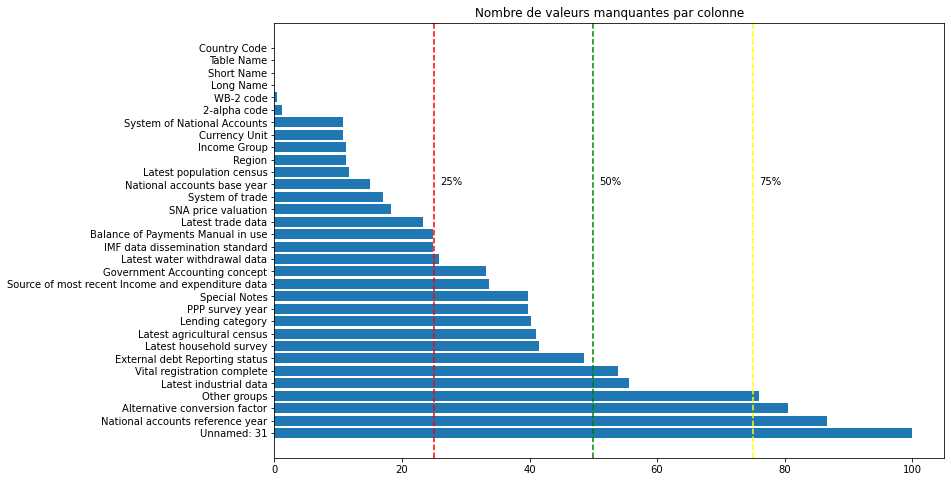

In [17]:
# Création d'un graphique pour afficher le nombre de valeurs manquantes par colonne
plt.figure(figsize=(12,8))
plt.barh(df_manquantes.index,df_manquantes['Pourcentage'])
# Ajout d'un repère 25% 
plt.axvline(25,color='red',linestyle='--')
plt.text(26,20,'25%')
# Ajout d'un repère 50%
plt.axvline(50,color='green',linestyle='--')
plt.text(51,20,'50%')
# Ajout d'un repère 75%
plt.axvline(75,color='yellow',linestyle='--')
plt.text(76,20,'75%')
plt.title("Nombre de valeurs manquantes par colonne")

4 colonnes contiennent plus de 75% de valeurs manquantes.  

9 colonnes contiennent entre 25% à 50% de valeurs manquantes.  

17 colonnes contiennent moins de 25% de valeurs manquantes.

In [18]:
# Je calcule la somme des doublons
pays.duplicated().sum()

0

Ce fichier ne contient pas de doublons.  
Je vais conserver les données des colonnes :
* 'Country Code'
* 'Short Name'
* 'Region'
* 'Income Group'

## Fichier EdStatsCountry-Series.csv <a class="anchor" id="section_1_2"></a>

In [19]:
# Ouverture du fichier Edstatscountry-Series
country_series = pd.read_csv('EdStatsCountry-Series.csv')

In [20]:
# Affichage de la taille de la dataframe
country_series.shape

(613, 4)

Ce fichier contient 4 colonnes et 613 lignes.

In [21]:
# Affichage du dataframe
country_series

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [22]:
# Affichage des informations du dataframe
country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


Ce fichier contient 4 colonnes:  
* Country Code : Code du pays
* Series Code : Code de l'indicateur
* Description : Source de l'indicateur
* Unnamed: 3 : Colonne vide

In [23]:
# Affichage du nombre de doublons présent dans le dataframe
country_series.duplicated().sum()

0

* Le fichier ne contient pas de valeurs manquantes ni de doublons.

In [24]:
# Description des colonnes
country_series.describe(include = 'all')

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


In [25]:
for col in country_series:
  
    print("_____",col,country_series[col].nunique(),"éléments","____") 
    print(col,country_series[col].unique())
    print("_ _ _ _ _ _ _ _ _ _")   

_____ CountryCode 211 éléments ____
CountryCode ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP'
 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST'
 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN'
 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN'
 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO'
 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MNP'
 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC' 'NLD' 'NOR'
 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG' 'POL' 'PRI' 'PRK'
 'P

In [26]:
# Je vais regarder comment sont répartis les indicateurs
indicateur = country_series.groupby('SeriesCode')['CountryCode'].count().reset_index();
indicateur = indicateur.sort_values(by='CountryCode', ascending=False)

In [27]:
indicateur

,SeriesCode,CountryCode
18,SP.POP.TOTL,211
17,SP.POP.GROW,211
4,NY.GDP.PCAP.PP.CD,19
5,NY.GDP.PCAP.PP.KD,19
8,NY.GNP.PCAP.PP.CD,19
0,NY.GDP.MKTP.PP.CD,14
6,NY.GNP.MKTP.PP.CD,14
1,NY.GDP.MKTP.PP.KD,14
12,SP.POP.0014.TO.ZS,13
19,SP.POP.TOTL.FE.ZS,13


C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


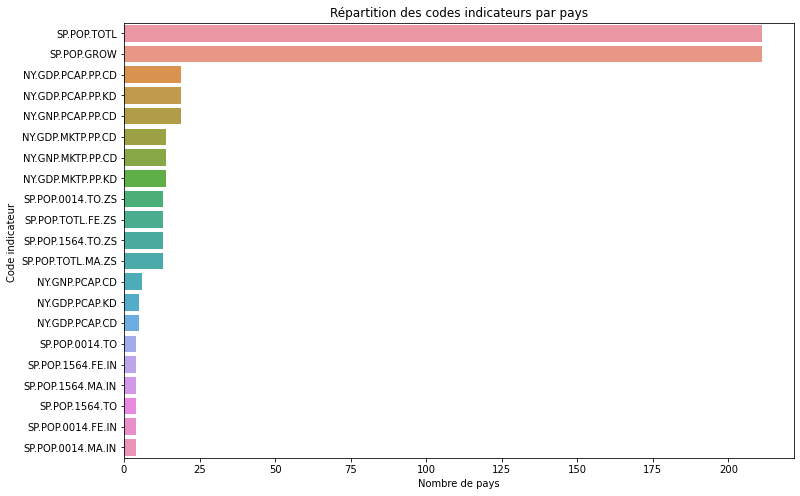

In [28]:
# Création d'un graphique pour afficher le nombre d'indicateurs par pays
plt.figure(figsize=(12,8))
sns.barplot(indicateur.CountryCode,indicateur.SeriesCode, orient = 'h')
plt.xlabel('Nombre de pays')
plt.ylabel('Code indicateur ')
plt.title('Répartition des codes indicateurs par pays')
plt.show()

In [29]:
# Affichage du nombre de codes pays
country_series.CountryCode.nunique()

211

In [30]:
# Affichage du nombre de descriptions
country_series.DESCRIPTION.nunique()

97

Le fichier contient 97 descriptions.

In [31]:
# Affichage du nombre de code pour les indicateurs
country_series.SeriesCode.nunique()

21

Le fichier contient 21 indicateurs

In [32]:
# Affichage des indicateurs
country_series.SeriesCode.unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

Définition des indicateurs :
* SP.POP.TOTL : Population totale
* SP.POP.GROW : Croissance démographique (% annuel)
* NY.GNP.MKTP.PP.CD : RNB, PPA (dollars internationaux courants)
* NY.GDP.PCAP.PP.KD : PIB par habitant, PPA (dollars internationaux constants de 2011)
* NY.GNP.PCAP.PP.CD : RNB (revenu national brut) par habitant, PPA (dollars internationaux courants)
* NY.GDP.MKTP.PP.CD : PIB, PPA (dollars internationaux courants)
* NY.GDP.MKTP.PP.KD : PIB, PPA (dollars internationaux constants de 2017)
* NY.GDP.PCAP.PP.CD : PIB par habitant, PPA (dollars internationaux courants)
* SP.POP.0014.FE.IN : Population âgée de 0 à 14 ans (% du total)
* SP.POP.1564.TO : Taux de dépendance par âge, personnes âgées (% de la population en âge de travailler)
* SP.POP.1564.MA.IN : Population âgée de 15 à 64 ans, hommes
* SP.POP.1564.FE.IN : Population âgée de 15 à 64 ans, femmes
* SP.POP.0014.TO : Population âgée de 0 à 14 ans, total
* SP.POP.0014.MA.IN : Population âgée de 0 à 14 ans, hommes (% de la population masculine)
* SP.POP.TOTL.FE.ZS : Population, femmes (% de la population totale)
* SP.POP.TOTL.MA.ZS : Population masculine (% de la population totale)
* SP.POP.0014.TO.ZS : Population âgée de 0 à 14 ans (% de la population totale)
* SP.POP.1564.TO.ZS : Population âgée de 15 à 64 ans (% du total)
* NY.GDP.PCAP.CD : PIB par habitant (USD courants)
* NY.GNP.PCAP.CD : RNB par habitant, méthode Atlas (USD courants)
* NY.GDP.PCAP.KD : 	PIB par habitant (USD constants de 2010)

In [33]:
# Je vais regarder comment sont répartis les descriptions
description = country_series.groupby(['DESCRIPTION','SeriesCode'])['CountryCode'].count().reset_index();
description = description.sort_values(by='CountryCode', ascending=False)

In [34]:
description.head(20)

,DESCRIPTION,SeriesCode,CountryCode
54,Data sources : United Nations World Population...,SP.POP.TOTL,145
89,Data sources: United Nations World Population ...,SP.POP.GROW,137
20,Data sources : Eurostat,SP.POP.TOTL,28
19,Data sources : Eurostat,SP.POP.GROW,26
102,Estimates are based on regression.,NY.GNP.MKTP.PP.CD,14
101,Estimates are based on regression.,NY.GDP.PCAP.PP.KD,14
103,Estimates are based on regression.,NY.GNP.PCAP.PP.CD,14
98,Estimates are based on regression.,NY.GDP.MKTP.PP.CD,14
99,Estimates are based on regression.,NY.GDP.MKTP.PP.KD,14
100,Estimates are based on regression.,NY.GDP.PCAP.PP.CD,14


C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Description les plus utilisées')

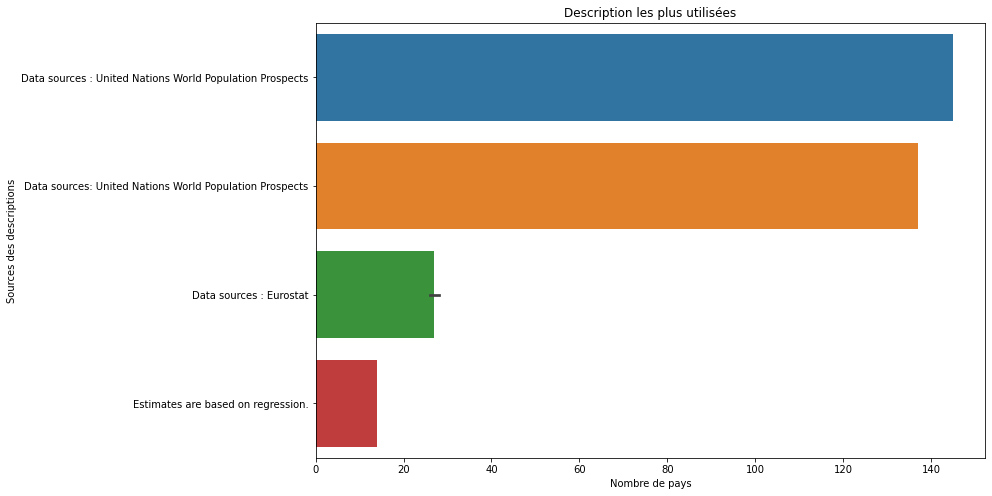

In [35]:
# Création d'un graphique pour afficher les descriptions les plus utilisées
description_top = description.loc[description['CountryCode']>10,]
plt.figure(figsize=(12,8))
sns.barplot(description_top['CountryCode'],description_top.DESCRIPTION, orient='h')
plt.xlabel('Nombre de pays')
plt.ylabel('Sources des descriptions')
plt.title('Description les plus utilisées' )

## Fichier EdStatsData.csv <a class="anchor" id="section_1_3"></a>

In [36]:
# Ouverture du fichier
data = pd.read_csv('EdStatsData.csv')

In [37]:
# Affichage de la dataframe
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Taille de la dataframe
data.shape

(886930, 70)

In [39]:
# Description de la dataframe
data.describe(include = 'all')

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,NaN,NaN,NaN,NaN,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,NaN,NaN,NaN,NaN,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,NaN,NaN,NaN,NaN,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN


In [40]:
# Affichage des informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Ce fichier comprend 70 colonnes et 886930 lignes.  
Il est constitué de 3 parties:
* Colonne 0 à 1 : Nom et code du pays
* Colonne 2 à 3 : Nom et code de l'indicateur
* Colonne 4 à 68 : chaque colonne représente une année (compris entre 1970 à 2017(saut de 1 an) puis 2020 jusqu'à 2100 (saut de 5 ans))
* La dernière colonne est une colonne vide.

In [41]:
data.duplicated().sum()

0

Le fichier ne contient pas de doublon.

In [42]:
# J'affiche le nombre de valeurs uniques par colonne
for col in data:
    print("___",col,data[col].nunique(),"___") 
    print(col,data[col].unique()) 
    print("_ _ _ _ _ _ _ _ _ _ _")   

___ Country Name 242 ___
Country Name ['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Her

On retrouve à nouveau des termes qui ne correspondent pas à un pays. 

In [43]:
# J'affiche les codes des indicateurs et leur nom.
data[['Indicator Code','Indicator Name']]

,Indicator Code,Indicator Name
0,UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, ..."
1,UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, ..."
2,UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, ..."
3,UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, ..."
4,SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sex..."
...,...,...
886925,UIS.LP.AG15T24.M,"Youth illiterate population, 15-24 years, male..."
886926,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, b..."
886927,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, f..."
886928,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, g..."


In [44]:
# J'affiche la fréquence d'utilisation des codes.
data['Indicator Code'].value_counts()

UIS.NERA.2              242
SP.POP.1018.FE.UN       242
SP.POP.1018.TO.UN       242
SP.POP.1115.FE.UN       242
SP.POP.1115.MA.UN       242
                       ... 
UIS.XPUBP.UK            242
UIS.XPUBP.2             242
UIS.XGOVEXP.IMF.2       242
UIS.XPUBP.4             242
SE.ADT.1524.LT.MA.ZS    242
Name: Indicator Code, Length: 3665, dtype: int64

In [45]:
data['Indicator Code'].nunique()

3665

Ce fichier comprend 3665 codes d'indicateur

In [46]:
# J'affiche le nombre d'indicateurs utilisés par année.
data.groupby('Indicator Name').count()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",242,242,242,4,29,29,25,29,22,27,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, female (%)",242,242,242,2,24,25,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, male (%)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, primary, both sexes (%)",242,242,242,15,15,17,18,19,21,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Youth illiterate population, 15-24 years, male (number)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, both sexes (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, female (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0


* Chaque indicateur est représenté pour chaque pays. Il faudra sélectionner par la suite **les plus pertinents**.

In [47]:
# Affichage des noms des indicateurs
data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

In [48]:
# Aperçu des informations pour mes colonnes années
data.loc[:,'1970':'2100'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 65 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1970    72288 non-null   float64
 1   1971    35537 non-null   float64
 2   1972    35619 non-null   float64
 3   1973    35545 non-null   float64
 4   1974    35730 non-null   float64
 5   1975    87306 non-null   float64
 6   1976    37483 non-null   float64
 7   1977    37574 non-null   float64
 8   1978    37576 non-null   float64
 9   1979    36809 non-null   float64
 10  1980    89122 non-null   float64
 11  1981    38777 non-null   float64
 12  1982    37511 non-null   float64
 13  1983    38460 non-null   float64
 14  1984    38606 non-null   float64
 15  1985    90296 non-null   float64
 16  1986    39372 non-null   float64
 17  1987    38641 non-null   float64
 18  1988    38552 non-null   float64
 19  1989    37540 non-null   float64
 20  1990    124405 non-null  float64
 21  1991    74

In [49]:
# Je calcule le nombre de données présentes par années afin de faire la sélection.
data_données = { 'Nombre de valeurs': data.loc[:,'1970':'2100'].notnull().sum(), 'Pourcentage' :data.loc[:,'1970':'2100'].notnull().sum()/886930*100}
df_données = pd.DataFrame(data=data_données)
df_données

,Nombre de valeurs,Pourcentage
1970,72288,8.150361
1971,35537,4.006742
1972,35619,4.015988
1973,35545,4.007644
1974,35730,4.028503
...,...,...
2080,51436,5.799330
2085,51436,5.799330
2090,51436,5.799330
2095,51436,5.799330


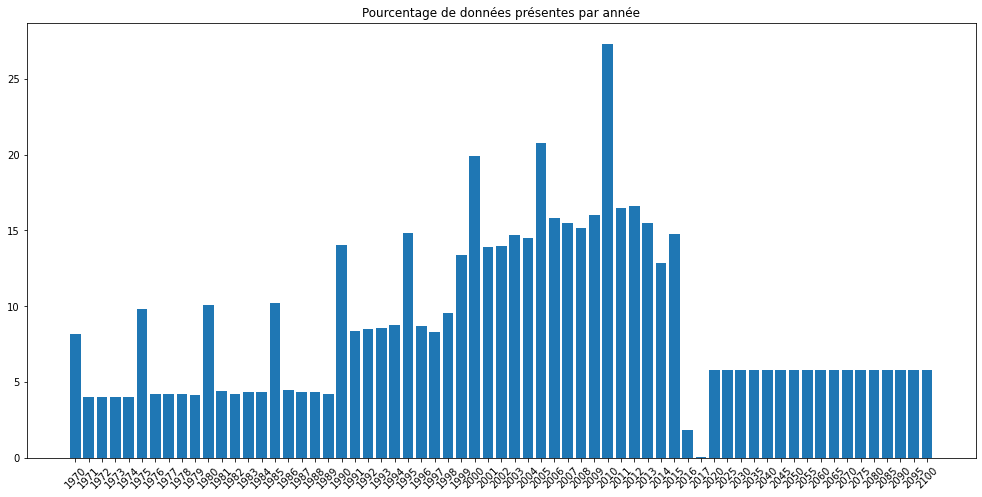

In [50]:
# Création d'un graphique qui va afficher le nombre de données par années
plt.figure(figsize=(17,8))
plt.bar(df_données.index,df_données['Pourcentage'])
plt.xticks(rotation = 45, ha='center')
plt.title('Pourcentage de données présentes par année')
plt.show()

On remarque un pic du nombre de données tous les 5 ans entre 1970 et 2010.

* Ce fichier contient des données numériques qui vont me servir par la suite.

## Fichier EdStatsFootNote.csv <a class="anchor" id="section_1_4"></a>

In [51]:
# Ouverture du fichier
note = pd.read_csv('EdStatsFootNote.csv')

In [52]:
# Taille de la dataframe
note.shape

(643638, 5)

Ce fichier contient 5 colonnes et 643638 lignes.

In [53]:
# Affichage de la dataframe
note

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
...,...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN


In [54]:
# Description des colonnes
note.describe(include = 'all')

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [55]:
# Affichage des informations
note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [56]:
note.duplicated().sum()

0

Ce fichier ne comprend pas de doublons ni de valeurs manquantes mis à part la dernière colonne qui est vide.  
* La colonne CountryCode donne le code du pays
* La colonne SeriesCode donne le code de l'indicateur
* La colonne Year correspond à l'année
* La colonne DESCRIPTION correspond à la source de l'indicateur

In [57]:
# Création d'une boucle qui va afficher des informations sur chaque colonne
for col in note:
    print("___",col,note[col].nunique(),"éléments","___") 
    print(col,note[col].unique()) 
    print("_ _ _ _ _ _ _ _ _ _ _")   

___ CountryCode 239 éléments ___
CountryCode ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARB' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI'
 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'EAP' 'EAS' 'ECA'
 'ECS' 'ECU' 'EGY' 'EMU' 'ERI' 'ESP' 'EST' 'ETH' 'EUU' 'FIN' 'FJI' 'FRA'
 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC'
 'GRD' 'GTM' 'GUM' 'GUY' 'HIC' 'HKG' 'HND' 'HPC' 'HRV' 'HTI' 'HUN' 'IDN'
 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ'
 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAC' 'LAO' 'LBN' 'LBR' 'LBY'
 'LCA' 'LCN' 'LDC' 'LIC' 'LIE' 'LKA' 'LMC' 'LMY' 'LSO' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEA' 'MEX' 'MHL' 'MIC' 'MKD' 'MLI'
 'MLT' 'MMR' 'MNA' 'MNE' 'MNG' 'MNP' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAC'
 'NAM'

Il y a un doublon pour l'année 2012 car elle n'est pas écrite de la même manière : "YR2012" et "yr2012"

In [58]:
# Je renomme ma colonne yr2012 
note['Year'] = note['Year'].replace('yr2012','YR2012')

In [59]:
# Je calcule le nombre de code indicateur présent pour chaque pays par année.
note_year = note.groupby(['Year','CountryCode'])['SeriesCode'].count().reset_index();
note_year.sort_values('SeriesCode', ascending = False)

,Year,CountryCode,SeriesCode
8099,YR2004,TTO,489
8237,YR2005,LBN,421
8004,YR2004,LBN,420
7538,YR2002,LBN,414
7771,YR2003,LBN,402
...,...,...,...
10566,YR2015,MCO,1
10559,YR2015,LMY,1
10554,YR2015,LCN,1
10553,YR2015,LCA,1


In [60]:
# Calcul du nombre de code pays
note.CountryCode.nunique()

239

In [61]:
# Je calcule le nombre de pays en fonction de l'année et du code de l'indicateur
note_group = note.groupby(['Year','SeriesCode'])["CountryCode"].count().reset_index();
note_group.sort_values('CountryCode', ascending=False)

,Year,SeriesCode,CountryCode
6924,YR1996,SH.DYN.MORT,210
5043,YR1990,SH.DYN.MORT,210
6208,YR1994,SH.DYN.MORT,210
5894,YR1993,SH.DYN.MORT,210
22904,YR2016,SH.DYN.MORT,210
...,...,...,...
19419,YR2011,UIS.GER.1t6.F,1
19420,YR2011,UIS.GER.1t6.GPI,1
19421,YR2011,UIS.GER.1t6.M,1
7481,YR1997,UIS.GER.1T6.GPI,1


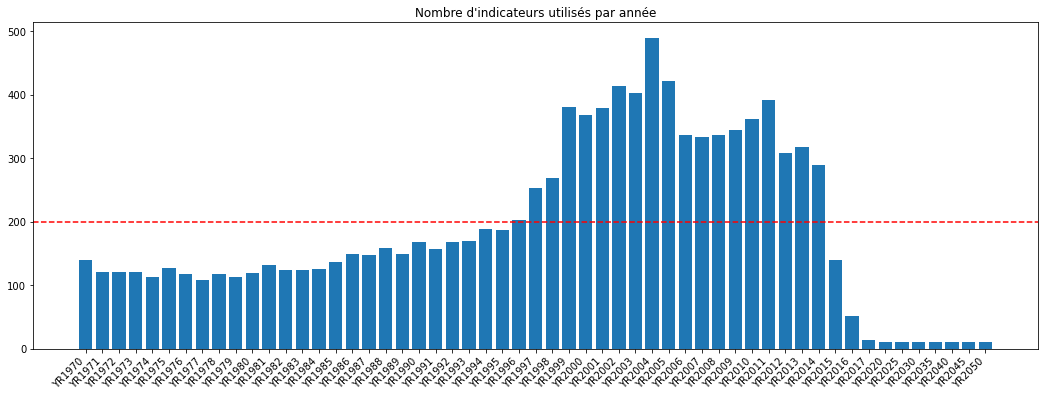

In [62]:
# Je crée un grapqhique pour afficher le nombre d'indicateurs utilisés par année
plt.figure(figsize=(18,6))
plt.bar(note_year.Year,note_year.SeriesCode)
plt.xticks(rotation = 45, ha='right')
plt.title("Nombre d'indicateurs utilisés par année")
plt.axhline(200,color='red',linestyle='--')
plt.show()

La plage comprise entre l'année 1997 à 2014 et celle qui comprend le plus d'indicateurs utilisés.

In [63]:
# Affichage du nombre de description présentes dans le dataframe
note.DESCRIPTION.nunique()

9102

In [64]:
# Je vais regarder comment sont répartis les descriptions
description_note = note.groupby(['DESCRIPTION'])['CountryCode'].nunique().reset_index();
description_note = description_note.sort_values(by='CountryCode', ascending=False)

In [65]:
description_note.head(11)

,DESCRIPTION,CountryCode
1276,UNESCO Institute for Statistics (UIS) estimate,232
83,Country Data,232
119,Estimated,222
90,Country estimation.,217
1272,UIS Estimation,209
17,5-year average value between 0s and 5s,209
1275,UIS estimation.,190
84,Country data,168
89,Country estimation,155
1274,UIS estimation,127


C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


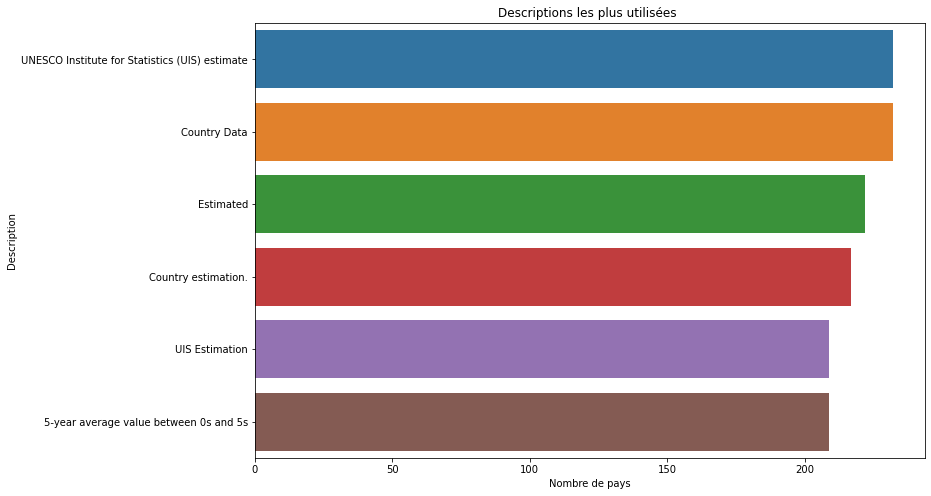

In [66]:
# Création d'un graphique qui affiche les descriptions les plus utilisées.
description_note_top = description_note.loc[description_note['CountryCode']>=209,]
plt.figure(figsize=(12,8))
sns.barplot(description_note_top['CountryCode'],description_note_top.DESCRIPTION)
plt.xlabel('Nombre de pays')
plt.ylabel('Description')
plt.title('Descriptions les plus utilisées ' )
plt.show()

In [67]:
# Je vais regarder comment sont répartis les indicateurs
indicateur_note = note.groupby('SeriesCode')['CountryCode'].nunique().reset_index();
indicateur_note = indicateur_note.sort_values(by='CountryCode', ascending=False)

In [68]:
indicateur_note.head(15)

,SeriesCode,CountryCode
515,SE.PRM.ENRL,231
544,SE.PRM.TCHR,230
567,SE.SEC.ENRL.GC.FE.ZS,230
516,SE.PRM.ENRL.FE,230
518,SE.PRM.ENRL.TC.ZS,229
564,SE.SEC.ENRL.FE.ZS,229
561,SE.SEC.ENRL,229
517,SE.PRM.ENRL.FE.ZS,229
569,SE.SEC.ENRL.TC.ZS,228
546,SE.PRM.TCHR.FE.ZS,228


C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


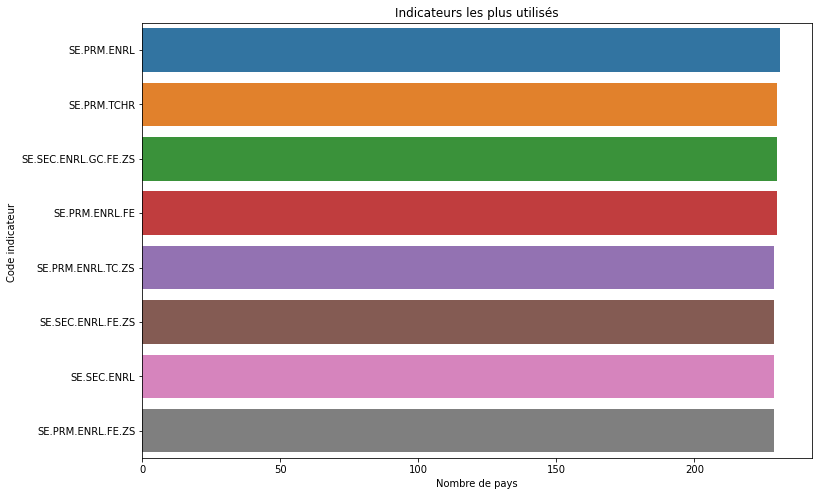

In [69]:
# Création d'un graphique pour afficher les indicateurs les plus utilisés.
indicateur_note_top = indicateur_note.loc[indicateur_note['CountryCode']>228,]
plt.figure(figsize=(12,8))
sns.barplot(indicateur_note_top.CountryCode,indicateur_note_top.SeriesCode, orient = 'h')
plt.xlabel('Nombre de pays')
plt.ylabel('Code indicateur ')
plt.title('Indicateurs les plus utilisés')
plt.show()

L'indicateur le plus utilisé est :

* SE.PRM.ENRR : Taux de scolarisation, primaire (% brut)


In [70]:
# Création d'une df pour afficher le nombre de valeurs manquantes par colonne
note_val = { 'Nombre valeurs manquantes': note.isnull().sum(), 'Pourcentage' :(note.isnull().sum())/643638*100 }
df_note_manquantes = pd.DataFrame(data=note_val)

In [71]:
df_note_manquantes

,Nombre valeurs manquantes,Pourcentage
CountryCode,0,0.0
SeriesCode,0,0.0
Year,0,0.0
DESCRIPTION,0,0.0
Unnamed: 4,643638,100.0


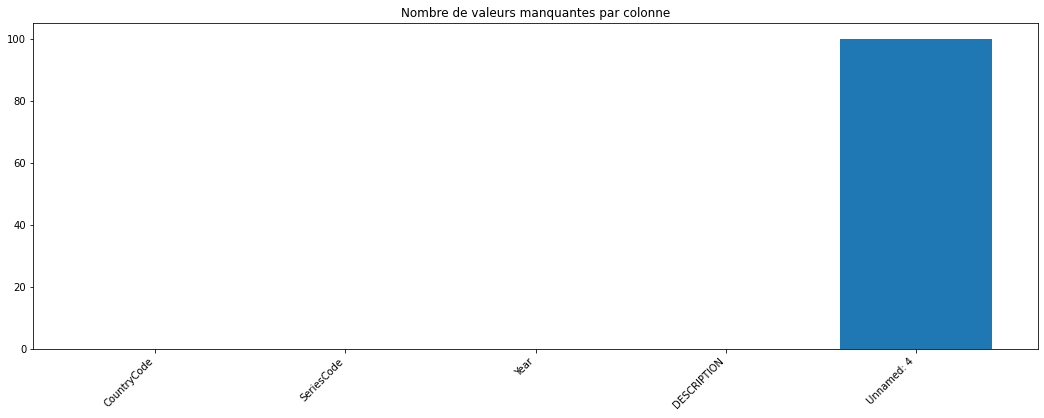

In [72]:
# Création d'un graphique pour afficher les nombre de valeurs manquantes par colonne
plt.figure(figsize=(18,6))
plt.bar(df_note_manquantes.index,df_note_manquantes['Pourcentage'])
plt.xticks(rotation = 45, ha='right')
plt.title('Nombre de valeurs manquantes par colonne')
plt.show()

* Mis à part la colonne **'Unnamed : 4'**, ce fichier ne contient pas de valeurs manquantes.

## Fichier EdStatsSeries.csv <a class="anchor" id="section_1_5"></a>

In [73]:
# Ouverture du fichier
series = pd.read_csv('EdStatsSeries.csv')

In [74]:
# Taille de la dataframe
series.shape

(3665, 21)

Ce fichier contient 21 colonnes et 3665 lignes.

In [75]:
# Affichage de la dataframe
series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Affichage des informations de la dataframe
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

* Ce fichier contient principalement des explications sur les indicateurs et **peu de données chiffrées**.

In [77]:
# Affichage du nombre de doublon.
series.duplicated().sum()

0

In [78]:
# J'affiche le nombre de valeurs uniques par colonne
for col in series:
    print("___",col,series[col].nunique(),"éléments","___") 
    print(col,series[col].unique()) 
    print("_ _ _ _ _ _ _ _ _ _ _ _")   

___ Series Code 3665 éléments ___
Series Code ['BAR.NOED.1519.FE.ZS' 'BAR.NOED.1519.ZS' 'BAR.NOED.15UP.FE.ZS' ...
 'UIS.XUNIT.USCONST.56.FSGOV' 'XGDP.23.FSGOV.FDINSTADM.FFD'
 'XGDP.56.FSGOV.FDINSTADM.FFD']
_ _ _ _ _ _ _ _ _ _ _ _
___ Topic 37 éléments ___
Topic ['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Student Assessment (SABER)' 'Teachers (SABER)'
 'Tertiary Education (SABER)' 'Workforc

In [79]:
# Création d'un df pour calculer le nombre de valeurs manquantes par colonne
series_val = { 'Nombre valeurs manquantes': series.isnull().sum(), 'Pourcentage' :(series.isnull().sum())/3665*100 }
df_series_manquantes = pd.DataFrame(data=series_val)

In [80]:
# Je tri mes données en fonction de ma colonne pourcentage
df_series_manquantes = df_series_manquantes.sort_values('Pourcentage')

In [81]:
df_series_manquantes

,Nombre valeurs manquantes,Pourcentage
Series Code,0,0.000000
Topic,0,0.000000
Indicator Name,0,0.000000
Long definition,0,0.000000
Source,0,0.000000
Short definition,1509,41.173261
Other notes,3113,84.938608
Base Period,3351,91.432469
Related source links,3450,94.133697
Periodicity,3566,97.298772


Text(76, 2, '75%')

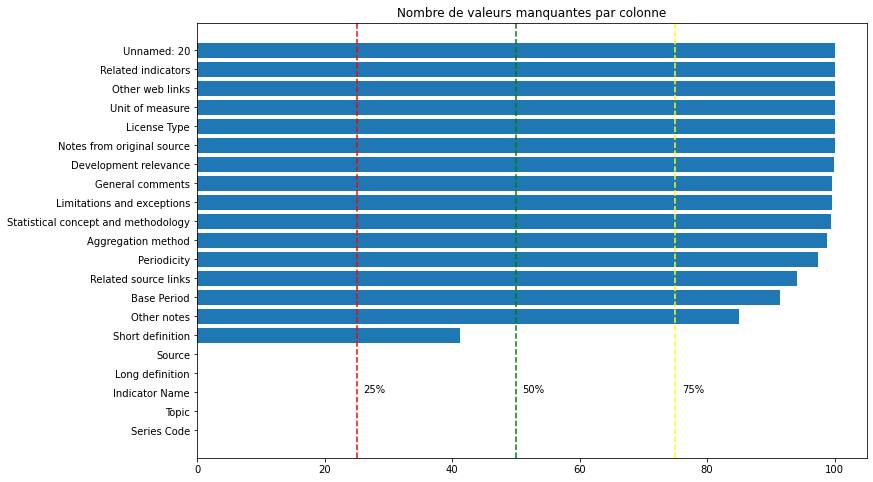

In [82]:
# Création d'un graphique 
plt.figure( figsize=(12,8))
plt.barh(df_series_manquantes.index,df_series_manquantes.Pourcentage)
# Ajout d'un repère 
plt.axvline(25,color='red',linestyle='--')
plt.text(26,2,'25%')
# Ajout d'un repère 
plt.axvline(50,color='green',linestyle='--')
plt.text(51,2,'50%')
# Ajout d'un repère 
plt.axvline(75,color='yellow',linestyle='--')
plt.title('Nombre de valeurs manquantes par colonne')
plt.text(76,2,'75%')

* 14 colonnes contiennent plus de 80% de données manquantes.

* Chaque indicateur est rattaché à un thème de la colonne **'Topic'**

In [83]:
# Je vais regarder comment sont répartis les indicateurs en fonction des thèmes
series_topic = series.groupby('Topic')['Series Code'].count().reset_index();
series_topic = series_topic.sort_values(by='Series Code', ascending=False)

In [84]:
series_topic

,Topic,Series Code
19,Learning Outcomes,1046
0,Attainment,733
9,Education Equality,426
28,Secondary,256
24,Primary,248
21,Population,213
34,Tertiary,158
32,Teachers,137
12,Expenditures,93
11,Engaging the Private Sector (SABER),51


C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


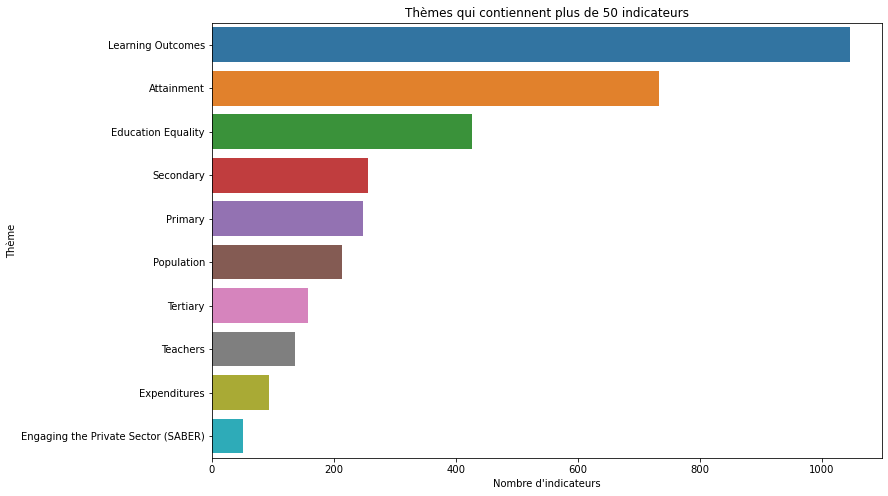

In [85]:
# Création d'un graphique qui affiche les thèmes les plus utilisés
topic_top = series_topic.loc[series_topic['Series Code']>50,]
plt.figure(figsize=(12,8))
sns.barplot(topic_top['Series Code'],topic_top.Topic, orient = 'h')
plt.xlabel('Nombre d\'indicateurs')
plt.ylabel('Thème')
plt.title('Thèmes qui contiennent plus de 50 indicateurs')
plt.show()

Les thèmes les plus présents dans ce fichier sont : 
* Learning Outcomes : Niveau d'apprentissage des élèves en lecture, en mathématiques et en sciences.
* Attainment : Niveau d'instruction
* Education Equality : équité dans l'éducation
* Secondary	: Taux brut de scolarisation en secondaire
* Primary: Taux brut de scolarisation en primaire
* Population: Calcul de la population	
* Tertiary: Taux brut de scolarisation en enseignement supérieur
* Teachers: Enseignants
* Expenditures: Dépenses 
* Engaging the Private Sector (SABER): Secteur privé

In [86]:
# Je vais regarder comment sont répartis les descriptions
description_series = series.groupby(['Source'])['Topic'].count().reset_index();
description_series = description_series.sort_values(by='Topic', ascending=False)

In [87]:
description_series.head(11)

,Source,Topic
22,UNESCO Institute for Statistics,1269
4,Early Grade Reading Assessment (EGRA): https:/...,403
18,Robert J. Barro and Jong-Wha Lee: http://www.b...,360
25,Wittgenstein Centre for Demography and Global ...,308
20,Systems Approach for Better Education Results ...,215
17,Programme d'Analyse des Systèmes Educatifs de ...,140
1,Demographic and Health Surveys (DHS),130
12,Latin American Laboratory for Assessment of th...,127
23,UNESCO Institute for Statistics (Derived),102
7,International Association for the Evaluation o...,100


C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


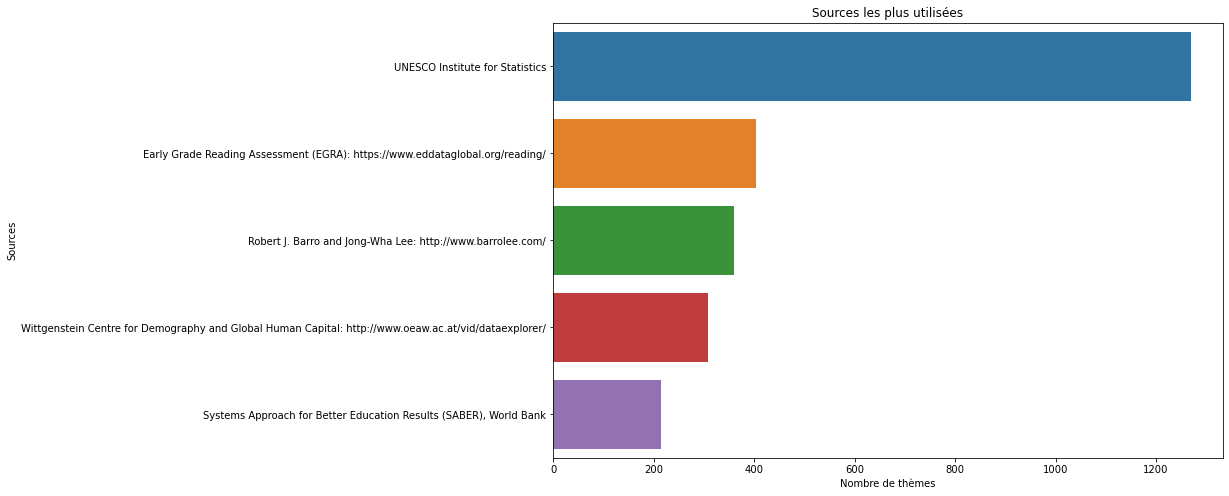

In [88]:
# Création d'un graphique pour représenter les sources les plus utilisées par thème dans le df
description_series_top = description_series.loc[description_series['Topic']>200,]
plt.figure(figsize=(12,8))
sns.barplot(description_series_top['Topic'],description_series_top.Source)
plt.xlabel('Nombre de thèmes')
plt.ylabel('Sources')
plt.title('Sources les plus utilisées' )
plt.show()

* Ce fichier contient des **informations sur la liste des indicateurs** présent sur le site de la banque mondiale.  
* Cette liste va me permettre de sélectionner ceux qui me serviront par la suite.

# Conclusion de l'analyse exploratoire de mes 5 fichiers <a class="anchor" id="chapter2"></a>

* Le fichier Country contient des données descriptives pour chaque pays (Nom, code pays,region, niveau de revenu).
* Le fichier Country_series comprend la liste des indicateurs par pays et la source d'information.
* Le fichier Data contient les données numériques des indicateurs par pays entre 1970 jusqu'à 2050 (prévisions).
* Le fichier Note contient la liste des indicateurs et l'année à laquelle ils ont été publiés.
* Le fichier Series contient la liste des indicateurs regroupés par thème et leur définition.


Les fichiers Country et Data vont me permettre de regrouper les données numériques par pays.  
Les fichiers Data, Note et Series vont me permettre d'affiner mes recherches pour trouver les indicateurs les plus pertinents pour ma recherche.

# Selection des indicateurs <a class="anchor" id="chapter3"></a>

**Rappel :**  
Academy est une start-up qui propose des contenus de **formation en ligne** pour un **public de niveau lycée et université**.  

**Choix des indicateurs:**  

* **Revenu** : pays ayant des niveaux de revenus moyen à haut.
* **Public visé** : élèves du niveau secondaire et niveau supérieur.
* **Démographie** : Nombre d'habitants par pays    
* **Stabilité** : pays politiquement stable.
* **Accès à Internet** : pays pourvu d'un réseau internet stable et accessible. 

## Indicateur revenu <a class="anchor" id="section_3_1"></a>

Un indicateur est déjà présent dans le fichier Country et correspond à la colonne 'Income Group'. Je vais également en sélectionner un deuxième qui me permettra de voir son évolution par année.

In [89]:
# Affichage de la dataframe
pays

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [90]:
# Affichage des termes présents dans la colonne Income group
pays['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

Cette colonne contient des valeurs manquantes qui seront remplacées par la suite.

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays par niveau de revenus')

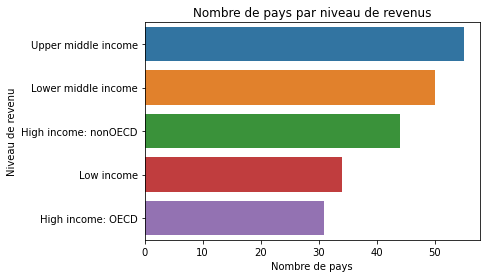

In [91]:
# Création d'un graphique qui regroupe les pays par niveau de revenu
groupe_revenu=pays.groupby('Income Group')[['Country Code']].count().reset_index().sort_values(by='Country Code', ascending=False)
sns.barplot(groupe_revenu['Country Code'].sort_values(), groupe_revenu['Income Group'])
plt.xlabel('Nombre de pays')
plt.ylabel('Niveau de revenu')
plt.title('Nombre de pays par niveau de revenus')

J'ai fait une recherche sur le site de la banque mondiale afin de trouver l'indicateur de revenu qui me servira par la suite:
* **NY.GNP.PCAP.PP.CD** : RNB par habitant, PPA (dollars internationaux courants)

In [92]:
# Je recherche le code dans ma dataframe series
series.loc[series['Series Code']=='NY.GNP.PCAP.PP.CD',:]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1669,NY.GNP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",NaN,GNI per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Indicateur Public visé

In [93]:
# Je filtre mon fichier series pour rechercher les indicateurs qui correspondent aux élèves en secondaire et supérieur
liste_topic = ['Secondary', 'Tertiary']
series_filtre = series.loc[series['Topic'].isin(liste_topic),:]

In [94]:
series_filtre

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2218,SE.ENR.PRSC.FM.ZS,Secondary,"Gross enrolment ratio, primary and secondary, ...",NaN,Ratio of female gross enrolment ratio for prim...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2219,SE.ENR.SECO.FM.ZS,Secondary,"Gross enrolment ratio, secondary, gender parit...",NaN,Ratio of female gross enrolment ratio for seco...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2220,SE.ENR.TERT.FM.ZS,Tertiary,"Gross enrolment ratio, tertiary, gender parity...",NaN,Ratio of female gross enrolment ratio for tert...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2284,SE.SCH.LIFE,Tertiary,"School life expectancy, primary to tertiary, b...",NaN,Number of years a person of school entrance ag...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2285,SE.SCH.LIFE.FE,Tertiary,"School life expectancy, primary to tertiary, f...",NaN,Number of years a person of school entrance ag...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,UIS.thDur.4.A.GPV,Tertiary,Theoretical duration of post-secondary non-ter...,NaN,Number of grades (years) in post-secondary edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3553,UIS.TranRA.23.GPV.GPI,Secondary,Effective transition rate from primary to lowe...,NaN,The ratio of the female transition rate to the...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3578,UIS.UAPP.23,Secondary,Under-age enrolment ratio in secondary educati...,NaN,Percentage of the secondary school age populat...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3579,UIS.UAPP.23.F,Secondary,Under-age enrolment ratio in secondary educati...,NaN,Percentage of the female secondary school age ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Je compte le nombre d'indicateurs disponibles pour chaque thème
series_filtre.groupby('Topic')['Series Code'].count()

Topic
Secondary    256
Tertiary     158
Name: Series Code, dtype: int64

## Indicateur pour les études secondaires <a class="anchor" id="section_3_2"></a>

In [96]:
# Je filtre ma dataframe afin d'afficher que les codes qui correspondent aux études secondaires.
secondary = series.loc[series['Topic']=='Secondary'][['Series Code', 'Topic', 'Indicator Name', 'Long definition']];
secondary.sort_values('Series Code')

,Series Code,Topic,Indicator Name,Long definition
2218,SE.ENR.PRSC.FM.ZS,Secondary,"Gross enrolment ratio, primary and secondary, ...",Ratio of female gross enrolment ratio for prim...
2219,SE.ENR.SECO.FM.ZS,Secondary,"Gross enrolment ratio, secondary, gender parit...",Ratio of female gross enrolment ratio for seco...
2287,SE.SEC.AGES,Secondary,Official entrance age to lower secondary educa...,Age at which students would enter lower second...
2288,SE.SEC.CMPT.LO.FE.ZS,Secondary,"Lower secondary completion rate, female (%)",Total number of new female entrants in the las...
2289,SE.SEC.CMPT.LO.MA.ZS,Secondary,"Lower secondary completion rate, male (%)",Total number of new male entrants in the last ...
...,...,...,...,...
3553,UIS.TranRA.23.GPV.GPI,Secondary,Effective transition rate from primary to lowe...,The ratio of the female transition rate to the...
3578,UIS.UAPP.23,Secondary,Under-age enrolment ratio in secondary educati...,Percentage of the secondary school age populat...
3579,UIS.UAPP.23.F,Secondary,Under-age enrolment ratio in secondary educati...,Percentage of the female secondary school age ...
3580,UIS.UAPP.23.M,Secondary,Under-age enrolment ratio in secondary educati...,Percentage of the male secondary school age po...


In [97]:
# Affichage du nom des indicateurs
secondary['Indicator Name'].unique()

array(['Gross enrolment ratio, primary and secondary, gender parity index (GPI)',
       'Gross enrolment ratio, secondary, gender parity index (GPI)',
       'Official entrance age to lower secondary education (years)',
       'Lower secondary completion rate, female (%)',
       'Lower secondary completion rate, male (%)',
       'Lower secondary completion rate, both sexes (%)',
       'Theoretical duration of secondary education (years)',
       'Theoretical duration of lower secondary education (years)',
       'Theoretical duration of upper secondary education (years)',
       'Enrolment in secondary education, both sexes (number)',
       'Enrolment in secondary education, female (number)',
       'Percentage of female students in secondary education enrolled in vocational programmes, female (%)',
       'Percentage of students in secondary education who are female (%)',
       'Enrolment in secondary general, both sexes (number)',
       'Enrolment in secondary general, female 

In [98]:
# Je filtre à nouveau mes résultats afin d'obtenir un indicateur qui comprend les deux sexes.
secondary_filter = secondary.loc[secondary['Indicator Name'].str.contains('both sexes')]

In [99]:
secondary_filter['Indicator Name'].unique()

array(['Lower secondary completion rate, both sexes (%)',
       'Enrolment in secondary education, both sexes (number)',
       'Enrolment in secondary general, both sexes (number)',
       'Enrolment in secondary vocational, both sexes (number)',
       'Percentage of students in secondary education enrolled in vocational programmes, both sexes (%)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Gross enrolment ratio, lower secondary, both sexes (%)',
       'Gross enrolment ratio, upper secondary, both sexes (%)',
       'Net enrolment rate, secondary, both sexes (%)',
       'Effective transition rate from primary to lower secondary general education, both sexes (%)',
       'Gross intake ratio to Grade 1 of lower secondary general education, both sexes (%)',
       'Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)',
       'Drop-out rate from Grade 2 of lower secondary general education, both sexes (%)',
       'Drop-out rate fro

In [100]:
secondary_filter['Series Code'].unique()

array(['SE.SEC.CMPT.LO.ZS', 'SE.SEC.ENRL', 'SE.SEC.ENRL.GC',
       'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.UP', 'SE.SEC.NENR',
       'SE.SEC.PROG.ZS', 'UIS.AIR.2.GPV', 'UIS.DR.2.GPV.G1.T',
       'UIS.DR.2.GPV.G2.T', 'UIS.DR.2.GPV.G3.T', 'UIS.DR.2.GPV.G4.T',
       'UIS.DR.2.GPV.G5.T', 'UIS.DR.2.GPV.T', 'UIS.E.2', 'UIS.E.2.GPV',
       'UIS.E.2.GPV.G1.T', 'UIS.E.2.GPV.G2.T', 'UIS.E.2.GPV.G3.T',
       'UIS.E.2.GPV.G4.T', 'UIS.E.2.GPV.G5.T', 'UIS.E.2.GPV.G6.T',
       'UIS.E.2.GPV.GUK.T', 'UIS.E.2.PR', 'UIS.E.2.PU', 'UIS.E.2.V',
       'UIS.E.23.PR', 'UIS.E.23.Pu', 'UIS.E.3', 'UIS.E.3.GPV',
       'UIS.E.3.PR', 'UIS.E.3.PU', 'UIS.E.3.V', 'UIS.GER.12',
       'UIS.GER.123', 'UIS.GGR.2', 'UIS.GTVP.2.GPV', 'UIS.GTVP.2.V',
       'UIS.GTVP.23.GPV', 'UIS.GTVP.3.GPV', 'UIS.GTVP.3.V', 'UIS.NER.2',
       'UIS.NER.3', 'UIS.NERA.2', 'UIS.NERA.3', 'UIS.NERT.2',
       'UIS.OFST.2', 'UIS.OFST.3.CP', 'UIS.R.2.GPV', 'UIS.R.2.GPV.G1',
       'UIS.

Les indicateurs sont divisés en 2 groupes :  
* UIS : correspond à 'UNESCO Institute for Statistics'
* SE : Social Education

Après quelques recherches sur le site de la banque mondiale, je décide de conserver l'indicateur **SE.SEC.ENRR** qui correspond au pourcentage brut de scolarisation du niveau secondaire des garçons et filles.

In [101]:
secondary_filter.loc[secondary_filter['Series Code']=='SE.SEC.ENRR',:]

,Series Code,Topic,Indicator Name,Long definition
2307,SE.SEC.ENRR,Secondary,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar..."


## Indicateur pour les études supérieures <a class="anchor" id="section_3_3"></a>

In [102]:
# Je filtre ma dataframe afin d'afficher que les codes qui correspondent aux études supérieures.
tertiary = series.loc[series['Topic']=='Tertiary'][['Series Code', 'Topic', 'Indicator Name', 'Long definition']];
tertiary.sort_values('Series Code')

,Series Code,Topic,Indicator Name,Long definition
2220,SE.ENR.TERT.FM.ZS,Tertiary,"Gross enrolment ratio, tertiary, gender parity...",Ratio of female gross enrolment ratio for tert...
2284,SE.SCH.LIFE,Tertiary,"School life expectancy, primary to tertiary, b...",Number of years a person of school entrance ag...
2285,SE.SCH.LIFE.FE,Tertiary,"School life expectancy, primary to tertiary, f...",Number of years a person of school entrance ag...
2286,SE.SCH.LIFE.MA,Tertiary,"School life expectancy, primary to tertiary, m...",Number of years a person of school entrance ag...
2329,SE.TER.CMPL.FE.ZS,Tertiary,Gross graduation ratio from first degree progr...,Number of female graduates from first degree p...
...,...,...,...,...
3533,UIS.TE_100000.56,Tertiary,"Enrolment in tertiary education per 100,000 in...",Number of students enrolled in tertiary educat...
3534,UIS.TE_100000.56.F,Tertiary,"Enrolment in tertiary education per 100,000 in...",Number of female students enrolled in tertiary...
3535,UIS.TE_100000.56.M,Tertiary,"Enrolment in tertiary education per 100,000 in...",Number of male students enrolled in tertiary e...
3550,UIS.thAge.4.A.GPV,Tertiary,Official entrance age to post-secondary non-te...,Age at which students would enter post-seconda...


In [103]:
# Je filtre à nouveau mes résultats afin d'obtenir un indicateur qui comprend les deux sexes.
tertiary_filter = tertiary.loc[tertiary['Indicator Name'].str.contains('both sexes')]

In [104]:
tertiary_filter = tertiary_filter.loc[tertiary_filter['Series Code'].str.contains('SE.TER.ENRR')]

In [105]:
tertiary_filter

,Series Code,Topic,Indicator Name,Long definition
2335,SE.TER.ENRR,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...


Je décide de garder l'indicateur **SE.TER.ENRR**

# Indicateur Démographie <a class="anchor" id="section_3_4"></a>

Comme vu dans le fichier Country_series, l'indicateur que je recherche est le suivant : **SP.POP.TOTL** car il correspond au total de la population.

In [106]:
demographie = series.loc[series['Series Code']=='SP.POP.TOTL'][['Series Code', 'Topic', 'Indicator Name', 'Long definition']];
demographie

,Series Code,Topic,Indicator Name,Long definition
2590,SP.POP.TOTL,Health: Population: Structure,"Population, total",Total population is based on the de facto defi...


# Indicateur Stabilité politique <a class="anchor" id="section_3_5"></a>

Après avoir effectué des recherches sur le site de la banque mondiale, j'ai trouvé la référence de l'indicateur : **PV.EST** qui correspond à la stabilité politique et absence de violence/terrorisme : estimation

https://databank.worldbank.org/metadataglossary/1181/series/PV.EST

In [107]:
stabilite = series.loc[series['Series Code']=='PV.EST'][['Series Code', 'Topic', 'Indicator Name', 'Long definition']];

In [108]:
stabilite

,Series Code,Topic,Indicator Name,Long definition


Ce code n'apparaît pas dans mon fichier. Je vais télécharger les données sur le site afin de compléter mon jeu de données.

In [109]:
#J'importe mes données sur la stabilité politique
stabilite = pd.read_csv('stabilite.csv',na_values='..')

In [110]:
stabilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    216 non-null    object 
 1   Series Code    214 non-null    object 
 2   Country Name   214 non-null    object 
 3   Country Code   214 non-null    object 
 4   1996 [YR1996]  189 non-null    float64
 5   1998 [YR1998]  189 non-null    float64
 6   2000 [YR2000]  190 non-null    float64
 7   2002 [YR2002]  190 non-null    float64
 8   2003 [YR2003]  200 non-null    float64
 9   2004 [YR2004]  207 non-null    float64
 10  2005 [YR2005]  207 non-null    float64
 11  2006 [YR2006]  208 non-null    float64
 12  2007 [YR2007]  208 non-null    float64
 13  2008 [YR2008]  209 non-null    float64
 14  2009 [YR2009]  212 non-null    float64
 15  2010 [YR2010]  212 non-null    float64
 16  2011 [YR2011]  212 non-null    float64
 17  2012 [YR2012]  212 non-null    float64
 18  2013 [YR20

In [111]:
stabilite

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Political Stability and Absence of Violence/Te...,PV.EST,Afghanistan,AFG,-2.414042,-2.422996,-2.440187,-2.035389,-2.197809,-2.296179,...,-2.502060,-2.418561,-2.519349,-2.411068,-2.571222,-2.671054,-2.801084,-2.763864,-2.655531,-2.729808
1,Political Stability and Absence of Violence/Te...,PV.EST,Albania,ALB,-0.333811,-0.542706,-0.537979,-0.294578,-0.308824,-0.428378,...,-0.282379,-0.143632,0.091930,0.485986,0.346129,0.344645,0.378475,0.370516,0.111169,0.083936
2,Political Stability and Absence of Violence/Te...,PV.EST,Algeria,DZA,-1.780031,-1.875876,-1.432010,-1.633234,-1.753627,-1.359521,...,-1.360561,-1.325043,-1.202371,-1.190535,-1.090160,-1.097526,-0.915799,-0.836120,-1.044343,-0.860165
3,Political Stability and Absence of Violence/Te...,PV.EST,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,0.737629,...,0.933990,0.952991,0.928986,1.080683,1.181357,1.193236,1.218863,1.216776,1.172189,1.169803
4,Political Stability and Absence of Violence/Te...,PV.EST,Andorra,AND,1.170157,1.183645,1.167002,1.282039,1.464986,1.401487,...,1.302488,1.290351,1.283926,1.286593,1.391288,1.413419,1.421869,1.417627,1.602202,1.618512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Data from database: Worldwide Governance Indic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
stabilite.tail(10)

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
209,Political Stability and Absence of Violence/Te...,PV.EST,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,0.840119,...,0.860623,0.679576,0.846709,1.164255,1.249272,0.999670,1.001911,0.976172,1.065074,1.014357
210,Political Stability and Absence of Violence/Te...,PV.EST,West Bank and Gaza,PSE,-1.539813,-1.537647,-1.549876,-1.653650,-1.299623,-1.132820,...,-1.935620,-1.956032,-1.778823,-1.985011,-2.160502,-1.976399,-1.659977,-1.816336,-1.895290,-2.047813
211,Political Stability and Absence of Violence/Te...,PV.EST,"Yemen, Rep.",YEM,-1.307887,-1.189253,-1.143511,-1.305779,-1.480240,-1.552558,...,-2.426796,-2.430663,-2.374828,-2.665575,-2.680222,-2.794877,-2.942443,-3.005906,-2.770830,-2.671682
212,Political Stability and Absence of Violence/Te...,PV.EST,Zambia,ZMB,-0.159263,0.219534,0.033903,-0.278805,0.217706,0.189577,...,0.509774,0.660963,0.435933,0.156212,0.151695,0.142808,0.146243,0.085604,-0.113847,-0.128189
213,Political Stability and Absence of Violence/Te...,PV.EST,Zimbabwe,ZWE,-0.464483,-0.739625,-1.322906,-1.521978,-1.088343,-1.207500,...,-0.945329,-0.778662,-0.665950,-0.713570,-0.618156,-0.619938,-0.708769,-0.722774,-0.959749,-1.080208
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Data from database: Worldwide Governance Indic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Last Updated: 09/27/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Les lignes 214 à 218 sont vides. Je les retire de ma dataframe.

In [113]:
stabilite.drop(stabilite.tail(5).index, 
        inplace = True) 

In [114]:
stabilite.tail()

,Series Name,Series Code,Country Name,Country Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
209,Political Stability and Absence of Violence/Te...,PV.EST,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,0.840119,...,0.860623,0.679576,0.846709,1.164255,1.249272,0.999670,1.001911,0.976172,1.065074,1.014357
210,Political Stability and Absence of Violence/Te...,PV.EST,West Bank and Gaza,PSE,-1.539813,-1.537647,-1.549876,-1.653650,-1.299623,-1.132820,...,-1.935620,-1.956032,-1.778823,-1.985011,-2.160502,-1.976399,-1.659977,-1.816336,-1.895290,-2.047813
211,Political Stability and Absence of Violence/Te...,PV.EST,"Yemen, Rep.",YEM,-1.307887,-1.189253,-1.143511,-1.305779,-1.480240,-1.552558,...,-2.426796,-2.430663,-2.374828,-2.665575,-2.680222,-2.794877,-2.942443,-3.005906,-2.770830,-2.671682
212,Political Stability and Absence of Violence/Te...,PV.EST,Zambia,ZMB,-0.159263,0.219534,0.033903,-0.278805,0.217706,0.189577,...,0.509774,0.660963,0.435933,0.156212,0.151695,0.142808,0.146243,0.085604,-0.113847,-0.128189
213,Political Stability and Absence of Violence/Te...,PV.EST,Zimbabwe,ZWE,-0.464483,-0.739625,-1.322906,-1.521978,-1.088343,-1.207500,...,-0.945329,-0.778662,-0.665950,-0.713570,-0.618156,-0.619938,-0.708769,-0.722774,-0.959749,-1.080208


In [115]:
stabilite = stabilite.drop(['2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]'], axis=1)

In [116]:
stabilite.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1996 [YR1996]', '1998 [YR1998]', '2000 [YR2000]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]'],
      dtype='object')

In [117]:
# Pour renommer mes colonnes, je crée un dictionnaire.
dico = {'1996 [YR1996]': '1996', '1998 [YR1998]':'1998', '2000 [YR2000]':'2000', '2002 [YR2002]':'2002',
       '2003 [YR2003]':'2003', '2004 [YR2004]':'2004', '2005 [YR2005]':'2005', '2006 [YR2006]':'2006',
       '2007 [YR2007]':'2007', '2008 [YR2008]':'2008', '2009 [YR2009]':'2009', '2010 [YR2010]':'2010',
       '2011 [YR2011]':'2011', '2012 [YR2012]':'2012', '2013 [YR2013]':'2013', '2014 [YR2014]':'2014',
       '2015 [YR2015]':'2015', '2016 [YR2016]':'2016', 'Series Code' : 'Indicator Code','Series Name':'Indicator Name' }
 
# Je renomme mes colonnes
stabilite.rename(columns=dico,
          inplace=True)
 
stabilite

,Indicator Name,Indicator Code,Country Name,Country Code,1996,1998,2000,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Political Stability and Absence of Violence/Te...,PV.EST,Afghanistan,AFG,-2.414042,-2.422996,-2.440187,-2.035389,-2.197809,-2.296179,...,-2.410581,-2.690477,-2.712689,-2.579152,-2.502060,-2.418561,-2.519349,-2.411068,-2.571222,-2.671054
1,Political Stability and Absence of Violence/Te...,PV.EST,Albania,ALB,-0.333811,-0.542706,-0.537979,-0.294578,-0.308824,-0.428378,...,-0.203224,-0.030819,-0.045249,-0.191483,-0.282379,-0.143632,0.091930,0.485986,0.346129,0.344645
2,Political Stability and Absence of Violence/Te...,PV.EST,Algeria,DZA,-1.780031,-1.875876,-1.432010,-1.633234,-1.753627,-1.359521,...,-1.148360,-1.093989,-1.197078,-1.259368,-1.360561,-1.325043,-1.202371,-1.190535,-1.090160,-1.097526
3,Political Stability and Absence of Violence/Te...,PV.EST,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,0.737629,...,0.967951,0.984193,0.945634,0.919147,0.933990,0.952991,0.928986,1.080683,1.181357,1.193236
4,Political Stability and Absence of Violence/Te...,PV.EST,Andorra,AND,1.170157,1.183645,1.167002,1.282039,1.464986,1.401487,...,1.340644,1.337765,1.296418,1.278272,1.302488,1.290351,1.283926,1.286593,1.391288,1.413419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Political Stability and Absence of Violence/Te...,PV.EST,Virgin Islands (U.S.),VIR,NaN,NaN,NaN,NaN,NaN,0.840119,...,0.485581,0.507122,-0.142299,0.339058,0.860623,0.679576,0.846709,1.164255,1.249272,0.999670
210,Political Stability and Absence of Violence/Te...,PV.EST,West Bank and Gaza,PSE,-1.539813,-1.537647,-1.549876,-1.653650,-1.299623,-1.132820,...,-1.981084,-1.998236,-2.043175,-1.973575,-1.935620,-1.956032,-1.778823,-1.985011,-2.160502,-1.976399
211,Political Stability and Absence of Violence/Te...,PV.EST,"Yemen, Rep.",YEM,-1.307887,-1.189253,-1.143511,-1.305779,-1.480240,-1.552558,...,-1.591527,-2.011098,-2.327018,-2.423716,-2.426796,-2.430663,-2.374828,-2.665575,-2.680222,-2.794877
212,Political Stability and Absence of Violence/Te...,PV.EST,Zambia,ZMB,-0.159263,0.219534,0.033903,-0.278805,0.217706,0.189577,...,0.363416,0.469842,0.568318,0.515351,0.509774,0.660963,0.435933,0.156212,0.151695,0.142808


## Indicateur Accès à Internet <a class="anchor" id="section_3_6"></a>

La formation étant dispensée en ligne, il est impératif d'intégrer un indicateur qui permet d'identifier les pays dont la population à accès à Internet.

In [118]:
internet = series.loc[series['Long definition'].str.contains('Internet')][['Series Code', 'Topic', 'Indicator Name', 'Long definition']];
internet

,Series Code,Topic,Indicator Name,Long definition
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...


L'indicateur **IT.NET.USER.P2** nous permet d'évaluer le nombre de personnes ayant utilisés Internet au cours des derniers mois. 



**Le code indicateur "IT.NET.USER.P2" a été remplacé par le code "IT.NET.USER.ZS"**  
Je l'ai téléchargé du site de la banque mondiale.

In [119]:
# Ouverture du fichier
internet = pd.read_csv('internet.csv',na_values='..')

In [120]:
# Affichage de la dataframe
internet

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.26
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.86,41.20,45.0,47.0,49.400000,51.8,54.3,56.90
2,Individuals using the Internet (% of population),IT.NET.USER.ZS,Algeria,DZA,0.491706,0.646114,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.5,38.20
3,Individuals using the Internet (% of population),IT.NET.USER.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Individuals using the Internet (% of population),IT.NET.USER.ZS,Andorra,AND,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.04,78.53,81.0,81.0,82.700000,84.4,86.1,87.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
internet.tail(10)

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
212,Individuals using the Internet (% of population),IT.NET.USER.ZS,Virgin Islands (U.S.),VIR,13.815081,18.375766,27.494432,27.429073,27.377009,27.344320,27.332611,27.339336,27.361777,27.39651,31.22,35.600,40.5479,45.3,50.07000,54.839137
213,Individuals using the Internet (% of population),IT.NET.USER.ZS,West Bank and Gaza,PSE,1.111306,1.836855,3.100092,4.130616,4.400905,16.005000,18.410000,21.176000,24.358000,32.23000,37.40,41.080,43.4000,46.6,53.67000,56.700000
214,Individuals using the Internet (% of population),IT.NET.USER.ZS,"Yemen, Rep.",YEM,0.082500,0.090802,0.518796,0.604734,0.881223,1.048598,1.247824,5.010000,6.890000,9.96000,12.35,14.905,17.4465,20.0,22.55000,24.085409
215,Individuals using the Internet (% of population),IT.NET.USER.ZS,Zambia,ZMB,0.191072,0.233130,0.477751,0.980483,1.100000,1.300000,1.600000,1.900000,2.200000,2.50000,3.00,3.500,4.1000,4.8,6.50000,8.800000
216,Individuals using the Internet (% of population),IT.NET.USER.ZS,Zimbabwe,ZWE,0.401434,0.799846,1.100000,1.800000,2.100000,2.400000,2.400000,3.000000,3.500000,4.00000,6.40,8.400,12.0000,15.5,16.36474,22.742818
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Last Updated: 06/30/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Je supprime les dernières lignes vides.
internet.drop(internet.tail(5).index, inplace = True) 

In [123]:
internet.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [124]:
# Je renomme mes colonnes
internet.rename(columns={'2000 [YR2000]':'2000', '2001 [YR2001]':'2001', '2002 [YR2002]':'2002', '2003 [YR2003]':'2003',
       '2004 [YR2004]':'2004', '2005 [YR2005]':'2005', '2006 [YR2006]':'2006', '2007 [YR2007]':'2007',
       '2008 [YR2008]':'2008', '2009 [YR2009]':'2009', '2010 [YR2010]':'2010', '2011 [YR2011]':'2011',
       '2012 [YR2012]':'2012', '2013 [YR2013]':'2013', '2014 [YR2014]':'2014', '2015 [YR2015]':'2015','Series Code':'Indicator Code','Series Name' : 'Indicator Name'},inplace=True)

In [125]:
internet

,Indicator Name,Indicator Code,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Individuals using the Internet (% of population),IT.NET.USER.ZS,Afghanistan,AFG,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.840000,3.55000,4.00,5.000,5.454545,5.9,7.00000,8.260000
1,Individuals using the Internet (% of population),IT.NET.USER.ZS,Albania,ALB,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.860000,41.20000,45.00,47.000,49.400000,51.8,54.30000,56.900000
2,Individuals using the Internet (% of population),IT.NET.USER.ZS,Algeria,DZA,0.491706,0.646114,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.180000,11.23000,12.50,14.900,18.200000,22.5,29.50000,38.200000
3,Individuals using the Internet (% of population),IT.NET.USER.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Individuals using the Internet (% of population),IT.NET.USER.ZS,Andorra,AND,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.040000,78.53000,81.00,81.000,82.700000,84.4,86.10000,87.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Individuals using the Internet (% of population),IT.NET.USER.ZS,Virgin Islands (U.S.),VIR,13.815081,18.375766,27.494432,27.429073,27.377009,27.344320,27.332611,27.339336,27.361777,27.39651,31.22,35.600,40.547900,45.3,50.07000,54.839137
213,Individuals using the Internet (% of population),IT.NET.USER.ZS,West Bank and Gaza,PSE,1.111306,1.836855,3.100092,4.130616,4.400905,16.005000,18.410000,21.176000,24.358000,32.23000,37.40,41.080,43.400000,46.6,53.67000,56.700000
214,Individuals using the Internet (% of population),IT.NET.USER.ZS,"Yemen, Rep.",YEM,0.082500,0.090802,0.518796,0.604734,0.881223,1.048598,1.247824,5.010000,6.890000,9.96000,12.35,14.905,17.446500,20.0,22.55000,24.085409
215,Individuals using the Internet (% of population),IT.NET.USER.ZS,Zambia,ZMB,0.191072,0.233130,0.477751,0.980483,1.100000,1.300000,1.600000,1.900000,2.200000,2.50000,3.00,3.500,4.100000,4.8,6.50000,8.800000


# Préparation des données sélectionnées <a class="anchor" id="chapter4"></a>

## Sélection des pays <a class="anchor" id="section_4_1"></a>

In [126]:
stabilite['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'French 

In [127]:
# J'affiche le nombre de pays présent dans ma df stabilite
stabilite['Country Name'].nunique()

214

In [128]:
# Je l'enregistre dans une liste
liste_pays = stabilite['Country Name'].unique()

In [129]:
# Jaffiche le nombre de pays présent dans ma df data
data['Country Name'].nunique()

242

In [130]:
# Je sélectionne les pays qui ne sont pas dans ma df stabilite
df_data = data.loc[~data['Country Name'].isin(liste_pays),:]

In [131]:
df_data['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Channel Islands', 'Curacao', 'Faroe Islands', 'French Polynesia',
       'Gibraltar', 'Isle of Man', 'Korea, Dem. People’s Rep.',
       'Macedonia, FYR', 'New Caledonia', 'Northern Ma

Certains pays et îles apparaissent dans la liste. Je refais une nouvelle liste qui comprend ces pays.

In [132]:
liste_pays_up = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jersey, Channel Islands', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Dem. People's Rep.",
       'Korea, Rep.', 'Kosovo', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao SAR, China',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius',
       'Mexico', 'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'Netherlands Antilles',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania',
       'Russian Federation', 'Rwanda', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovak Republic',
       'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
       'South Sudan', 'Spain', 'Sri Lanka', 'St. Kitts and Nevis',
       'St. Lucia', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname',
       'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, China',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.',
       'Zambia', 'Zimbabwe','British Virgin Islands',
       'Channel Islands', 'Curacao', 'Faroe Islands', 'French Polynesia',
       'Gibraltar', 'Isle of Man', 'Korea, Dem. People’s Rep.',
       'Macedonia, FYR', 'New Caledonia', 'Northern Mariana Islands',
       'Sint Maarten (Dutch part)', 'St. Martin (French part)',
       'Swaziland', 'Turks and Caicos Islands']

In [133]:
df_data_up = data.loc[data['Country Name'].isin(liste_pays_up),:]

In [134]:
df_data_up

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df_data_up['Country Name'].nunique()

217

In [136]:
stabilite['Country Name'].nunique()

214

In [137]:
stabilite[~stabilite['Country Name'].isin(df_data_up['Country Name'].unique())]['Country Name'].unique()

array(['Anguilla', 'Cook Islands', 'Eswatini', 'French Guiana',
       'Jersey, Channel Islands', "Korea, Dem. People's Rep.",
       'Martinique', 'Netherlands Antilles', 'Niue', 'North Macedonia',
       'Reunion', 'Taiwan, China'], dtype=object)

Les pays manquants sont principalement **des îles, petits pays et pays instable politiquement.**  
Je décide de ne pas les conserver.

## Sélection des indicateurs <a class="anchor" id="section_4_2"></a>

In [138]:
# Je filtre mon fichier df_data_up pour ne conserver que les indicateurs que j'ai sélectionné.
liste_indicateur = ['SE.SEC.ENRR','SE.TER.ENRR','SP.POP.TOTL', 'IT.NET.USER.P2 ','PV.EST','NY.GNP.PCAP.PP.CD']

In [139]:
df_data_up =df_data_up[df_data_up['Indicator Code'].isin(liste_indicateur)]

In [140]:
df_data_up

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,1.026200e+00,1.080120e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96542,Albania,ALB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4.173928e+06,4.317748e+06,4.469895e+06,4.629402e+06,4.794754e+06,4.964831e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.381360e+00,7.567980e+00,8.159130e+00,8.376400e+00,8.422430e+00,8.684790e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.718440e+00,1.668860e+00,1.673130e+00,1.548440e+00,1.584170e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# J'affiche les informations de ma dataframe
df_data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 92877 to 885798
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    868 non-null    object 
 1   Country Code    868 non-null    object 
 2   Indicator Name  868 non-null    object 
 3   Indicator Code  868 non-null    object 
 4   1970            287 non-null    float64
 5   1971            463 non-null    float64
 6   1972            449 non-null    float64
 7   1973            444 non-null    float64
 8   1974            434 non-null    float64
 9   1975            434 non-null    float64
 10  1976            445 non-null    float64
 11  1977            441 non-null    float64
 12  1978            440 non-null    float64
 13  1979            447 non-null    float64
 14  1980            454 non-null    float64
 15  1981            476 non-null    float64
 16  1982            452 non-null    float64
 17  1983            450 non-null

In [142]:
# J'utilise dropna pour supprimer les colonnes qui ne contiennent que des valeurs manquantes
df_data_up = df_data_up.dropna(axis=1,how='all')

In [143]:
df_data_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 92877 to 885798
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    868 non-null    object 
 1   Country Code    868 non-null    object 
 2   Indicator Name  868 non-null    object 
 3   Indicator Code  868 non-null    object 
 4   1970            287 non-null    float64
 5   1971            463 non-null    float64
 6   1972            449 non-null    float64
 7   1973            444 non-null    float64
 8   1974            434 non-null    float64
 9   1975            434 non-null    float64
 10  1976            445 non-null    float64
 11  1977            441 non-null    float64
 12  1978            440 non-null    float64
 13  1979            447 non-null    float64
 14  1980            454 non-null    float64
 15  1981            476 non-null    float64
 16  1982            452 non-null    float64
 17  1983            450 non-null

## Concaténations et Jointure <a class="anchor" id="section_4_3"></a>

In [144]:
# Je regroupe mes df df_data_up et stabilite 
df_final = pd.concat([df_data_up, stabilite])

In [145]:
df_final

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.210000e+03,1.250000e+03,1.490000e+03,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1.900000e+03
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,1.026200e+00,1.080120e+00,...,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,NaN
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
96542,Albania,ALB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.490000e+03,8.270000e+03,8.680000e+03,9.550000e+03,1.021000e+04,1.045000e+04,1.061000e+04,1.120000e+04,1.134000e+04,1.167000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Virgin Islands (U.S.),VIR,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,4.855805e-01,5.071218e-01,-1.422989e-01,3.390581e-01,8.606231e-01,6.795762e-01,8.467092e-01,1.164255e+00,1.249272e+00,9.996701e-01
210,West Bank and Gaza,PSE,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.981084e+00,-1.998236e+00,-2.043175e+00,-1.973575e+00,-1.935620e+00,-1.956032e+00,-1.778823e+00,-1.985011e+00,-2.160502e+00,-1.976399e+00
211,"Yemen, Rep.",YEM,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.591527e+00,-2.011098e+00,-2.327018e+00,-2.423716e+00,-2.426796e+00,-2.430663e+00,-2.374828e+00,-2.665575e+00,-2.680222e+00,-2.794877e+00
212,Zambia,ZMB,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,3.634163e-01,4.698419e-01,5.683178e-01,5.153514e-01,5.097738e-01,6.609625e-01,4.359333e-01,1.562120e-01,1.516949e-01,1.428080e-01


In [146]:
# Je filtre les pays de la df internet afin de la concaténer par la suite à df_final
internet = internet.loc[internet['Country Name'].isin(liste_pays),:]

In [147]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 216
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  204 non-null    object 
 1   Indicator Code  204 non-null    object 
 2   Country Name    204 non-null    object 
 3   Country Code    204 non-null    object 
 4   2000            191 non-null    float64
 5   2001            194 non-null    float64
 6   2002            196 non-null    float64
 7   2003            191 non-null    float64
 8   2004            194 non-null    float64
 9   2005            195 non-null    float64
 10  2006            194 non-null    float64
 11  2007            199 non-null    float64
 12  2008            197 non-null    float64
 13  2009            196 non-null    float64
 14  2010            195 non-null    float64
 15  2011            198 non-null    float64
 16  2012            196 non-null    float64
 17  2013            197 non-null    flo

In [148]:
df_final = pd.concat([df_final, internet])

In [149]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 92877 to 216
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1286 non-null   object 
 1   Country Code    1286 non-null   object 
 2   Indicator Name  1286 non-null   object 
 3   Indicator Code  1286 non-null   object 
 4   1970            287 non-null    float64
 5   1971            463 non-null    float64
 6   1972            449 non-null    float64
 7   1973            444 non-null    float64
 8   1974            434 non-null    float64
 9   1975            434 non-null    float64
 10  1976            445 non-null    float64
 11  1977            441 non-null    float64
 12  1978            440 non-null    float64
 13  1979            447 non-null    float64
 14  1980            454 non-null    float64
 15  1981            476 non-null    float64
 16  1982            452 non-null    float64
 17  1983            450 non-null  

In [150]:
df_final['Indicator Code'].unique()

array(['NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL',
       'PV.EST', 'IT.NET.USER.ZS'], dtype=object)

In [151]:
df_final

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.210000e+03,1.250000e+03,1.490000e+03,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1900.0
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,1.026200e+00,1.080120e+00,...,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,NaN
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,34656032.0
96542,Albania,ALB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.490000e+03,8.270000e+03,8.680000e+03,9.550000e+03,1.021000e+04,1.045000e+04,1.061000e+04,1.120000e+04,1.134000e+04,11670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.733934e+01,2.736178e+01,2.739651e+01,3.122000e+01,3.560000e+01,4.054790e+01,4.530000e+01,5.007000e+01,5.483914e+01,NaN
213,West Bank and Gaza,PSE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.117600e+01,2.435800e+01,3.223000e+01,3.740000e+01,4.108000e+01,4.340000e+01,4.660000e+01,5.367000e+01,5.670000e+01,NaN
214,"Yemen, Rep.",YEM,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.010000e+00,6.890000e+00,9.960000e+00,1.235000e+01,1.490500e+01,1.744650e+01,2.000000e+01,2.255000e+01,2.408541e+01,NaN
215,Zambia,ZMB,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900000e+00,2.200000e+00,2.500000e+00,3.000000e+00,3.500000e+00,4.100000e+00,4.800000e+00,6.500000e+00,8.800000e+00,NaN


In [152]:
# Je filtre ma df pays avec ma liste de pays présent dans df_final
pays = pays.loc[pays['Short Name'].isin(df_final['Country Name']),:]
pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       197 non-null    object 
 1   Short Name                                         197 non-null    object 
 2   Table Name                                         197 non-null    object 
 3   Long Name                                          197 non-null    object 
 4   2-alpha code                                       194 non-null    object 
 5   Currency Unit                                      196 non-null    object 
 6   Special Notes                                      110 non-null    object 
 7   Region                                             195 non-null    object 
 8   Income Group                                       195 non-null    object 
 9   WB-2 code 

In [153]:
# Je rajoute la colonne 'Income Group' et 'Region' de mon fichier pays
pays = pays[['Country Code','Income Group','Region']]

In [154]:
# Je fais une jointure de mes df en prenant comme clé la colonne Country Code
df_final = pd.merge(df_final,pays, on='Country Code')

In [155]:
df_final

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,Income Group,Region
0,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.490000e+03,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1.900000e+03,Low income,South Asia
1,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,1.097640e+01,1.104103e+01,...,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN,Low income,South Asia
2,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,1.026200e+00,1.080120e+00,...,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,NaN,Low income,South Asia
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,1.232154e+07,1.259029e+07,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,Low income,South Asia
4,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.712689e+00,-2.579152e+00,-2.502060e+00,-2.418561e+00,-2.519349e+00,-2.411068e+00,-2.571222e+00,-2.671054e+00,Low income,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.381360e+00,7.567980e+00,8.159130e+00,8.376400e+00,8.422430e+00,8.684790e+00,...,NaN,NaN,NaN,4.667318e+01,4.757019e+01,NaN,NaN,NaN,Low income,Sub-Saharan Africa
1159,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.718440e+00,1.668860e+00,1.673130e+00,1.548440e+00,1.584170e+00,...,NaN,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00,NaN,Low income,Sub-Saharan Africa
1160,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,5.175618e+06,5.351195e+06,5.535874e+06,5.727044e+06,5.920943e+06,6.115370e+06,...,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07,1.615036e+07,Low income,Sub-Saharan Africa
1161,Zimbabwe,ZWE,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.167150e+00,-1.104014e+00,-9.453285e-01,-7.786620e-01,-6.659498e-01,-7.135702e-01,-6.181563e-01,-6.199379e-01,Low income,Sub-Saharan Africa


In [156]:
# J'organise mes colonnes
df_final = df_final[['Country Name', 'Country Code', 'Income Group', 'Region', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016']]

In [157]:
df_final

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,Low income,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,1.210000e+03,1.250000e+03,1.490000e+03,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1.900000e+03
1,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.331610e+00,9.350290e+00,1.034861e+01,1.083169e+01,...,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,NaN
2,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,7.681700e-01,9.239400e-01,9.524100e-01,1.097450e+00,...,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,NaN
3,Afghanistan,AFG,Low income,South Asia,"Population, total",SP.POP.TOTL,1.112612e+07,1.141782e+07,1.172194e+07,1.202782e+07,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
4,Afghanistan,AFG,Low income,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,...,-2.410581e+00,-2.690477e+00,-2.712689e+00,-2.579152e+00,-2.502060e+00,-2.418561e+00,-2.519349e+00,-2.411068e+00,-2.571222e+00,-2.671054e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,7.381360e+00,7.567980e+00,8.159130e+00,8.376400e+00,...,NaN,NaN,NaN,NaN,NaN,4.667318e+01,4.757019e+01,NaN,NaN,NaN
1159,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,1.718440e+00,1.668860e+00,1.673130e+00,...,NaN,NaN,NaN,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00,NaN
1160,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,5.175618e+06,5.351195e+06,5.535874e+06,5.727044e+06,...,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07,1.615036e+07
1161,Zimbabwe,ZWE,Low income,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,...,-1.108968e+00,-1.213945e+00,-1.167150e+00,-1.104014e+00,-9.453285e-01,-7.786620e-01,-6.659498e-01,-7.135702e-01,-6.181563e-01,-6.199379e-01


# Valeurs manquantes <a class="anchor" id="section_4_4"></a>

In [158]:
# Je crée une df qui calcule le nombre de valeurs manquantes par colonne
val_nan = { 'Nombre valeurs manquantes': df_final.isnull().sum(), 'Pourcentage' :(df_final.isnull().sum())/92960*100 }
df_val_nan = pd.DataFrame(data=val_nan)

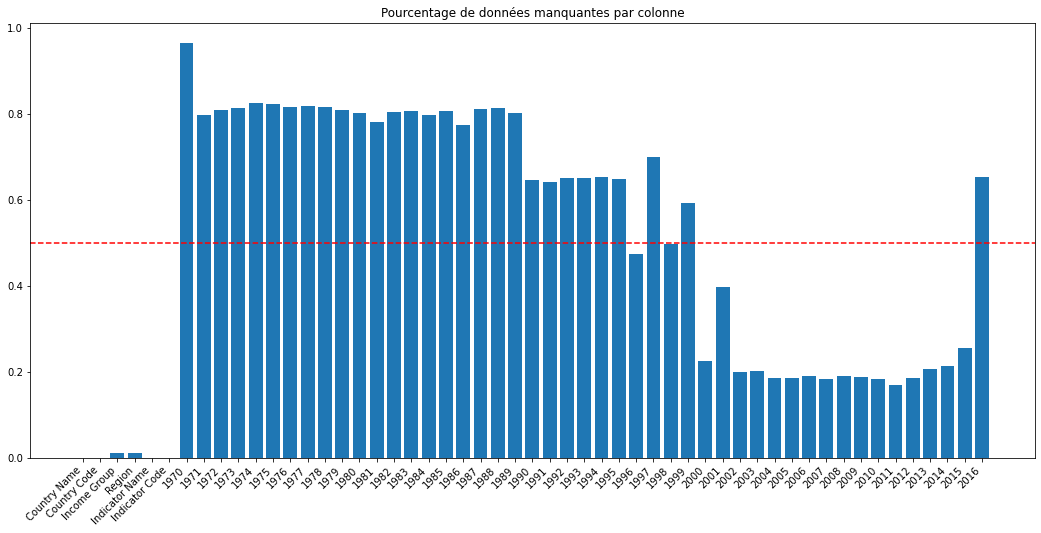

In [159]:
# Je crée un graphique qui affiche le nombre de données manquantes par colonne
plt.figure( figsize=(18,8))
plt.bar(df_val_nan.index,df_val_nan.Pourcentage)
plt.xticks(rotation = 45,ha='right')
plt.title('Pourcentage de données manquantes par colonne')
plt.axhline(0.5,color='red',linestyle='--')
plt.show()

In [160]:
#Les colonnes Income Group et Region contiennent des valeurs manquantes
income_nan = df_final[df_final['Income Group'].isnull()];
income_nan['Country Name'].unique()

array(['Gibraltar', 'Nauru'], dtype=object)

In [161]:
income_nan

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
380,Gibraltar,GIB,NaN,NaN,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,Gibraltar,GIB,NaN,NaN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,Gibraltar,GIB,NaN,NaN,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,Gibraltar,GIB,NaN,NaN,"Population, total",SP.POP.TOTL,28560.0,28869.0,29104.0,29278.0,...,32510.000000,32732.000000,32956.000000,33189.000000,33405.000000,33623.000000,33831.000000,34038.000000,34228.00000,34408.000000
724,Nauru,NRU,NaN,NaN,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,Nauru,NRU,NaN,NaN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,53.535351,62.865952,NaN,NaN,NaN,79.278519,NaN,82.636658,NaN,NaN
726,Nauru,NRU,NaN,NaN,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,Nauru,NRU,NaN,NaN,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,Nauru,NRU,NaN,NaN,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,...,1.084265,1.007470,1.383553,1.453984,1.061804,1.026400,1.054115,0.601334,0.54376,0.579077
729,Nauru,NRU,NaN,NaN,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,NaN


Le site World Bank indique que Gibraltar se trouve dans la region "Europe & Central Asia" et appartient au groupe 'High income: nonOECD' https://data.worldbank.org/country/GI

In [162]:
# Je remplace mes valeurs manquantes
df_final.loc[df_final['Country Name']=='Gibraltar','Income Group']='High income: nonOECD';
df_final.loc[df_final['Country Name']=='Gibraltar','Region']='Europe & Central Asia';
df_final.loc[df_final['Country Name']=='Gibraltar',:]

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
380,Gibraltar,GIB,High income: nonOECD,Europe & Central Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,Gibraltar,GIB,High income: nonOECD,Europe & Central Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,Gibraltar,GIB,High income: nonOECD,Europe & Central Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,Gibraltar,GIB,High income: nonOECD,Europe & Central Asia,"Population, total",SP.POP.TOTL,28560.0,28869.0,29104.0,29278.0,...,32510.0,32732.0,32956.0,33189.0,33405.0,33623.0,33831.0,34038.0,34228.0,34408.0


Le site World Bank indique que Nauru se trouve dans la region "East Asia & Pacific" et appartient au groupe 'High income: nonOECD' https://data.worldbank.org/country/nauru

In [163]:
# Je remplace mes valeurs manquantes
df_final.loc[df_final['Country Name']=='Nauru','Region']='East Asia & Pacific';
df_final.loc[df_final['Country Name']=='Nauru','Income Group']='High income: nonOECD';
df_final.loc[df_final['Country Name']=='Nauru',:]

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
724,Nauru,NRU,High income: nonOECD,East Asia & Pacific,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,Nauru,NRU,High income: nonOECD,East Asia & Pacific,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,53.535351,62.865952,NaN,NaN,NaN,79.278519,NaN,82.636658,NaN,NaN
726,Nauru,NRU,High income: nonOECD,East Asia & Pacific,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,Nauru,NRU,High income: nonOECD,East Asia & Pacific,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,Nauru,NRU,High income: nonOECD,East Asia & Pacific,Political Stability and Absence of Violence/Te...,PV.EST,NaN,NaN,NaN,NaN,...,1.084265,1.007470,1.383553,1.453984,1.061804,1.026400,1.054115,0.601334,0.54376,0.579077
729,Nauru,NRU,High income: nonOECD,East Asia & Pacific,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,NaN


In [164]:
df_final['Indicator Code'].unique()

array(['NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL',
       'PV.EST', 'IT.NET.USER.ZS'], dtype=object)

In [165]:
# Création d'une df par indicateur
secondaire = df_final.loc[df_final['Indicator Code']=='SE.SEC.ENRR',:];
superieur = df_final.loc[df_final['Indicator Code']=='SE.TER.ENRR',:];
population = df_final.loc[df_final['Indicator Code']=='SP.POP.TOTL',:];
stabilite = df_final.loc[df_final['Indicator Code']=='PV.EST',:];
internet = df_final.loc[df_final['Indicator Code']=='IT.NET.USER.ZS',:]
revenu = df_final.loc[df_final['Indicator Code']=='NY.GNP.PCAP.PP.CD',:]

In [166]:
secondaire

,Country Name,Country Code,Income Group,Region,Indicator Name,Indicator Code,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,AFG,Low income,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,8.33161,9.35029,10.34861,10.83169,...,30.083160,40.223381,46.732761,53.246830,54.616180,56.677341,56.688660,55.656158,55.644409,NaN
7,Albania,ALB,Upper middle income,Europe & Central Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,81.280869,83.648918,85.409309,88.411636,90.848351,92.741470,95.831573,96.426086,95.765488,NaN
13,Algeria,DZA,Upper middle income,Middle East & North Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,10.03636,12.07172,13.52412,...,70.281212,76.755852,93.070030,97.171921,99.860191,NaN,NaN,NaN,NaN,NaN
19,American Samoa,ASM,Upper middle income,East Asia & Pacific,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Andorra,AND,High income: nonOECD,Europe & Central Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,15.36829,14.71306,13.81905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,Vanuatu,VUT,Lower middle income,East Asia & Pacific,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,5.77617,6.22298,6.68896,7.15553,...,NaN,NaN,NaN,59.532700,NaN,NaN,NaN,NaN,54.815842,NaN
1140,Vietnam,VNM,Lower middle income,East Asia & Pacific,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1146,West Bank and Gaza,PSE,Lower middle income,Middle East & North Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,...,90.306160,88.774567,87.561462,85.631416,83.870720,83.092033,82.538620,82.240448,82.996231,NaN
1152,Zambia,ZMB,Lower middle income,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,12.94701,13.41331,13.88272,13.52494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
secondaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 1 to 1158
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    197 non-null    object 
 1   Country Code    197 non-null    object 
 2   Income Group    197 non-null    object 
 3   Region          197 non-null    object 
 4   Indicator Name  197 non-null    object 
 5   Indicator Code  197 non-null    object 
 6   1970            40 non-null     float64
 7   1971            125 non-null    float64
 8   1972            122 non-null    float64
 9   1973            117 non-null    float64
 10  1974            111 non-null    float64
 11  1975            109 non-null    float64
 12  1976            118 non-null    float64
 13  1977            114 non-null    float64
 14  1978            115 non-null    float64
 15  1979            115 non-null    float64
 16  1980            122 non-null    float64
 17  1981            125 non-null    fl

In [168]:
# Affichage du nombre de valeurs manquantes 
secondaire_nan = { 'Nombre valeurs manquantes': secondaire.isnull().sum(), 'Pourcentage' :(secondaire.isnull().sum())/197*100 }
df_secondaire_nan = pd.DataFrame(data=secondaire_nan)

In [169]:
df_secondaire_nan

,Nombre valeurs manquantes,Pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Income Group,0,0.000000
Region,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,157,79.695431
1971,72,36.548223
1972,75,38.071066
1973,80,40.609137


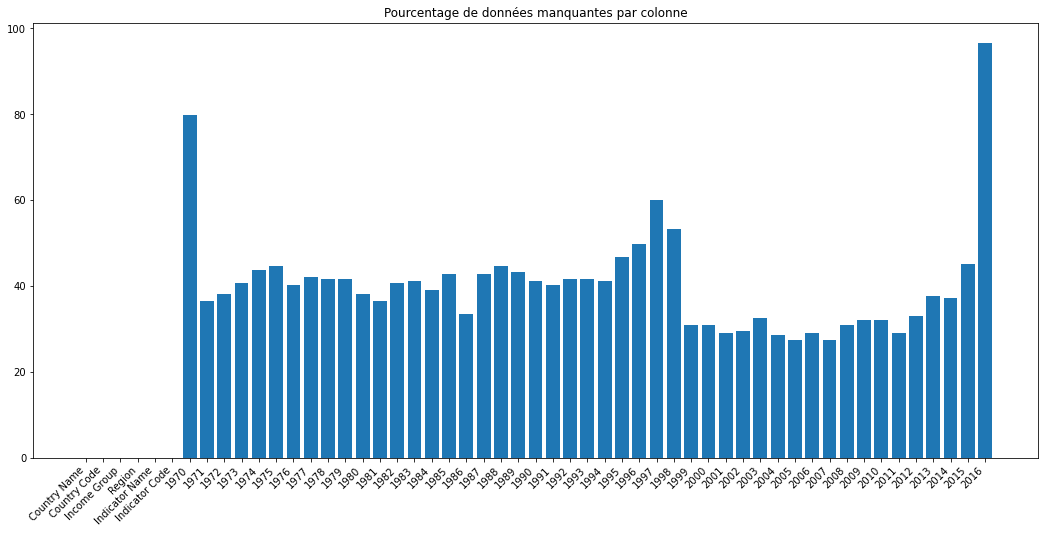

In [170]:
# Création d'un graphique qui affiche le nombre de valeurs manquantes par colonne.
plt.figure( figsize=(18,8))
plt.bar(df_secondaire_nan.index,df_secondaire_nan.Pourcentage)
plt.xticks(rotation = 45,ha='right')
plt.title('Pourcentage de données manquantes par colonne')
plt.show()

In [171]:
superieur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 2 to 1159
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    197 non-null    object 
 1   Country Code    197 non-null    object 
 2   Income Group    197 non-null    object 
 3   Region          197 non-null    object 
 4   Indicator Name  197 non-null    object 
 5   Indicator Code  197 non-null    object 
 6   1970            34 non-null     float64
 7   1971            105 non-null    float64
 8   1972            96 non-null     float64
 9   1973            97 non-null     float64
 10  1974            93 non-null     float64
 11  1975            97 non-null     float64
 12  1976            94 non-null     float64
 13  1977            96 non-null     float64
 14  1978            96 non-null     float64
 15  1979            103 non-null    float64
 16  1980            103 non-null    float64
 17  1981            119 non-null    fl

In [172]:
# Création d'une df pour afficher le nombre de valeurs manquantes
superieur_nan = { 'Nombre valeurs manquantes': superieur.isnull().sum(), 'Pourcentage' :(superieur.isnull().sum())/197*100 }
df_superieur_nan = pd.DataFrame(data=superieur_nan)

In [173]:
df_superieur_nan

,Nombre valeurs manquantes,Pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Income Group,0,0.000000
Region,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,163,82.741117
1971,92,46.700508
1972,101,51.269036
1973,100,50.761421


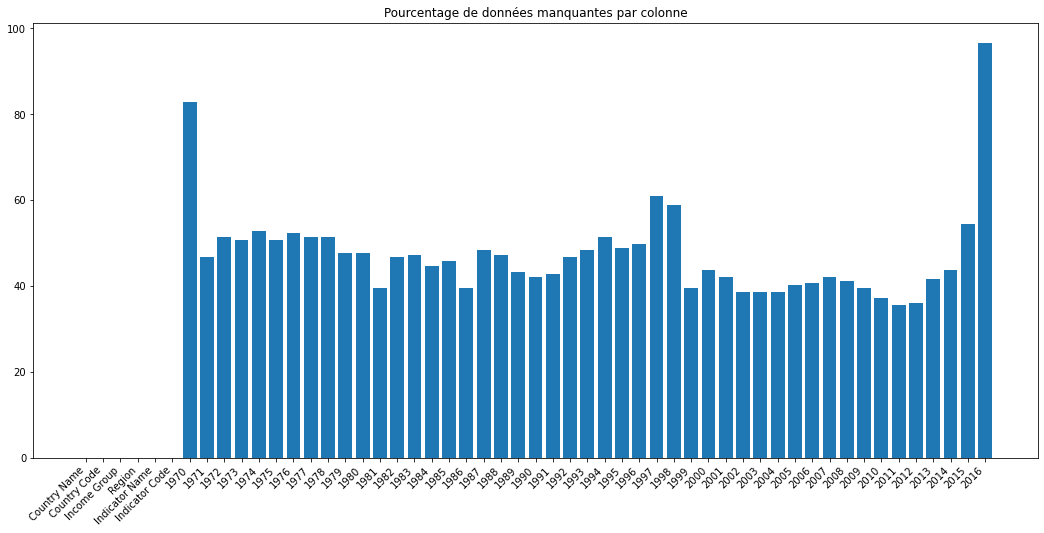

In [174]:
# Création d'un graphique pour afficher le nombre de valeurs manquantes
plt.figure( figsize=(18,8))
plt.bar(df_superieur_nan.index,df_superieur_nan.Pourcentage)
plt.xticks(rotation = 45,ha='right')
plt.title('Pourcentage de données manquantes par colonne')
plt.show()

In [175]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 3 to 1160
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    197 non-null    object 
 1   Country Code    197 non-null    object 
 2   Income Group    197 non-null    object 
 3   Region          197 non-null    object 
 4   Indicator Name  197 non-null    object 
 5   Indicator Code  197 non-null    object 
 6   1970            193 non-null    float64
 7   1971            193 non-null    float64
 8   1972            193 non-null    float64
 9   1973            193 non-null    float64
 10  1974            193 non-null    float64
 11  1975            193 non-null    float64
 12  1976            193 non-null    float64
 13  1977            193 non-null    float64
 14  1978            193 non-null    float64
 15  1979            193 non-null    float64
 16  1980            193 non-null    float64
 17  1981            193 non-null    fl

In [176]:
# Création d'une df pour afficher le nombre de valeurs manquantes
population_nan = { 'Nombre valeurs manquantes': population.isnull().sum(), 'Pourcentage' :(population.isnull().sum())/197*100 }
df_population_nan = pd.DataFrame(data=population_nan)

In [177]:
df_population_nan

,Nombre valeurs manquantes,Pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Income Group,0,0.000000
Region,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,4,2.030457
1971,4,2.030457
1972,4,2.030457
1973,4,2.030457


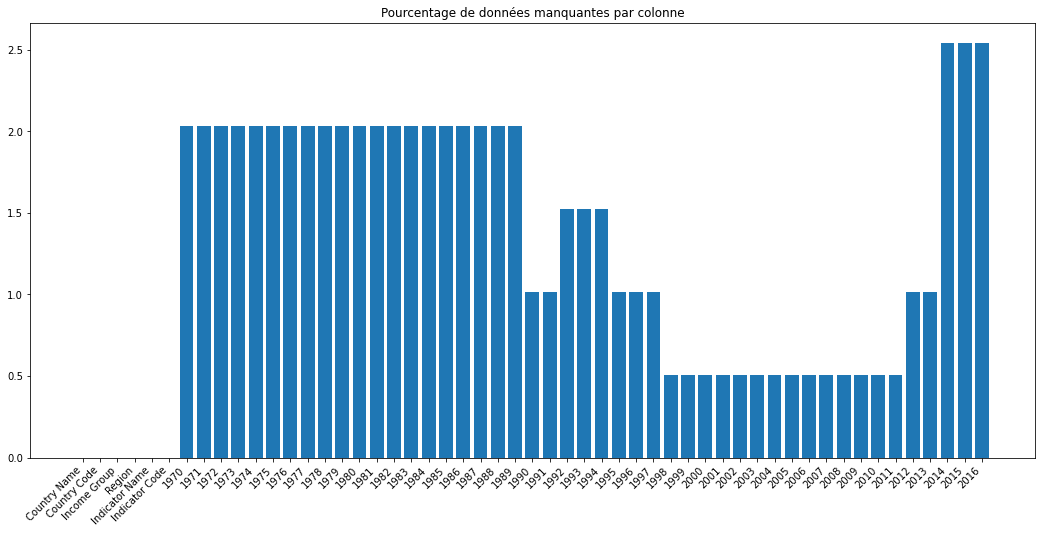

In [178]:
# Création d'un graphique pour afficher le nombre de valeurs manquantes
plt.figure( figsize=(18,8))
plt.bar(df_population_nan.index,df_population_nan.Pourcentage)
plt.xticks(rotation = 45,ha='right')
plt.title('Pourcentage de données manquantes par colonne')
plt.show()

In [179]:
stabilite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 4 to 1161
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    188 non-null    object 
 1   Country Code    188 non-null    object 
 2   Income Group    188 non-null    object 
 3   Region          188 non-null    object 
 4   Indicator Name  188 non-null    object 
 5   Indicator Code  188 non-null    object 
 6   1970            0 non-null      float64
 7   1971            0 non-null      float64
 8   1972            0 non-null      float64
 9   1973            0 non-null      float64
 10  1974            0 non-null      float64
 11  1975            0 non-null      float64
 12  1976            0 non-null      float64
 13  1977            0 non-null      float64
 14  1978            0 non-null      float64
 15  1979            0 non-null      float64
 16  1980            0 non-null      float64
 17  1981            0 non-null      fl

In [180]:
# Création d'une df pour afficher le nombre de valeurs manquantes
stabilite_nan = { 'Nombre valeurs manquantes': stabilite.isnull().sum(), 'Pourcentage' :(stabilite.isnull().sum())/188*100 }
df_stabilite_nan = pd.DataFrame(data=stabilite_nan)

In [181]:
df_stabilite_nan

,Nombre valeurs manquantes,Pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Income Group,0,0.000000
Region,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,188,100.000000
1971,188,100.000000
1972,188,100.000000
1973,188,100.000000


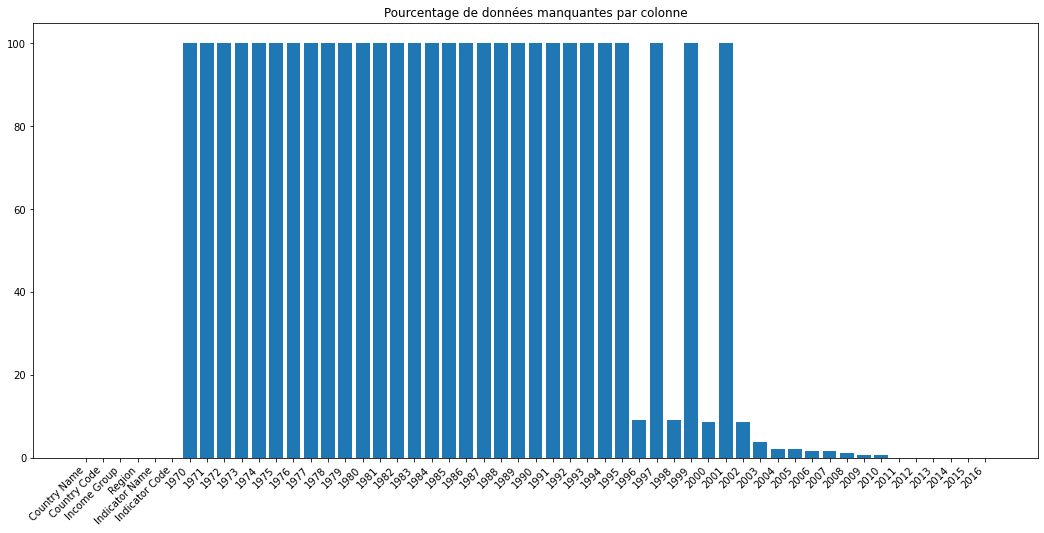

In [182]:
# Création d'un graphique pour afficher le nombre de valeurs manquantes
plt.figure( figsize=(18,8))
plt.bar(df_stabilite_nan.index,df_stabilite_nan.Pourcentage)
plt.xticks(rotation = 45,ha='right')
plt.title('Pourcentage de données manquantes par colonne')
plt.show()

In [183]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 5 to 1162
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    187 non-null    object 
 1   Country Code    187 non-null    object 
 2   Income Group    187 non-null    object 
 3   Region          187 non-null    object 
 4   Indicator Name  187 non-null    object 
 5   Indicator Code  187 non-null    object 
 6   1970            0 non-null      float64
 7   1971            0 non-null      float64
 8   1972            0 non-null      float64
 9   1973            0 non-null      float64
 10  1974            0 non-null      float64
 11  1975            0 non-null      float64
 12  1976            0 non-null      float64
 13  1977            0 non-null      float64
 14  1978            0 non-null      float64
 15  1979            0 non-null      float64
 16  1980            0 non-null      float64
 17  1981            0 non-null      fl

In [184]:
# Création d'une df pour afficher le nombre de valeurs manquantes
internet_nan = { 'Nombre valeurs manquantes': internet.isnull().sum(), 'Pourcentage' :(internet.isnull().sum())/188*100 }
df_internet_nan = pd.DataFrame(data=internet_nan)

In [185]:
df_internet_nan

,Nombre valeurs manquantes,Pourcentage
Country Name,0,0.000000
Country Code,0,0.000000
Income Group,0,0.000000
Region,0,0.000000
Indicator Name,0,0.000000
Indicator Code,0,0.000000
1970,187,99.468085
1971,187,99.468085
1972,187,99.468085
1973,187,99.468085


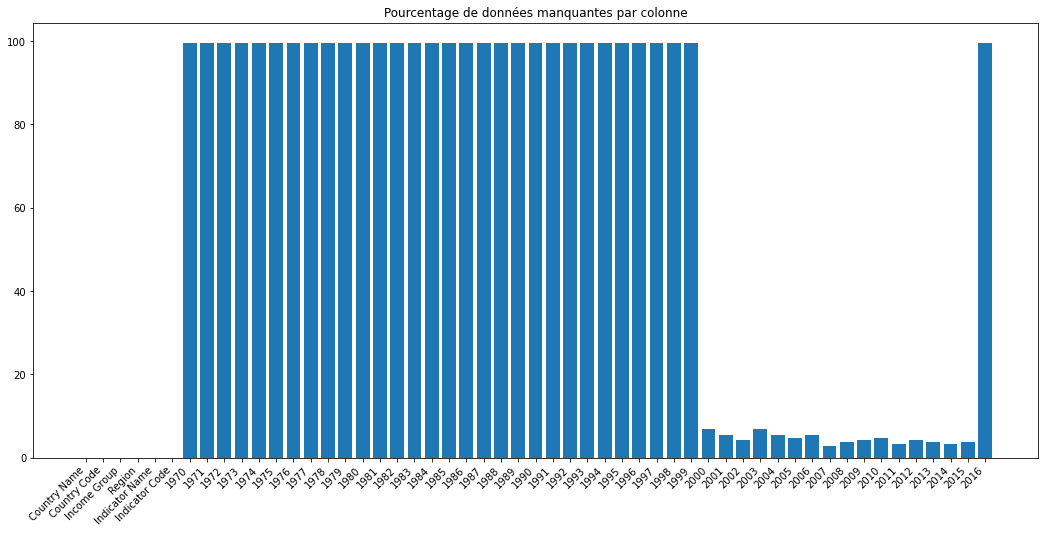

In [186]:
# Création d'un graphique pour afficher le nombre de valeurs manquantes
plt.figure( figsize=(18,8))
plt.bar(df_internet_nan.index,df_internet_nan.Pourcentage)
plt.xticks(rotation = 45,ha='right')
plt.title('Pourcentage de données manquantes par colonne')
plt.show()

# Choix des années <a class="anchor" id="section_4_5"></a>

Les graphiques ci-dessus indiquent que les colonnes 2000 à 2015 (mis à part l'année 2001) contiennent moins de 20% de données manquantes. 

In [187]:
# Je ne conserve que les colonnes qui me seront utiles.
df_final = df_final[['Country Name', 'Country Code','Region', 'Indicator Name', 'Indicator Code', 'Income Group','2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015']]

In [188]:
df_final

,Country Name,Country Code,Region,Indicator Name,Indicator Code,Income Group,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Low income,NaN,NaN,8.700000e+02,9.200000e+02,...,1.070000e+03,1.210000e+03,1.250000e+03,1.490000e+03,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03
1,Afghanistan,AFG,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,NaN,1.304874e+01,NaN,1.331708e+01,...,2.993046e+01,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01
2,Afghanistan,AFG,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Low income,NaN,NaN,NaN,1.256840e+00,...,NaN,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN
3,Afghanistan,AFG,South Asia,"Population, total",SP.POP.TOTL,Low income,2.009376e+07,2.096646e+07,2.197992e+07,2.306485e+07,...,2.589345e+07,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07
4,Afghanistan,AFG,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,Low income,-2.440187e+00,NaN,-2.035389e+00,-2.197809e+00,...,-2.221302e+00,-2.410581e+00,-2.690477e+00,-2.712689e+00,-2.579152e+00,-2.502060e+00,-2.418561e+00,-2.519349e+00,-2.411068e+00,-2.571222e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,Zimbabwe,ZWE,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,4.256227e+01,4.333893e+01,4.125247e+01,3.761876e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,4.667318e+01,4.757019e+01,NaN,NaN
1159,Zimbabwe,ZWE,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Low income,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00
1160,Zimbabwe,ZWE,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,Low income,1.222225e+07,1.236616e+07,1.250052e+07,1.263390e+07,...,1.312427e+07,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07
1161,Zimbabwe,ZWE,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,Low income,-1.322906e+00,NaN,-1.521978e+00,-1.088343e+00,...,-9.329606e-01,-1.108968e+00,-1.213945e+00,-1.167150e+00,-1.104014e+00,-9.453285e-01,-7.786620e-01,-6.659498e-01,-7.135702e-01,-6.181563e-01


In [189]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163 entries, 0 to 1162
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1163 non-null   object 
 1   Country Code    1163 non-null   object 
 2   Region          1163 non-null   object 
 3   Indicator Name  1163 non-null   object 
 4   Indicator Code  1163 non-null   object 
 5   Income Group    1163 non-null   object 
 6   2000            954 non-null    float64
 7   2001            795 non-null    float64
 8   2002            977 non-null    float64
 9   2003            975 non-null    float64
 10  2004            990 non-null    float64
 11  2005            990 non-null    float64
 12  2006            986 non-null    float64
 13  2007            992 non-null    float64
 14  2008            987 non-null    float64
 15  2009            988 non-null    float64
 16  2010            992 non-null    float64
 17  2011            1005 non-null   f

In [190]:
# Je crée une copie de ma df
df_final_1 = df_final.copy();
df_final_1.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')

In [191]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163 entries, 0 to 1162
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1163 non-null   object 
 1   Country Code    1163 non-null   object 
 2   Region          1163 non-null   object 
 3   Indicator Name  1163 non-null   object 
 4   Indicator Code  1163 non-null   object 
 5   Income Group    1163 non-null   object 
 6   2000            954 non-null    float64
 7   2001            795 non-null    float64
 8   2002            977 non-null    float64
 9   2003            975 non-null    float64
 10  2004            990 non-null    float64
 11  2005            990 non-null    float64
 12  2006            986 non-null    float64
 13  2007            992 non-null    float64
 14  2008            987 non-null    float64
 15  2009            988 non-null    float64
 16  2010            992 non-null    float64
 17  2011            1005 non-null   f

In [192]:
# Je supprime les colonnes 2000 et 2001.
df_final_1 = df_final_1.drop(['2000','2001'],axis=1)

Je commence par créer une colonne moyenne sera utilisée avec le méthode **fillna** pour remplacer mes valeurs manquantes.

In [193]:
df_final_1['Moyenne'] = df_final_1.loc[:,'2002':'2015'].mean(axis = 1)

In [194]:
df_final_1

,Country Name,Country Code,Region,Indicator Name,Indicator Code,Income Group,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
0,Afghanistan,AFG,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Low income,8.700000e+02,9.200000e+02,9.200000e+02,1.010000e+03,...,1.210000e+03,1.250000e+03,1.490000e+03,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1.398571e+03
1,Afghanistan,AFG,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,NaN,1.331708e+01,1.866479e+01,1.978370e+01,...,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01,4.086653e+01
2,Afghanistan,AFG,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Low income,NaN,1.256840e+00,1.256030e+00,NaN,...,NaN,NaN,3.903390e+00,NaN,3.755980e+00,NaN,NaN,8.662800e+00,NaN,3.767008e+00
3,Afghanistan,AFG,South Asia,"Population, total",SP.POP.TOTL,Low income,2.197992e+07,2.306485e+07,2.411898e+07,2.507080e+07,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,2.781986e+07
4,Afghanistan,AFG,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,Low income,-2.035389e+00,-2.197809e+00,-2.296179e+00,-2.070934e+00,...,-2.410581e+00,-2.690477e+00,-2.712689e+00,-2.579152e+00,-2.502060e+00,-2.418561e+00,-2.519349e+00,-2.411068e+00,-2.571222e+00,-2.402627e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,Zimbabwe,ZWE,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,4.125247e+01,3.761876e+01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.667318e+01,4.757019e+01,NaN,NaN,4.327865e+01
1159,Zimbabwe,ZWE,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Low income,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.905600e+00,5.823760e+00,5.868670e+00,5.871750e+00,NaN,8.433270e+00,6.380610e+00
1160,Zimbabwe,ZWE,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,Low income,1.250052e+07,1.263390e+07,1.277751e+07,1.294003e+07,...,1.332991e+07,1.355847e+07,1.381060e+07,1.408632e+07,1.438665e+07,1.471083e+07,1.505451e+07,1.541168e+07,1.577745e+07,1.386447e+07
1161,Zimbabwe,ZWE,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,Low income,-1.521978e+00,-1.088343e+00,-1.207500e+00,-1.272914e+00,...,-1.108968e+00,-1.213945e+00,-1.167150e+00,-1.104014e+00,-9.453285e-01,-7.786620e-01,-6.659498e-01,-7.135702e-01,-6.181563e-01,-1.024246e+00


In [195]:
df_final_1.loc[:,'2002':'2015'] = df_final_1.loc[:,'2002':'2015'].apply(lambda row: row.fillna(row.mean()), axis=1)

In [196]:
df_final_1 = df_final_1.dropna(axis=0,how='any')

In [197]:
#df_final_1['2002':'2015'] = df_final_1['2002':'2015'].fillna(df_final_1['Moyenne'])

In [198]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1162
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1082 non-null   object 
 1   Country Code    1082 non-null   object 
 2   Region          1082 non-null   object 
 3   Indicator Name  1082 non-null   object 
 4   Indicator Code  1082 non-null   object 
 5   Income Group    1082 non-null   object 
 6   2002            1082 non-null   float64
 7   2003            1082 non-null   float64
 8   2004            1082 non-null   float64
 9   2005            1082 non-null   float64
 10  2006            1082 non-null   float64
 11  2007            1082 non-null   float64
 12  2008            1082 non-null   float64
 13  2009            1082 non-null   float64
 14  2010            1082 non-null   float64
 15  2011            1082 non-null   float64
 16  2012            1082 non-null   float64
 17  2013            1082 non-null   f

In [199]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1162
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1082 non-null   object 
 1   Country Code    1082 non-null   object 
 2   Region          1082 non-null   object 
 3   Indicator Name  1082 non-null   object 
 4   Indicator Code  1082 non-null   object 
 5   Income Group    1082 non-null   object 
 6   2002            1082 non-null   float64
 7   2003            1082 non-null   float64
 8   2004            1082 non-null   float64
 9   2005            1082 non-null   float64
 10  2006            1082 non-null   float64
 11  2007            1082 non-null   float64
 12  2008            1082 non-null   float64
 13  2009            1082 non-null   float64
 14  2010            1082 non-null   float64
 15  2011            1082 non-null   float64
 16  2012            1082 non-null   float64
 17  2013            1082 non-null   f

In [200]:
df_final_1['Country Name'].nunique()

198

Après avoir filtré mes données manquantes, je compte à présent une liste de 198 pays.

# Analyse des données <a class="anchor" id="chapter5"></a>

## Ordre de grandeur des indicateurs par région en 2015 <a class="anchor" id="section_5_1">

In [201]:
df_2015 = df_final_1[['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group','2015']]

In [202]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1162
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1082 non-null   object 
 1   Country Code    1082 non-null   object 
 2   Region          1082 non-null   object 
 3   Indicator Name  1082 non-null   object 
 4   Indicator Code  1082 non-null   object 
 5   Income Group    1082 non-null   object 
 6   2015            1082 non-null   float64
dtypes: float64(1), object(6)
memory usage: 67.6+ KB


In [203]:
df_2015.loc[df_2015['2015'].isna(),:]

,Country Name,Country Code,Region,Indicator Name,Indicator Code,Income Group,2015


In [204]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1162
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1082 non-null   object 
 1   Country Code    1082 non-null   object 
 2   Region          1082 non-null   object 
 3   Indicator Name  1082 non-null   object 
 4   Indicator Code  1082 non-null   object 
 5   Income Group    1082 non-null   object 
 6   2015            1082 non-null   float64
dtypes: float64(1), object(6)
memory usage: 67.6+ KB


In [205]:
df_2015.groupby('Region')['Country Name'].count()

Region
East Asia & Pacific           165
Europe & Central Asia         298
Latin America & Caribbean     198
Middle East & North Africa    103
North America                  17
South Asia                     48
Sub-Saharan Africa            253
Name: Country Name, dtype: int64

df_2015['2015']=df_2015['2015'].astype('float')

df_2015.info()

In [206]:
df_2015['Indicator Code'].unique()

array(['NY.GNP.PCAP.PP.CD', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL',
       'PV.EST', 'IT.NET.USER.ZS'], dtype=object)

In [207]:
secondaire = df_2015.loc[df_2015['Indicator Code']=='SE.SEC.ENRR',:]

superieur = df_2015.loc[df_2015['Indicator Code']=='SE.TER.ENRR',:];

population = df_2015.loc[df_2015['Indicator Code']=='SP.POP.TOTL',:];

internet = df_2015.loc[df_2015['Indicator Code']=='IT.NET.USER.ZS',:];

stabilite = df_2015.loc[df_2015['Indicator Code']=='PV.EST',:];

revenus = df_2015.loc[df_2015['Indicator Code']=='NY.GNP.PCAP.PP.CD',:]

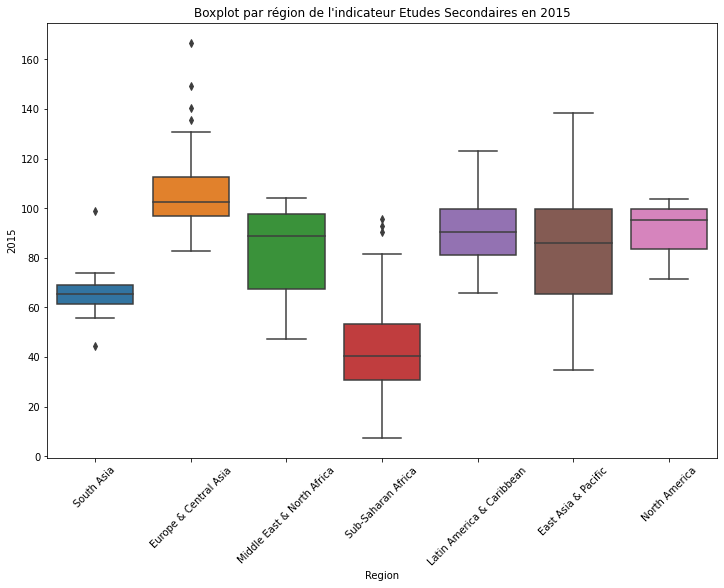

In [208]:
plt.figure(figsize=(12,8))
sns.boxplot(data=secondaire, x="Region", y="2015")
plt.title('Boxplot par région de l\'indicateur Etudes Secondaires en 2015')
plt.xticks(rotation = 45, ha='center')
plt.show()

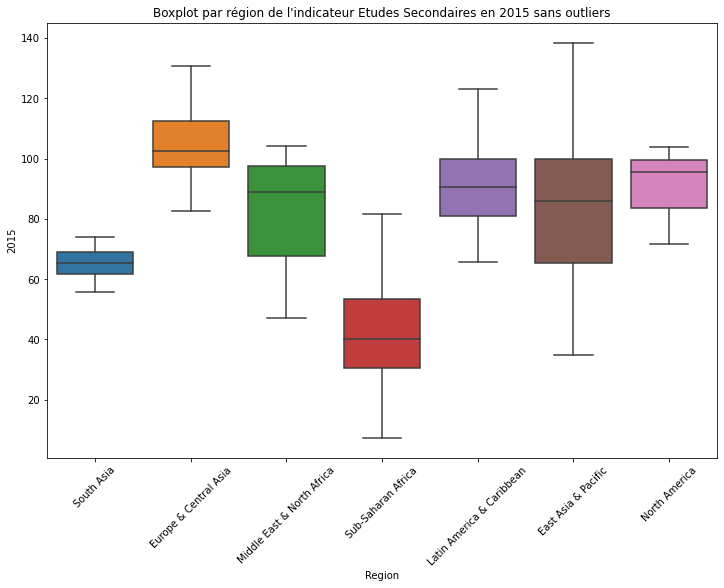

In [209]:
plt.figure(figsize=(12,8))
sns.boxplot(data=secondaire, x="Region", y="2015",showfliers=False)
plt.title('Boxplot par région de l\'indicateur Etudes Secondaires en 2015 sans outliers')
plt.xticks(rotation = 45, ha='center')
plt.show()

In [210]:
secondaire.groupby('Region').describe()

2015                                               \
                           count        mean        std        min        25%   
Region                                                                          
East Asia & Pacific         26.0   82.910648  26.580143  34.772860  65.425899   
Europe & Central Asia       46.0  107.084956  17.139537  82.755596  97.056326   
Latin America & Caribbean   32.0   90.147634  13.682927  65.626701  81.055061   
Middle East & North Africa  17.0   82.980627  19.701642  47.069019  67.547769   
North America                3.0   90.267906  16.767278  71.542412  83.455893   
South Asia                   8.0   66.806801  15.678342  44.525871  61.554499   
Sub-Saharan Africa          42.0   43.587021  21.153656   7.353040  30.653608   

                                                                
                                   50%         75%         max  
Region                                                          
East Asia & Pacific          86.002590   99.751225  138.436428  
Europe & Central Asia       102.577080  112.407248  166.808472  
Latin America & Caribbean    90.524361   99.838196  123.085732  
Middle East & North Africa   88.876457   97.633682  104.233269  
North America                95.369374   99.630653  103.891932  
South Asia                   65.382288   68.869690   98.855972  
Sub-Saharan Africa           40.205046   53.427817   95.696159

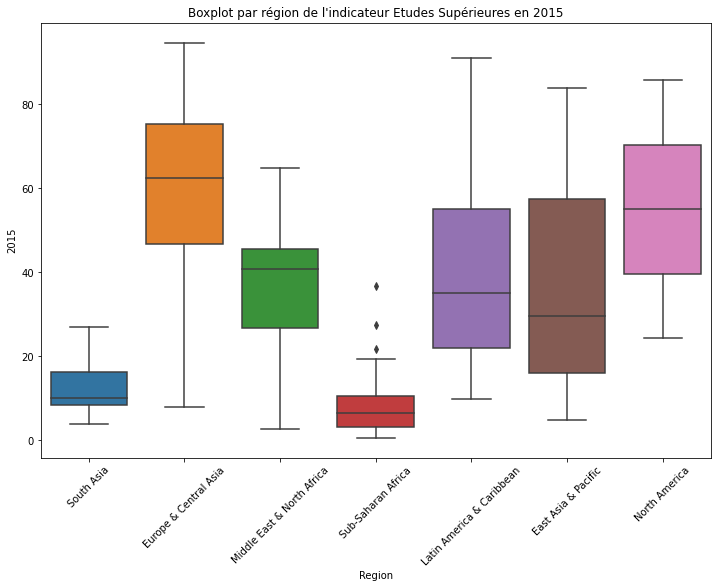

In [211]:
plt.figure(figsize=(12,8))
sns.boxplot(data=superieur, x="Region", y="2015")
plt.title('Boxplot par région de l\'indicateur Etudes Supérieures en 2015')
plt.xticks(rotation = 45, ha='center')
plt.show()

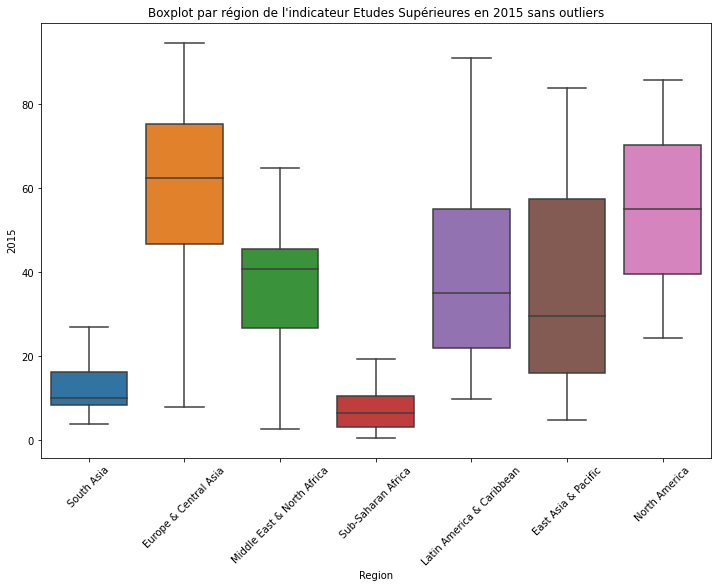

In [212]:
plt.figure(figsize=(12,8))
sns.boxplot(data=superieur, x="Region", y="2015",showfliers=False )
plt.title('Boxplot par région de l\'indicateur Etudes Supérieures en 2015 sans outliers')
plt.xticks(rotation = 45, ha='center')
plt.show()

In [213]:
superieur.groupby('Region').describe()

2015                                              \
                           count       mean        std        min        25%   
Region                                                                         
East Asia & Pacific         21.0  37.950232  25.561078   4.740067  15.955487   
Europe & Central Asia       48.0  59.417476  22.077131   7.984440  46.686066   
Latin America & Caribbean   30.0  40.570711  24.300273   9.810523  21.899950   
Middle East & North Africa  16.0  37.812896  17.791561   2.616477  26.836485   
North America                2.0  55.048238  43.483586  24.300699  39.674469   
South Asia                   8.0  12.673094   7.524460   3.767008   8.477940   
Sub-Saharan Africa          40.0   8.527384   7.573224   0.528654   3.168284   

                                                             
                                  50%        75%        max  
Region                                                       
East Asia & Pacific         29.568946  57.427794  83.931320  
Europe & Central Asia       62.398420  75.309160  94.732300  
Latin America & Caribbean   35.175514  55.082117  91.147743  
Middle East & North Africa  40.874001  45.507607  64.746780  
North America               55.048238  70.422007  85.795776  
South Asia                   9.981333  16.154117  26.874880  
Sub-Saharan Africa           6.488447  10.407176  36.667568

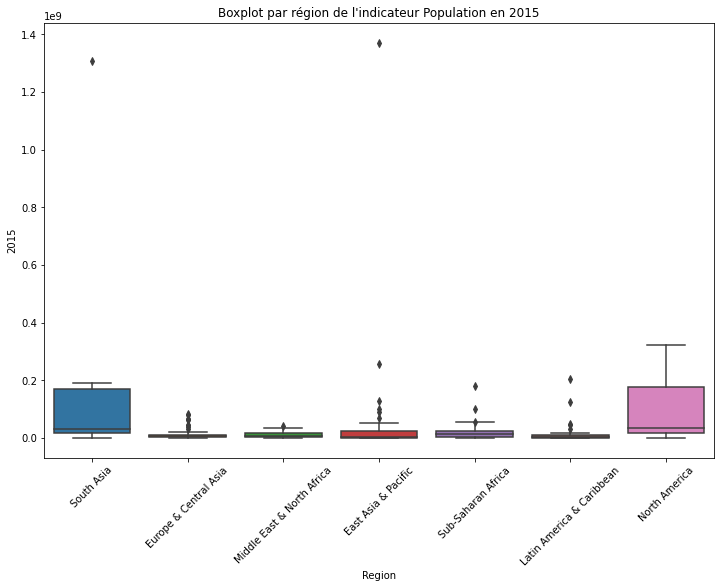

In [214]:
plt.figure(figsize=(12,8))
sns.boxplot(data=population, x="Region", y="2015")
plt.title('Boxplot par région de l\'indicateur Population en 2015')
plt.xticks(rotation = 45, ha='center')
plt.show()

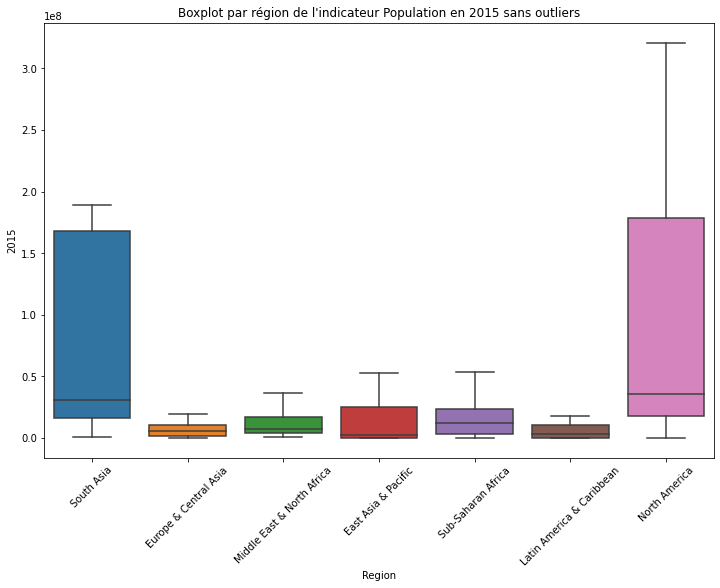

In [215]:
plt.figure(figsize=(12,8))
sns.boxplot(data=population, x="Region", y="2015", showfliers=False)
plt.title('Boxplot par région de l\'indicateur Population en 2015 sans outliers')
plt.xticks(rotation = 45, ha='center')
plt.show()

In [216]:
population.groupby('Region').describe()

2015                                         \
                           count          mean           std        min   
Region                                                                    
East Asia & Pacific         32.0  6.815463e+07  2.438011e+08   11001.00   
Europe & Central Asia       55.0  1.383999e+07  2.094977e+07   32960.00   
Latin America & Caribbean   37.0  1.619516e+07  3.921009e+07   29151.75   
Middle East & North Africa  18.0  1.271705e+07  1.337488e+07  431874.00   
North America                3.0  1.189368e+08  1.758151e+08   65235.00   
South Asia                   8.0  2.180238e+08  4.468297e+08  409163.00   
Sub-Saharan Africa          43.0  2.082558e+07  3.165964e+07   93419.00   

                                                                                
                                   25%         50%           75%           max  
Region                                                                          
East Asia & Pacific           185768.5   2108927.0  2.552279e+07  1.371220e+09  
Europe & Central Asia        1889663.5   5565284.0  1.068347e+07  8.168661e+07  
Latin America & Caribbean     109455.0   3473181.0  1.072470e+07  2.059621e+08  
Middle East & North Africa   4001798.0   7307527.5  1.686966e+07  3.987153e+07  
North America               17956922.5  35848610.0  1.783726e+08  3.208966e+08  
South Asia                  15921346.5  31196388.0  1.682458e+08  1.309054e+09  
Sub-Saharan Africa           3253231.2  12091533.0  2.353430e+07  1.811817e+08

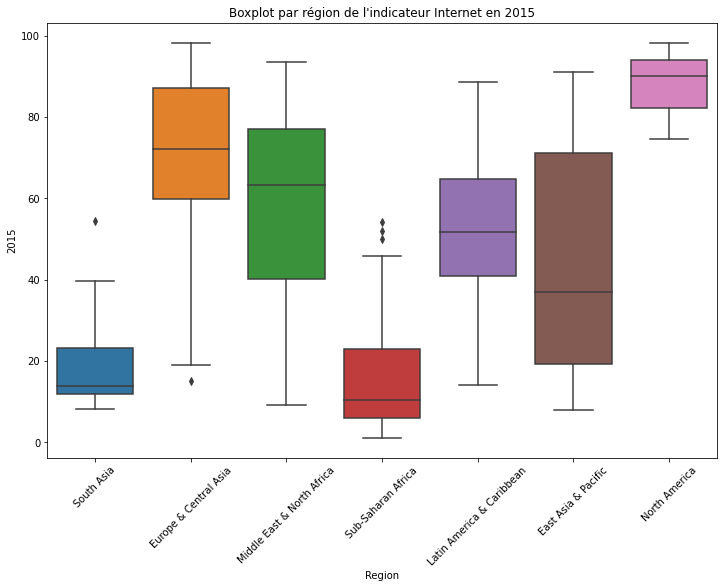

In [217]:
plt.figure(figsize=(12,8))
sns.boxplot(data=internet, x="Region", y="2015")
plt.title('Boxplot par région de l\'indicateur Internet en 2015')
plt.xticks(rotation = 45, ha='center')
plt.show()

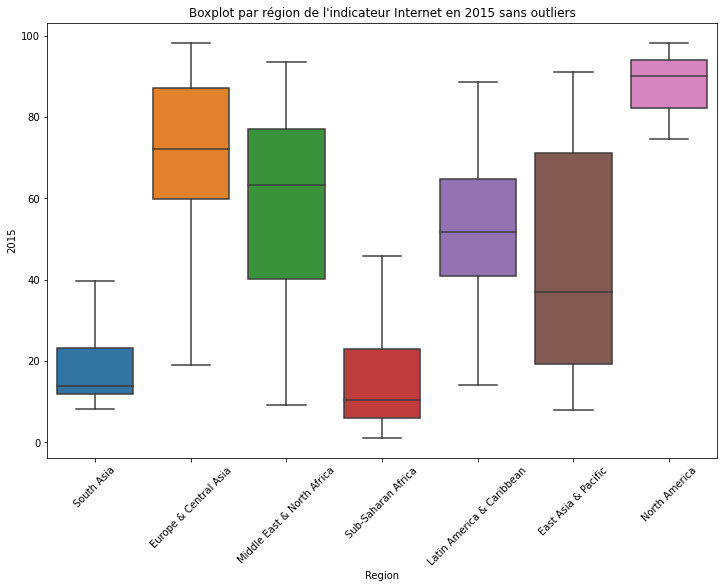

In [218]:
plt.figure(figsize=(12,8))
sns.boxplot(data=internet, x="Region", y="2015",showfliers=False)
plt.title('Boxplot par région de l\'indicateur Internet en 2015 sans outliers')
plt.xticks(rotation = 45, ha='center')
plt.show()

In [219]:
internet.groupby('Region').describe()

2015                                              \
                           count       mean        std        min        25%   
Region                                                                         
East Asia & Pacific         29.0  41.992454  27.443277   7.900000  19.282442   
Europe & Central Asia       50.0  71.355880  19.407674  14.996775  59.883216   
Latin America & Caribbean   34.0  51.830042  17.952971  14.200000  41.036951   
Middle East & North Africa  18.0  58.935509  26.639802   9.137893  40.274999   
North America                3.0  87.625937  12.061232  74.554202  82.277101   
South Asia                   8.0  21.375447  16.596203   8.260000  11.825000   
Sub-Saharan Africa          43.0  16.606540  14.687693   1.083733   6.050000   

                                                             
                                  50%        75%        max  
Region                                                       
East Asia & Pacific         36.900000  71.064068  91.058028  
Europe & Central Asia       72.275239  87.214825  98.200000  
Latin America & Caribbean   51.852712  64.892697  88.661227  
Middle East & North Africa  63.348118  77.004072  93.478301  
North America               90.000000  94.161805  98.323610  
South Asia                  13.900000  23.136214  54.461955  
Sub-Saharan Africa          10.330000  22.871409  54.259618

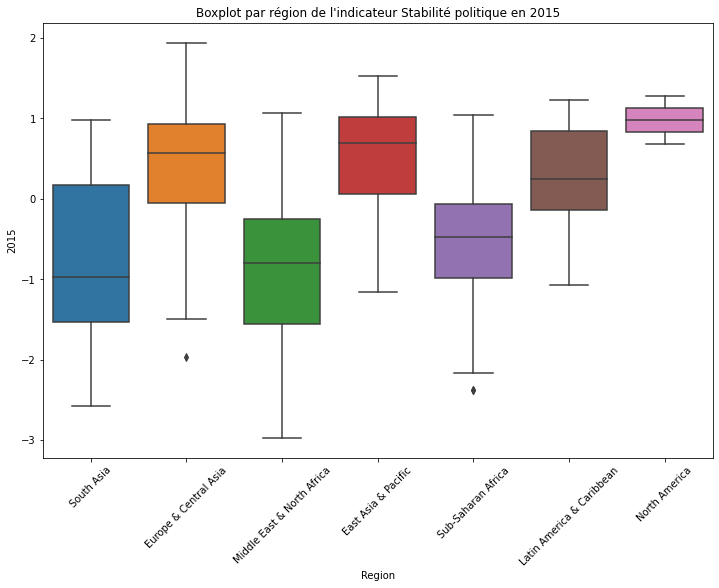

In [220]:
plt.figure(figsize=(12,8))
sns.boxplot(data=stabilite, x="Region", y="2015")
plt.title('Boxplot par région de l\'indicateur Stabilité politique en 2015')
plt.xticks(rotation = 45, ha='center')
plt.show()

In [221]:
stabilite.groupby('Region').describe()

2015                                          \
                           count      mean       std       min       25%   
Region                                                                     
East Asia & Pacific         30.0  0.473559  0.755294 -1.165067  0.063949   
Europe & Central Asia       52.0  0.411238  0.775961 -1.961800 -0.048200   
Latin America & Caribbean   34.0  0.257759  0.632240 -1.069147 -0.142880   
Middle East & North Africa  18.0 -0.785573  1.191488 -2.974081 -1.550669   
North America                3.0  0.978603  0.298343  0.678062  0.830556   
South Asia                   8.0 -0.840878  1.288350 -2.571222 -1.529691   
Sub-Saharan Africa          43.0 -0.573505  0.867322 -2.380828 -0.982080   

                                                          
                                 50%       75%       max  
Region                                                    
East Asia & Pacific         0.688685  1.014590  1.525453  
Europe & Central Asia       0.568981  0.931366  1.943138  
Latin America & Caribbean   0.246697  0.837945  1.230921  
Middle East & North Africa -0.793393 -0.245437  1.063939  
North America               0.983049  1.128874  1.274698  
South Asia                 -0.973414  0.172944  0.974715  
Sub-Saharan Africa         -0.476151 -0.067308  1.042092

In [222]:
revenus.groupby('Region').describe()

2015                                       \
                           count          mean           std      min   
Region                                                                  
East Asia & Pacific         27.0  19713.390313  25281.846324   2180.0   
Europe & Central Asia       47.0  29115.319149  17359.059012   3320.0   
Latin America & Caribbean   31.0  13793.360215   6865.158048   1770.0   
Middle East & North Africa  16.0  36597.687500  33160.701745   2025.0   
North America                3.0  57103.809524  13193.744214  43530.0   
South Asia                   8.0   6817.500000   4873.378851   1880.0   
Sub-Saharan Africa          42.0   5038.761905   6134.285415    670.0   

                                                                           
                                25%      50%           75%            max  
Region                                                                     
East Asia & Pacific          5290.0   8620.0  20675.000000   98650.000000  
Europe & Central Asia       15990.0  26450.0  42210.000000   68780.000000  
Latin America & Caribbean    8250.0  13150.0  18565.000000   32250.000000  
Middle East & North Africa  13347.5  28679.0  47112.500000  125000.000000  
North America               50715.0  57900.0  63890.714286   69881.428571  
South Asia                   3297.5   5695.0   8522.500000   16170.000000  
Sub-Saharan Africa           1532.5   2205.0   5455.000000   25720.000000

In [223]:
revenus

,Country Name,Country Code,Region,Indicator Name,Indicator Code,Income Group,2015
0,Afghanistan,AFG,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Low income,1880.000000
6,Albania,ALB,Europe & Central Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Upper middle income,11340.000000
12,Algeria,DZA,Middle East & North Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Upper middle income,14170.000000
30,Angola,AGO,Sub-Saharan Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Upper middle income,6270.000000
36,Antigua and Barbuda,ATG,Latin America & Caribbean,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,High income: nonOECD,21010.000000
...,...,...,...,...,...,...,...
1127,Uzbekistan,UZB,Europe & Central Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Lower middle income,6210.000000
1133,Vanuatu,VUT,East Asia & Pacific,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Lower middle income,2551.538462
1139,Vietnam,VNM,East Asia & Pacific,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Lower middle income,5740.000000
1151,Zambia,ZMB,Sub-Saharan Africa,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Lower middle income,3810.000000


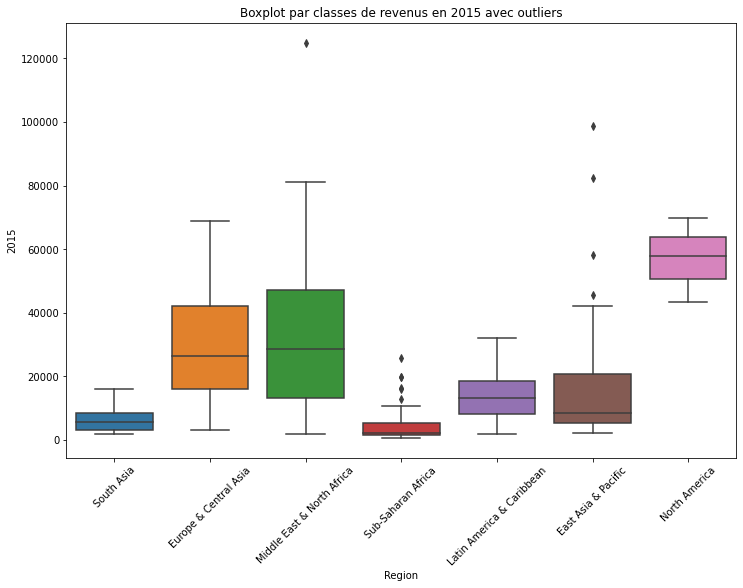

In [224]:
plt.figure(figsize=(12,8))
sns.boxplot(data=revenus, x="Region", y="2015")
plt.title('Boxplot par classes de revenus en 2015 avec outliers')
plt.xticks(rotation = 45, ha='center')
plt.show()

In [225]:
df_2015

,Country Name,Country Code,Region,Indicator Name,Indicator Code,Income Group,2015
0,Afghanistan,AFG,South Asia,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Low income,1.880000e+03
1,Afghanistan,AFG,South Asia,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,5.564441e+01
2,Afghanistan,AFG,South Asia,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Low income,3.767008e+00
3,Afghanistan,AFG,South Asia,"Population, total",SP.POP.TOTL,Low income,3.373649e+07
4,Afghanistan,AFG,South Asia,Political Stability and Absence of Violence/Te...,PV.EST,Low income,-2.571222e+00
...,...,...,...,...,...,...,...
1158,Zimbabwe,ZWE,Sub-Saharan Africa,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,4.327865e+01
1159,Zimbabwe,ZWE,Sub-Saharan Africa,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Low income,8.433270e+00
1160,Zimbabwe,ZWE,Sub-Saharan Africa,"Population, total",SP.POP.TOTL,Low income,1.577745e+07
1161,Zimbabwe,ZWE,Sub-Saharan Africa,Political Stability and Absence of Violence/Te...,PV.EST,Low income,-6.181563e-01


In [226]:
# Je fais un pivot afin d'avoir mes pays en index et mes indicateurs par colonne.
df_pivot = df_2015.pivot(index='Country Name', columns='Indicator Code', values='2015');
df_pivot = df_pivot.reset_index();


In [227]:
df_pivot.isna().sum()

Indicator Code
Country Name          0
IT.NET.USER.ZS       13
NY.GNP.PCAP.PP.CD    24
PV.EST               10
SE.SEC.ENRR          24
SE.TER.ENRR          33
SP.POP.TOTL           2
dtype: int64

Ma dataframe contient encore des valeurs manquantes.

In [228]:
# Je fais un masque pour afficher les valeurs manquantes
df_pivot[df_pivot.isna().any(axis=1)]

Indicator Code,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
3,American Samoa,NaN,NaN,1.181357,NaN,NaN,5.553700e+04
4,Andorra,87.900000,NaN,1.391288,NaN,NaN,7.801400e+04
9,Aruba,88.661227,NaN,1.230921,98.915149,15.273780,1.043410e+05
12,Azerbaijan,77.000000,17140.0,-0.729566,NaN,25.483200,9.649341e+06
23,Bosnia and Herzegovina,52.600000,11790.0,-0.402437,NaN,22.108311,3.535961e+06
32,Canada,90.000000,43530.0,1.274698,103.891932,NaN,3.584861e+07
33,Cayman Islands,77.000000,NaN,1.153418,NaN,NaN,5.996300e+04
36,Channel Islands,NaN,NaN,NaN,NaN,NaN,1.637580e+05
43,Cuba,37.305097,NaN,0.644102,100.399872,36.280399,1.146143e+07
48,Dominica,65.000000,10260.0,1.077941,100.487892,NaN,7.316200e+04


Je retire ces pays de ma dataframe.

In [229]:
#df_pivot = df_pivot.drop(df_pivot.isna().any(axis=1))ù
df_pivot = df_pivot.dropna(axis=0,how='any')

In [230]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 197
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       153 non-null    object 
 1   IT.NET.USER.ZS     153 non-null    float64
 2   NY.GNP.PCAP.PP.CD  153 non-null    float64
 3   PV.EST             153 non-null    float64
 4   SE.SEC.ENRR        153 non-null    float64
 5   SE.TER.ENRR        153 non-null    float64
 6   SP.POP.TOTL        153 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.6+ KB


In [231]:
# J'arrondi mes valeurs pour plus de lisibilité
df_pivot = df_pivot.round(3)

In [232]:
df_pivot

Indicator Code,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
0,Afghanistan,8.260,1880.000,-2.571,55.644,3.767,33736494.0
1,Albania,56.900,11340.000,0.346,95.765,58.110,2880703.0
2,Algeria,38.200,14170.000,-1.090,81.824,36.922,39871528.0
5,Angola,22.000,6270.000,-0.501,24.607,9.308,27859305.0
6,Antigua and Barbuda,70.000,21010.000,1.005,102.705,17.224,99923.0
...,...,...,...,...,...,...,...
190,United States,74.554,57900.000,0.678,95.369,85.796,320896618.0
191,Uruguay,64.571,20570.000,1.004,98.834,55.566,3431552.0
192,Uzbekistan,42.800,6210.000,-0.373,95.640,8.788,31298900.0
193,Vanuatu,22.351,2551.538,0.478,54.816,4.740,264603.0


In [233]:
# Je tri ma dataframe en fonction de l'indicateur population pour retirer les pays les plus peuplés.
df_pivot.sort_values('SP.POP.TOTL', ascending=False)

Indicator Code,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
38,China,50.300,14420.000,-0.550,94.299,43.392,1.371220e+09
79,India,14.900,6070.000,-0.948,73.969,26.875,1.309054e+09
190,United States,74.554,57900.000,0.678,95.369,85.796,3.208966e+08
80,Indonesia,22.063,10700.000,-0.615,85.842,24.255,2.581621e+08
25,Brazil,58.328,15310.000,-0.331,99.651,50.605,2.059621e+08
...,...,...,...,...,...,...,...
152,Seychelles,54.260,25720.000,0.689,81.602,14.256,9.341900e+04
20,Bermuda,98.324,69881.429,0.983,71.542,24.301,6.523500e+04
164,St. Kitts and Nevis,75.700,25050.000,0.582,90.391,79.565,5.428800e+04
111,Marshall Islands,19.282,5410.000,0.919,76.612,29.569,5.299400e+04


In [234]:
# J'enregistre les USA afin de l'ajouter par la suite à ma liste finale des pays sélectionnés.
usa = df_pivot.loc[df_pivot['Country Name']=='United States',:]

In [235]:
usa

Indicator Code,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
190,United States,74.554,57900.0,0.678,95.369,85.796,320896618.0


In [236]:
# Je supprime la Chine, l'Inde et les USA qui sont des outliers
df_pivot = df_pivot.drop(labels=[38,79,190], axis=0)

In [237]:
df_pivot[df_pivot.isna().any(axis=1)]

Indicator Code,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL


In [238]:
df_pivot = df_pivot.set_index('Country Name')

df_pivot = df_pivot.reset_index()

## ACP <a class="anchor" id="section_5_2">

Pour faire la sélection de mes pays, je commence par réaliser une **Analyse en Composantes Principales** afin de réduire la dimension des données en quelques variables continues contenant les informations les plus importantes dans les données.  


In [239]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IT.NET.USER.ZS     150 non-null    float64
 1   NY.GNP.PCAP.PP.CD  150 non-null    float64
 2   PV.EST             150 non-null    float64
 3   SE.SEC.ENRR        150 non-null    float64
 4   SE.TER.ENRR        150 non-null    float64
 5   SP.POP.TOTL        150 non-null    float64
dtypes: float64(6)
memory usage: 8.2+ KB


In [240]:
df_pivot.columns

Index(['IT.NET.USER.ZS', 'NY.GNP.PCAP.PP.CD', 'PV.EST', 'SE.SEC.ENRR',
       'SE.TER.ENRR', 'SP.POP.TOTL'],
      dtype='object', name='Indicator Code')

In [241]:
# préparation des données pour l'ACP

X= df_pivot.values
names = df_pivot.index
nom_variable = df_pivot.columns

nom_variable

In [242]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [243]:
# Calcul des composantes principales

pca = decomposition.PCA(n_components=5); #correspond aux 5 variables 
pca.fit(X_scaled)

PCA(n_components=5)

In [244]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[3.63291327 1.09778967 0.55789018 0.42570451 0.19421185]
[0.60144897 0.78319415 0.87555597 0.94603372 0.97818657]


In [245]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(5)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.632913,60.0,60.0
1,Dim2,1.097790,18.0,78.0
2,Dim3,0.557890,9.0,88.0
3,Dim4,0.425705,7.0,95.0
4,Dim5,0.194212,3.0,98.0


In [246]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

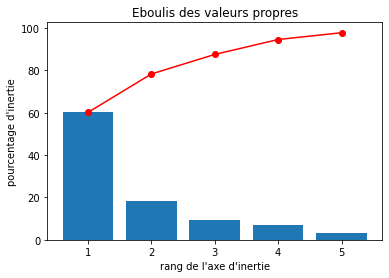

In [247]:
# Affichage d'un graphique qui décrit le pourcentage d’inertie totale associé à chaque axe.
display_scree_plot(pca)

In [248]:
# Calcul des composantes principales
n_comp = 2
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=2)

In [249]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

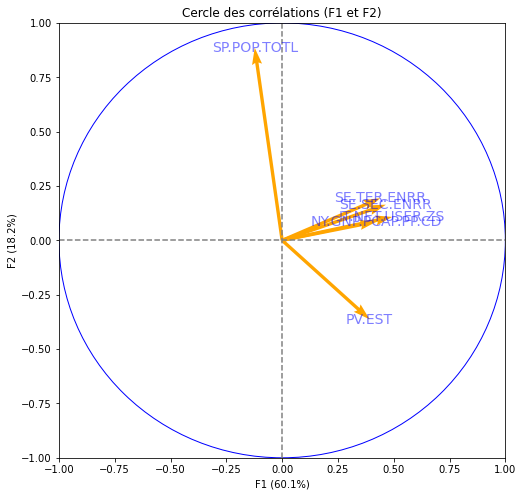

In [250]:
# Affichage de mes cercles de correlation
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1)], labels = np.array(nom_variable))

In [251]:
# Fonction qui permet de projeter les individus sur les dimensions 
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

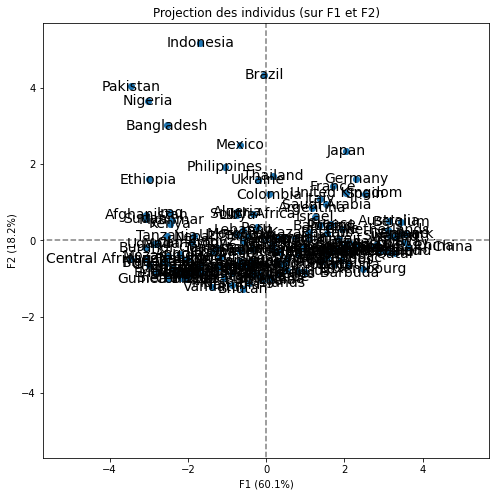

<Figure size 432x288 with 0 Axes>

In [252]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))
plt.figure()
plt.show()

## Classification ascendante hiérarchique <a class="anchor" id="section_5_3">

In [253]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(15,10))
    plt.title('Dendrogram')
    plt.xlabel('Pays')
    plt.axhline(y =5, linewidth = .5, c = "dimgray", linestyle = "--")
    dendrogram(
        Z,
        labels = names,
        orientation = "top",
    )
    plt.show()

df_pivot['Country Name']

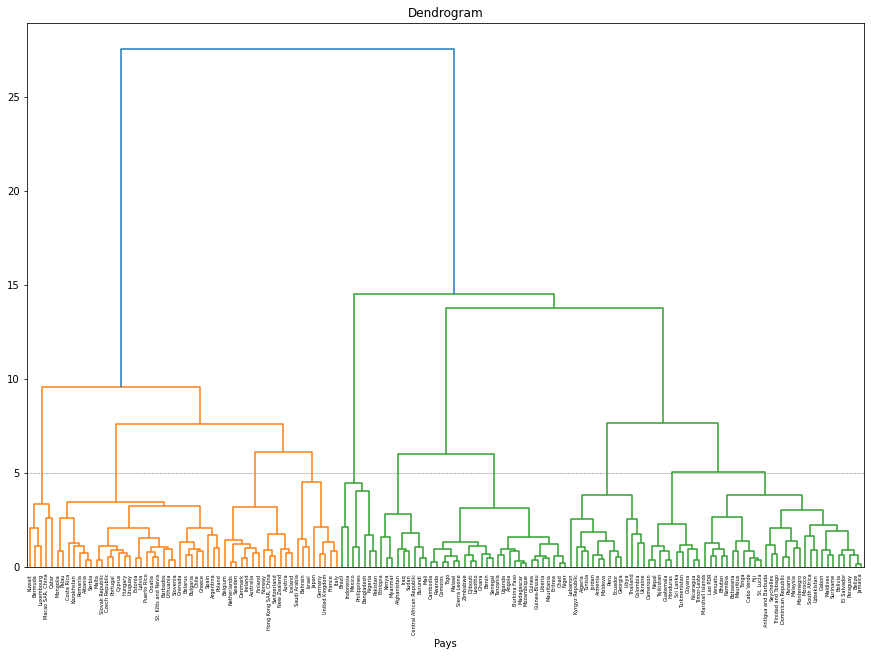

In [254]:
# préparation des données pour le clustering
X = df_pivot[['IT.NET.USER.ZS', 'NY.GNP.PCAP.PP.CD', 'PV.EST',
      'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL']].values
names = df_pivot.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [255]:
# Découpe du dendrogramme en 10 clusters
clusters = fcluster(Z, 10, criterion='maxclust')

# Création d'un df avec une colonne cluster et une colonne zone
groupes = pd.DataFrame({"cluster": clusters, "Country Name": names})
print(groupes)

     cluster         Country Name
0          6          Afghanistan
1          2              Albania
2          8              Algeria
3          7               Angola
4         10  Antigua and Barbuda
..       ...                  ...
145        4       United Kingdom
146        2              Uruguay
147       10           Uzbekistan
148       10              Vanuatu
149        7             Zimbabwe

[150 rows x 2 columns]


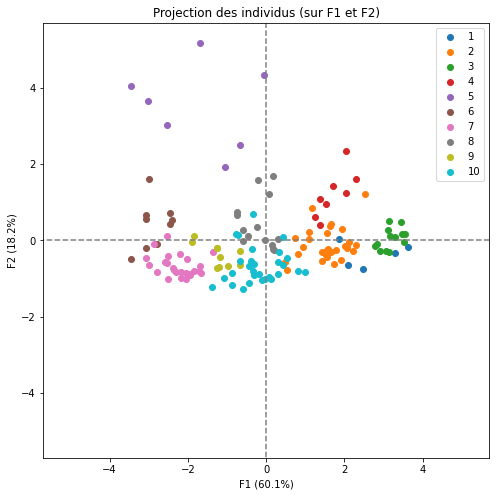

In [256]:
# Projection des individus sur F1 et F2
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=None, illustrative_var=clusters)
plt.show()


In [257]:
# Je tri les pays par cluster
groupes.sort_values(by=['cluster'])

,cluster,Country Name
71,1,Kuwait
80,1,Luxembourg
81,1,"Macao SAR, China"
16,1,Bermuda
115,1,Qatar
...,...,...
18,10,Bolivia
125,10,South Africa
17,10,Bhutan
47,10,Gabon


In [258]:
# Affichage du nombre de pays par cluster
groupes['cluster'].value_counts()

2     30
10    29
7     25
8     14
3     13
9     10
6      9
4      8
5      7
1      5
Name: cluster, dtype: int64

In [259]:
df_pivot

Indicator Code,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,,,
Afghanistan,8.260,1880.000,-2.571,55.644,3.767,33736494.0
Albania,56.900,11340.000,0.346,95.765,58.110,2880703.0
Algeria,38.200,14170.000,-1.090,81.824,36.922,39871528.0
Angola,22.000,6270.000,-0.501,24.607,9.308,27859305.0
Antigua and Barbuda,70.000,21010.000,1.005,102.705,17.224,99923.0
...,...,...,...,...,...,...
United Kingdom,92.000,41190.000,0.518,103.508,58.960,65128861.0
Uruguay,64.571,20570.000,1.004,98.834,55.566,3431552.0
Uzbekistan,42.800,6210.000,-0.373,95.640,8.788,31298900.0


In [260]:
df_pivot.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahrain',
       ...
       'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Uganda', 'Ukraine',
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Zimbabwe'],
      dtype='object', name='Country Name', length=150)

In [261]:
# Mise à l'échelle des données
df_final_scaled = pd.DataFrame(X_scaled, columns= df_pivot.columns, index=df_pivot.index)

In [262]:
df_final_scaled.head()

Indicator Code,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,,,
Afghanistan,-1.332345,-0.848565,-2.803233,-0.851650,-1.176372,0.268193
Albania,0.350058,-0.386266,0.425044,0.486629,0.786231,-0.492367
Algeria,-0.296754,-0.247967,-1.164194,0.021612,0.021025,0.419415
Angola,-0.857094,-0.634031,-0.512341,-1.886923,-0.976258,0.123327
Antigua and Barbuda,0.803172,0.086297,1.154366,0.718121,-0.690371,-0.560910


In [263]:
groupes.head()

,cluster,Country Name
0,6,Afghanistan
1,2,Albania
2,8,Algeria
3,7,Angola
4,10,Antigua and Barbuda


In [264]:
# Jointure de la colonne cluster dans df_final
df_final_clusters = pd.merge(df_final_scaled, groupes, on='Country Name')

In [265]:
df_final_clusters

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
0,Afghanistan,-1.332345,-0.848565,-2.803233,-0.851650,-1.176372,0.268193,6
1,Albania,0.350058,-0.386266,0.425044,0.486629,0.786231,-0.492367,2
2,Algeria,-0.296754,-0.247967,-1.164194,0.021612,0.021025,0.419415,8
3,Angola,-0.857094,-0.634031,-0.512341,-1.886923,-0.976258,0.123327,7
4,Antigua and Barbuda,0.803172,0.086297,1.154366,0.718121,-0.690371,-0.560910,10
...,...,...,...,...,...,...,...,...
145,United Kingdom,1.564127,1.072470,0.615398,0.744906,0.816929,1.041979,4
146,Uruguay,0.615389,0.064794,1.153260,0.588999,0.694354,-0.478789,2
147,Uzbekistan,-0.137645,-0.636963,-0.370682,0.482460,-0.995038,0.208109,10
148,Vanuatu,-0.844953,-0.815748,0.571129,-0.879269,-1.141232,-0.556851,10


In [266]:
# Calcul de la moyenne des variables pour chaque cluster 
df_final_clusters_moy = df_final_clusters.groupby('cluster').agg(['mean'])

C:\Users\sarah\AppData\Local\Temp\ipykernel_8992\3235634814.py:2: FutureWarning: ['Country Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_final_clusters_moy = df_final_clusters.groupby('cluster').agg(['mean'])


In [267]:
df_final_clusters_moy

,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
,mean,mean,mean,mean,mean,mean
cluster,,,,,,
1,1.475483,3.393854,1.017798,0.311337,-0.220947,-0.525645
2,0.673834,0.182331,0.683866,0.720399,1.141526,-0.328532
3,1.454435,1.532139,1.209702,1.477659,1.391867,-0.351054
4,1.180372,1.183036,0.038110,0.725530,0.832689,0.800387
5,-0.515544,-0.474160,-1.257632,-0.337842,-0.492460,3.744877
6,-1.295308,-0.749904,-1.978365,-1.332693,-1.057481,0.368425
7,-1.208717,-0.836674,-0.424778,-1.453774,-1.090834,-0.183842
8,0.017201,-0.386482,-0.989492,0.441887,0.352205,-0.038533


## Clustermap <a class="anchor" id="section_5_4">

<Figure size 432x288 with 0 Axes>

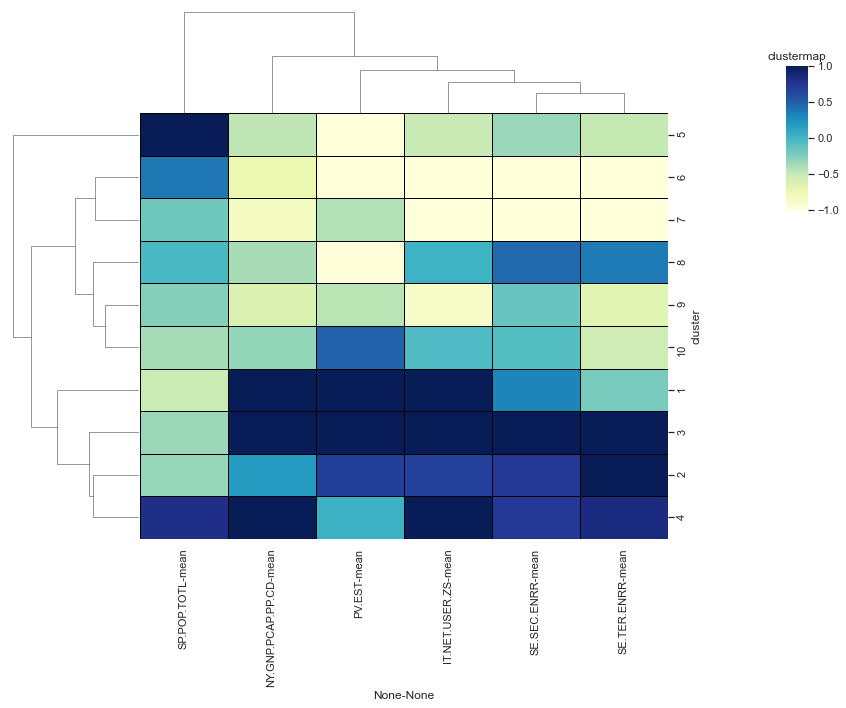

In [268]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(df_final_clusters_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')

plt.show()

# Boxplot des clusters <a class="anchor" id="section_5_5">

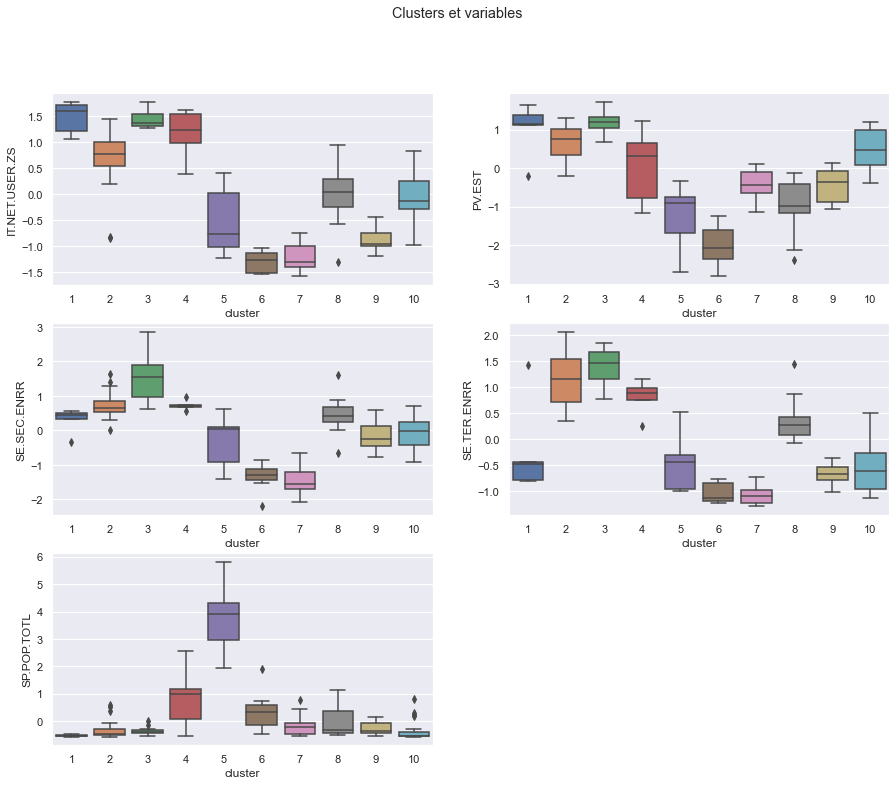

In [269]:
# Création de boxplot 
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

fig.suptitle('Clusters et variables')

sns.boxplot(ax=axes[0, 0], data=df_final_clusters, x='cluster', y='IT.NET.USER.ZS')
sns.boxplot(ax=axes[0, 1], data=df_final_clusters, x='cluster', y='PV.EST')
sns.boxplot(ax=axes[1, 0], data=df_final_clusters, x='cluster', y='SE.SEC.ENRR')
sns.boxplot(ax=axes[1, 1], data=df_final_clusters, x='cluster', y='SE.TER.ENRR')
sns.boxplot(ax=axes[2, 0], data=df_final_clusters, x='cluster', y='SP.POP.TOTL')
fig.delaxes(axes[2,1])

plt.show()

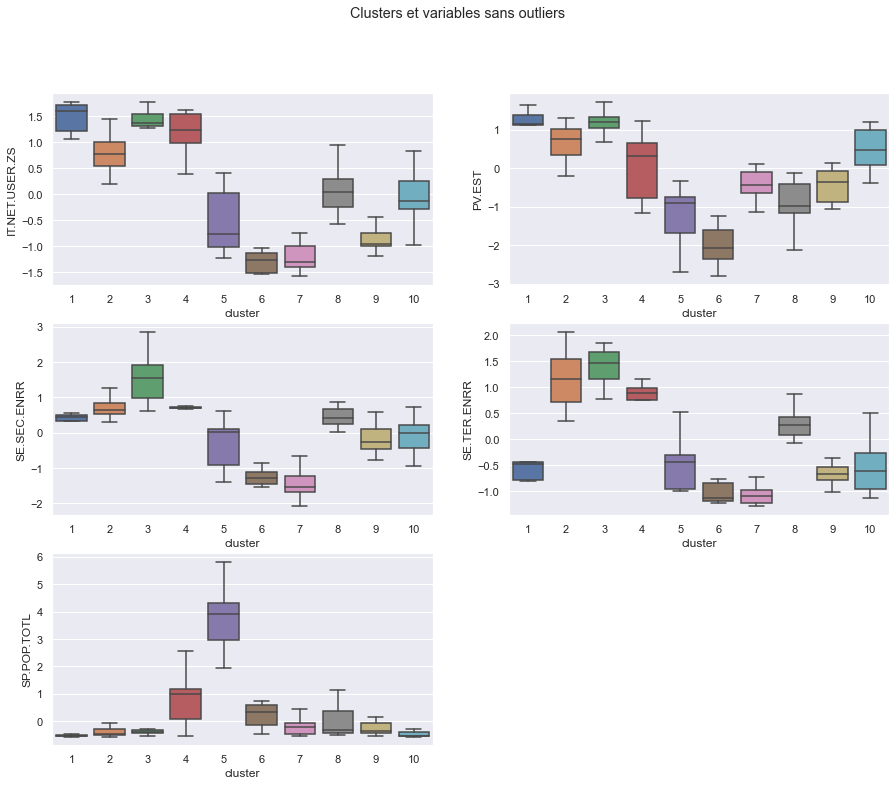

In [270]:
# Création de boxplot 
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

fig.suptitle('Clusters et variables sans outliers')

sns.boxplot(ax=axes[0, 0], data=df_final_clusters, x='cluster', y='IT.NET.USER.ZS',showfliers=False)
sns.boxplot(ax=axes[0, 1], data=df_final_clusters, x='cluster', y='PV.EST',showfliers=False)
sns.boxplot(ax=axes[1, 0], data=df_final_clusters, x='cluster', y='SE.SEC.ENRR',showfliers=False)
sns.boxplot(ax=axes[1, 1], data=df_final_clusters, x='cluster', y='SE.TER.ENRR',showfliers=False)
sns.boxplot(ax=axes[2, 0], data=df_final_clusters, x='cluster', y='SP.POP.TOTL',showfliers=False)
fig.delaxes(axes[2,1])

plt.show()

In [271]:
cluster_1 = df_final_clusters.loc[df_final_clusters['cluster']==1];
cluster_2 = df_final_clusters.loc[df_final_clusters['cluster']==2];
cluster_3 = df_final_clusters.loc[df_final_clusters['cluster']==3];
cluster_4 = df_final_clusters.loc[df_final_clusters['cluster']==4];
cluster_5 = df_final_clusters.loc[df_final_clusters['cluster']==5];
cluster_6 = df_final_clusters.loc[df_final_clusters['cluster']==6];
cluster_7 = df_final_clusters.loc[df_final_clusters['cluster']==7];
cluster_8 = df_final_clusters.loc[df_final_clusters['cluster']==8];
cluster_9 = df_final_clusters.loc[df_final_clusters['cluster']==9];
cluster_10 = df_final_clusters.loc[df_final_clusters['cluster']==10];


In [272]:
cluster_1

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
16,Bermuda,1.782867,2.474588,1.130019,-0.321355,-0.434784,-0.561765,1
71,Kuwait,1.218238,3.025271,-0.193608,0.460211,-0.484840,-0.466360,1
80,Luxembourg,1.715522,2.420763,1.634679,0.573956,-0.814859,-0.549333,1
81,"Macao SAR, China",1.066047,3.880476,1.372388,0.510446,1.417848,-0.548561,1
115,Qatar,1.594738,5.168171,1.145513,0.333425,-0.788098,-0.502206,1


In [273]:
cluster_2

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
1,Albania,0.350058,-0.386266,0.425044,0.486629,0.786231,-0.492367,2
5,Argentina,0.735481,0.036450,0.058722,0.593636,1.246735,0.506825,2
11,Barbados,1.014510,-0.121885,1.298239,0.809450,1.131744,-0.556368,2
12,Belarus,0.534416,-0.081324,0.163860,0.865354,1.863581,-0.329465,2
21,Bulgaria,0.341618,-0.066663,0.060936,0.595070,1.357716,-0.386444,2
29,Chile,1.032496,0.181591,0.521327,0.649440,1.886550,-0.125543,2
32,Costa Rica,0.449086,-0.197143,0.796899,1.397951,0.624436,-0.444865,2
33,Croatia,0.797810,0.156668,0.696188,0.568385,1.181403,-0.459759,2
34,Cyprus,0.862526,0.595510,0.651919,0.620487,0.858136,-0.534756,2
35,Czech Republic,0.999256,0.600397,1.125592,0.813419,1.033872,-0.303425,2


In [274]:
cluster_3

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
7,Australia,1.306820,1.283584,1.021561,1.909967,1.503152,0.023007,3
8,Austria,1.285341,1.489322,1.307092,0.628626,1.632444,-0.350576,3
13,Belgium,1.323838,1.289937,0.691761,2.856345,1.397551,-0.285477,3
36,Denmark,1.713931,1.533304,1.035948,1.656094,1.677443,-0.423282,3
45,Finland,1.371190,1.142353,1.194208,2.277551,1.840070,-0.428309,3
58,"Hong Kong SAR, China",1.320206,1.900309,1.199741,0.655978,1.160564,-0.383296,3
60,Iceland,1.778578,1.370571,1.489700,0.980933,1.307769,-0.555219,3
63,Ireland,1.269949,1.707277,1.047015,1.544584,1.713234,-0.448095,3
100,Netherlands,1.554580,1.491765,1.066936,1.811166,0.977822,-0.145823,3
101,New Zealand,1.328923,0.848162,1.729856,1.181336,1.718759,-0.450095,3


In [275]:
cluster_4

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
9,Bahrain,1.615249,1.222009,-1.146487,0.698974,0.250030,-0.529559,4
46,France,1.080090,1.102280,0.160540,0.983502,0.744157,1.078834,4
49,Germany,1.411590,1.457069,0.816819,0.716786,1.153016,1.450109,4
64,Israel,1.057469,0.828126,-1.169727,0.710582,1.025927,-0.356813,4
65,Italy,0.393017,0.877484,0.458245,0.724692,0.944632,0.933567,4
67,Japan,1.531544,1.123294,1.220769,0.675825,0.761601,2.570508,4
118,Saudi Arabia,0.789890,1.781558,-0.650680,0.548972,0.965218,0.214474,4
145,United Kingdom,1.564127,1.072470,0.615398,0.744906,0.816929,1.041979,4


In [276]:
cluster_5

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
10,Bangladesh,-1.171853,-0.766465,-1.299213,-0.588771,-0.989765,3.410045,5
20,Brazil,0.399450,-0.192256,-0.324200,0.616251,0.515187,4.513359,5
61,Indonesia,-0.854915,-0.417542,-0.638506,0.155637,-0.436445,5.800030,5
91,Mexico,0.368424,-0.102826,-0.842141,0.029651,-0.405098,2.539696,5
104,Nigeria,-0.770622,-0.652601,-2.088298,-1.403393,-0.955239,3.902551,5
106,Pakistan,-1.237572,-0.680456,-2.705843,-1.222503,-0.953903,4.104641,5
111,Philippines,-0.341720,-0.506972,-0.905223,0.048230,-0.221958,1.943819,5


In [277]:
cluster_6

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
0,Afghanistan,-1.332345,-0.848565,-2.803233,-0.851650,-1.176372,0.268193,6
23,Burundi,-1.548871,-0.901343,-2.104899,-1.290749,-1.205733,-0.311973,6
27,Central African Republic,-1.517741,-0.907696,-2.066164,-2.201504,-1.230544,-0.451317,6
43,Ethiopia,-1.138820,-0.860782,-1.615732,-1.534482,-1.134045,1.898383,6
62,Iraq,-1.036956,-0.167822,-2.459046,-1.114896,-0.773399,0.326836,6
70,Kenya,-1.044289,-0.794321,-1.334627,-1.032273,-1.197210,0.600947,6
86,Mali,-1.260746,-0.843190,-1.823794,-1.329876,-1.116745,-0.132809,6
97,Myanmar,-1.241030,-0.687786,-1.247197,-1.189147,-0.851805,0.728318,6
130,Sudan,-1.536973,-0.737633,-2.350588,-1.449658,-0.831472,0.389251,6


In [278]:
cluster_7

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
3,Angola,-0.857094,-0.634031,-0.512341,-1.886923,-0.976258,0.123327,7
15,Benin,-1.228751,-0.837325,0.026627,-0.812690,-0.983300,-0.302688,7
22,Burkina Faso,-1.341338,-0.860782,-0.634079,-1.584716,-1.200316,-0.116967,7
25,Cambodia,-0.995449,-0.779171,0.110738,-1.547825,-0.839743,-0.180881,7
28,Chad,-1.496988,-0.836837,-1.036922,-2.083223,-1.243437,-0.218057,7
31,Comoros,-1.360051,-0.866158,-0.215742,-1.119132,-1.074563,-0.544211,7
37,Djibouti,-0.825964,-0.841479,-0.449258,-1.137678,-1.217940,-0.540514,7
41,Eritrea,-1.580555,-0.871631,-0.928464,-1.688687,-1.246218,-0.462784,7
50,Ghana,-0.822505,-0.741542,0.006707,-0.659219,-0.726233,0.116512,7
54,Guinea,-1.299831,-0.853941,-0.386176,-1.679681,-1.024869,-0.265331,7


In [279]:
cluster_8

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
2,Algeria,-0.296754,-0.247967,-1.164194,0.021612,0.021025,0.419415,8
6,Armenia,0.426188,-0.495243,-0.236770,0.244364,0.287843,-0.491474,8
30,Colombia,0.315642,-0.276311,-1.140953,0.564249,0.697641,0.625409,8
39,Ecuador,0.074730,-0.389686,-0.117245,0.884768,0.120486,-0.165433,8
48,Georgia,0.027343,-0.482537,-0.473606,0.750709,0.255700,-0.471751,8
68,Jordan,0.257359,-0.503062,-0.628546,0.256839,0.308067,-0.337607,8
72,Kyrgyz Republic,-0.571840,-0.778194,-0.933998,0.362712,0.381417,-0.416543,8
75,Lebanon,0.941527,-0.251876,-1.842608,-0.666123,0.077472,-0.419141,8
78,Libya,-1.301976,0.179050,-2.389323,0.708214,0.860809,-0.409689,8
92,Moldova,0.768583,-0.675569,-0.319773,0.164510,0.175994,-0.475769,8


In [280]:
cluster_9

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
26,Cameroon,-0.985073,-0.771352,-1.053523,-0.770461,-0.681197,-0.000528,9
53,Guatemala,-0.621682,-0.569524,-0.682774,-0.518656,-0.523411,-0.162769,9
56,Guyana,-0.442028,-0.574411,-0.112818,0.316247,-0.862315,-0.544430,9
57,Honduras,-0.680691,-0.730791,-0.476926,-0.346906,-0.515754,-0.342499,9
99,Nepal,-1.009908,-0.817778,-1.062376,-0.467188,-0.772858,0.142971,9
102,Nicaragua,-0.936510,-0.681922,-0.054162,-0.391670,-0.672096,-0.413458,9
127,Sri Lanka,-1.199524,-0.378446,0.141725,0.589733,-0.597447,-0.046585,9
134,Tajikistan,-0.961552,-0.776239,-0.935105,0.052700,-0.359881,-0.352659,9
137,Timor-Leste,-0.974696,-0.760112,-0.258904,-0.147136,-0.787195,-0.532785,9
142,Turkmenistan,-1.099320,-0.195188,-0.055269,0.138926,-1.024074,-0.426195,9


In [281]:
cluster_10

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
4,Antigua and Barbuda,0.803172,0.086297,1.154366,0.718121,-0.690371,-0.560910,10
14,Belize,-0.179498,-0.543135,0.089710,-0.012811,-0.471296,-0.554517,10
17,Bhutan,-0.241412,-0.572456,1.121165,-0.585635,-1.055639,-0.543965,10
18,Bolivia,-0.321312,-0.611551,-0.254477,0.174416,0.063604,-0.299022,10
19,Botswana,-0.327469,-0.152672,1.195315,-0.100838,-0.318132,-0.508919,10
24,Cabo Verde,-0.141692,-0.643316,1.002747,0.390998,-0.528431,-0.550238,10
38,Dominican Republic,0.257221,-0.274356,0.304412,-0.111912,0.497527,-0.303860,10
40,El Salvador,-0.690964,-0.548510,0.023307,-0.058409,-0.260348,-0.407778,10
44,Fiji,-0.148022,-0.519189,0.684014,0.234091,-0.736201,-0.541383,10
47,Gabon,-0.034398,-0.136057,0.065362,-0.929703,-1.007786,-0.515797,10


Les clusters 3 et 4 ont les profils les plus intéressants pour la sélection de mes pays.

# Choix des clusters <a class="anchor" id="section_5_6">

In [354]:
cluster_3

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
7,Australia,1.306820,1.283584,1.021561,1.909967,1.503152,0.023007,3
8,Austria,1.285341,1.489322,1.307092,0.628626,1.632444,-0.350576,3
13,Belgium,1.323838,1.289937,0.691761,2.856345,1.397551,-0.285477,3
36,Denmark,1.713931,1.533304,1.035948,1.656094,1.677443,-0.423282,3
45,Finland,1.371190,1.142353,1.194208,2.277551,1.840070,-0.428309,3
58,"Hong Kong SAR, China",1.320206,1.900309,1.199741,0.655978,1.160564,-0.383296,3
60,Iceland,1.778578,1.370571,1.489700,0.980933,1.307769,-0.555219,3
63,Ireland,1.269949,1.707277,1.047015,1.544584,1.713234,-0.448095,3
100,Netherlands,1.554580,1.491765,1.066936,1.811166,0.977822,-0.145823,3
101,New Zealand,1.328923,0.848162,1.729856,1.181336,1.718759,-0.450095,3


In [283]:
cluster_3['Country Name']

7                 Australia
8                   Austria
13                  Belgium
36                  Denmark
45                  Finland
58     Hong Kong SAR, China
60                  Iceland
63                  Ireland
100             Netherlands
101             New Zealand
105                  Norway
132                  Sweden
133             Switzerland
Name: Country Name, dtype: object

In [284]:
cluster_4

,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL,cluster
9,Bahrain,1.615249,1.222009,-1.146487,0.698974,0.250030,-0.529559,4
46,France,1.080090,1.102280,0.160540,0.983502,0.744157,1.078834,4
49,Germany,1.411590,1.457069,0.816819,0.716786,1.153016,1.450109,4
64,Israel,1.057469,0.828126,-1.169727,0.710582,1.025927,-0.356813,4
65,Italy,0.393017,0.877484,0.458245,0.724692,0.944632,0.933567,4
67,Japan,1.531544,1.123294,1.220769,0.675825,0.761601,2.570508,4
118,Saudi Arabia,0.789890,1.781558,-0.650680,0.548972,0.965218,0.214474,4
145,United Kingdom,1.564127,1.072470,0.615398,0.744906,0.816929,1.041979,4


In [285]:
cluster_4['Country Name']

9             Bahrain
46             France
49            Germany
64             Israel
65              Italy
67              Japan
118      Saudi Arabia
145    United Kingdom
Name: Country Name, dtype: object

In [286]:
df_pivot

Indicator Code,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
Country Name,,,,,,
Afghanistan,8.260,1880.000,-2.571,55.644,3.767,33736494.0
Albania,56.900,11340.000,0.346,95.765,58.110,2880703.0
Algeria,38.200,14170.000,-1.090,81.824,36.922,39871528.0
Angola,22.000,6270.000,-0.501,24.607,9.308,27859305.0
Antigua and Barbuda,70.000,21010.000,1.005,102.705,17.224,99923.0
...,...,...,...,...,...,...
United Kingdom,92.000,41190.000,0.518,103.508,58.960,65128861.0
Uruguay,64.571,20570.000,1.004,98.834,55.566,3431552.0
Uzbekistan,42.800,6210.000,-0.373,95.640,8.788,31298900.0


In [287]:
# Je reprend les données présentes dans ma df df_final filtrée avec les pays des clusters 1, 2, 4 et les USA
top_pays = df_final_1.loc[(df_final_1['Country Name'].isin(cluster_3['Country Name']))  | (df_final_1['Country Name'].isin(cluster_4['Country Name'])) | (df_final_1['Country Name']=='United States'),:]


In [288]:
top_pays.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Moyenne'],
      dtype='object')

# Evolution des indicateurs des pays sélectionnés <a class="anchor" id="chapter6"></a>

## Indicateur Population <a class="anchor" id="section_6_1"></a>

In [289]:
# Indicateur SP.POP.TOTL
ind_pop = top_pays.loc[top_pays['Indicator Code']=='SP.POP.TOTL',:]

In [290]:
ind_pop.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Moyenne'],
      dtype='object')

In [291]:
ind_pop = ind_pop[['Country Name', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']]

In [292]:
ind_pop = ind_pop.set_index('Country Name')

In [293]:
ind_pop = ind_pop.sort_values('2002', ascending=False)

In [294]:
ind_pop_transposed = ind_pop.T

In [295]:
ind_pop_transposed

Country Name,United States,Japan,Germany,France,United Kingdom,Italy,Saudi Arabia,Australia,Netherlands,Belgium,...,Switzerland,"Hong Kong SAR, China",Israel,Denmark,Finland,Norway,New Zealand,Ireland,Bahrain,Iceland
2002,287625193.0,127445000.0,82488495.0,61805267.0,59370479.0,57059007.0,21906308.0,19651400.0,16148929.0,10332785.0,...,7284753.0,6744100.0,6570000.0,5375931.0,5200598.0,4538159.0,3948500.0,3931947.0,735148.0,287523.0
2003,290107933.0,127718000.0,82534176.0,62244884.0,59647577.0,57313203.0,22556425.0,19895400.0,16225302.0,10376133.0,...,7339001.0,6730800.0,6689700.0,5390574.0,5213014.0,4564855.0,4027200.0,3996521.0,778711.0,289521.0
2004,292805298.0,127761000.0,82516260.0,62704897.0,59987905.0,57685327.0,23228890.0,20127400.0,16281779.0,10421137.0,...,7389625.0,6783500.0,6809000.0,5404523.0,5228172.0,4591910.0,4087500.0,4070262.0,829848.0,292074.0
2005,295516599.0,127773000.0,82469422.0,63179356.0,60401206.0,57969484.0,23905654.0,20394800.0,16319868.0,10478617.0,...,7437115.0,6813200.0,6930100.0,5419432.0,5246096.0,4623291.0,4133900.0,4159914.0,889168.0,296734.0
2006,298379912.0,127854000.0,82376451.0,63621376.0,60846820.0,58143979.0,24578301.0,20697900.0,16346101.0,10547958.0,...,7483934.0,6857100.0,7053700.0,5437272.0,5266268.0,4660677.0,4184600.0,4273591.0,958414.0,303782.0
2007,301231207.0,128001000.0,82266372.0,64016229.0,61322463.0,58438310.0,25252569.0,20827600.0,16381696.0,10625700.0,...,7551117.0,6916300.0,7180100.0,5461438.0,5288720.0,4709153.0,4223800.0,4398942.0,1035891.0,311566.0
2008,304093966.0,128063000.0,82110097.0,64374990.0,61806995.0,58826731.0,25940770.0,21249200.0,16445593.0,10709973.0,...,7647675.0,6957800.0,7308800.0,5493621.0,5313399.0,4768212.0,4259800.0,4489544.0,1114590.0,317414.0
2009,306771529.0,128047000.0,81902307.0,64707044.0,62276270.0,59095365.0,26661492.0,21691700.0,16530388.0,10796493.0,...,7743831.0,6972800.0,7485600.0,5523095.0,5338871.0,4828726.0,4302600.0,4535375.0,1185029.0,318499.0
2010,309348193.0,128070000.0,81776930.0,65027512.0,62766365.0,59277417.0,27425676.0,22031750.0,16615394.0,10895586.0,...,7824909.0,7024200.0,7623600.0,5547683.0,5363352.0,4889252.0,4350700.0,4560155.0,1240862.0,318041.0
2011,311663358.0,127833000.0,80274983.0,65342776.0,63258918.0,59379449.0,28238020.0,22340024.0,16693074.0,11047744.0,...,7912398.0,7071600.0,7765800.0,5570572.0,5388272.0,4953088.0,4384000.0,4576794.0,1278269.0,319014.0


Text(0.5, 1.0, "Evolution de l'indicateur démographique")

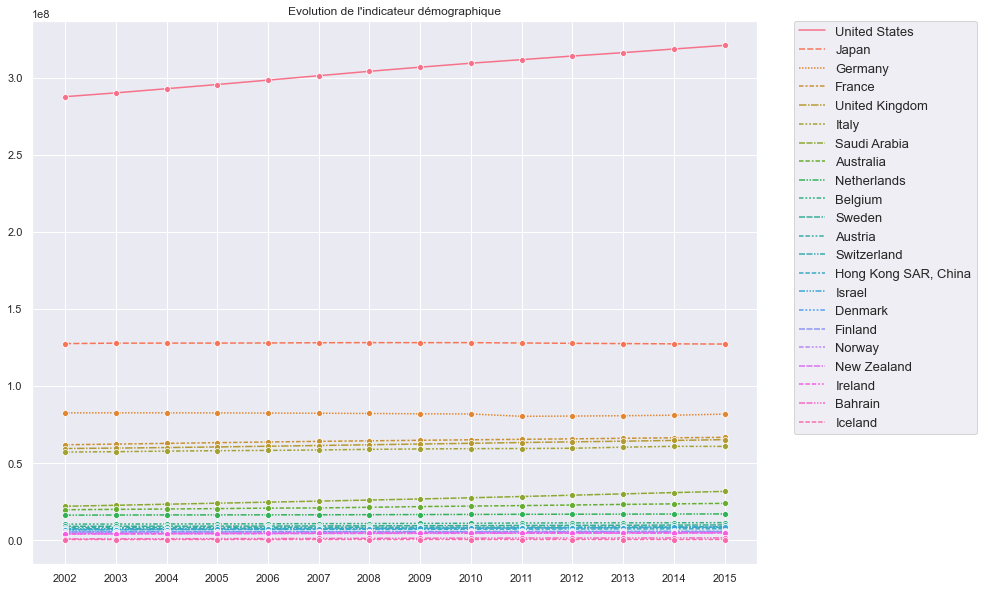

In [296]:
sns.lineplot(data=ind_pop_transposed,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='13')
plt.title('Evolution de l\'indicateur démographique')

Globalement cet indicateur est assez stable. 

## Indicateur de revenus <a class="anchor" id="section_6_2"></a>

In [297]:
# Indicateur NY.GNP.PCAP.PP.CD
ind_revenu = top_pays.loc[top_pays['Indicator Code']=='NY.GNP.PCAP.PP.CD',:]

In [298]:
ind_revenu.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Moyenne'],
      dtype='object')

In [299]:
ind_revenu = ind_revenu[['Country Name', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']]

In [300]:
ind_revenu = ind_revenu.set_index('Country Name')

In [301]:
ind_revenu = ind_revenu.sort_values('2002', ascending=False)

In [302]:
ind_revenu_transposed = ind_revenu.T

In [303]:
ind_revenu_transposed

Country Name,Switzerland,United States,Norway,Netherlands,Bahrain,Iceland,Saudi Arabia,Austria,Belgium,Sweden,...,United Kingdom,Germany,France,Finland,Japan,Italy,"Hong Kong SAR, China",Australia,Israel,New Zealand
2002,38730.0,38590.0,38070.0,33840.0,33580.0,32660.0,32480.0,31000.0,30990.0,30650.0,...,29090.0,28980.0,28930.0,28650.0,28560.0,28510.0,28470.0,27940.0,24290.0,22130.0
2003,40140.0,39960.0,38770.0,34000.0,34640.0,32400.0,35670.0,32030.0,31630.0,32060.0,...,30400.0,29720.0,28610.0,28810.0,29320.0,28940.0,30560.0,28890.0,22950.0,22820.0
2004,41620.0,42260.0,42600.0,35870.0,35760.0,34350.0,38550.0,33720.0,32690.0,33790.0,...,32190.0,31660.0,29590.0,31360.0,30950.0,29420.0,33720.0,30450.0,24490.0,23670.0
2005,43910.0,44740.0,48300.0,37020.0,37470.0,35470.0,40880.0,34940.0,33720.0,34480.0,...,33040.0,32250.0,31140.0,32130.0,32350.0,30100.0,36630.0,31380.0,24600.0,24020.0
2006,48380.0,47390.0,54150.0,41250.0,38350.0,36320.0,42210.0,37730.0,35890.0,38480.0,...,34720.0,34850.0,33200.0,34710.0,33920.0,32480.0,40880.0,33020.0,25590.0,25900.0
2007,49840.0,48420.0,55670.0,43850.0,39730.0,38740.0,43170.0,39340.0,37340.0,41860.0,...,35530.0,36970.0,34860.0,37810.0,35570.0,34010.0,44670.0,34960.0,27450.0,27290.0
2008,48960.0,48640.0,61400.0,44990.0,39100.0,34050.0,45630.0,41660.0,39030.0,43380.0,...,36190.0,38400.0,35910.0,40040.0,35710.0,35080.0,47440.0,35980.0,26870.0,27700.0
2009,52690.0,47250.0,55770.0,44130.0,35290.0,33630.0,43920.0,40950.0,38090.0,40720.0,...,34520.0,37910.0,35390.0,38350.0,33910.0,34530.0,45250.0,38880.0,26830.0,29440.0
2010,56140.0,48880.0,58620.0,44950.0,36080.0,32230.0,45100.0,42440.0,41390.0,42890.0,...,36200.0,40040.0,36760.0,39340.0,35900.0,35010.0,48130.0,37670.0,28290.0,29710.0
2011,56460.0,50710.0,62640.0,46910.0,35440.0,34550.0,49220.0,44600.0,41660.0,44720.0,...,36900.0,43770.0,38320.0,40870.0,36790.0,36250.0,51450.0,40100.0,30160.0,31250.0


Text(0.5, 1.0, "Evolution de l'indicateur de revenu")

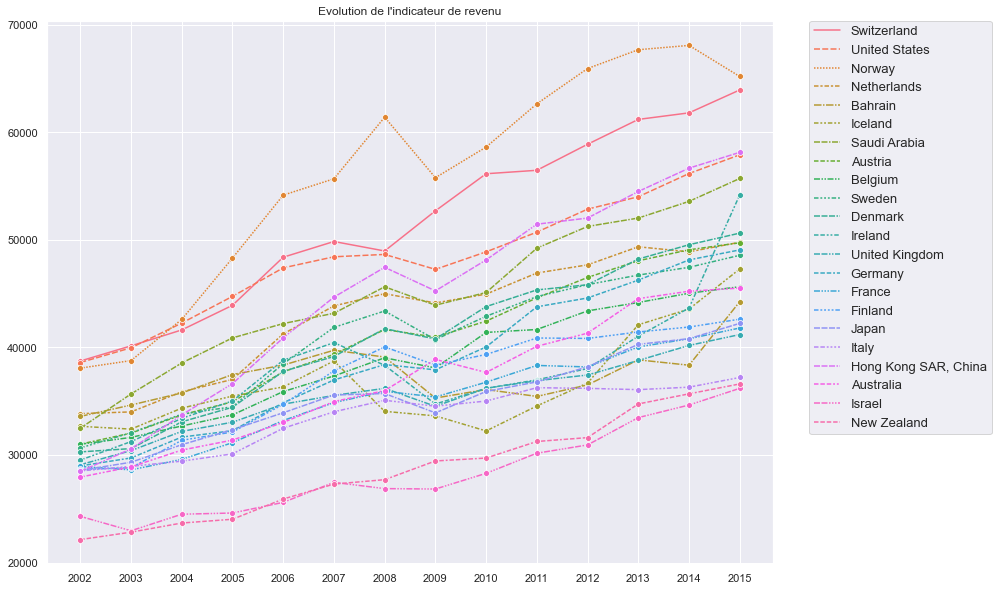

In [304]:
sns.lineplot(data=ind_revenu_transposed,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='13')
plt.title('Evolution de l\'indicateur de revenu')

## Indicateur Etudes Secondaires <a class="anchor" id="section_6_3"></a>

In [305]:
# Indicateur SE.SEC.ENRR
ind_secondaire = top_pays.loc[top_pays['Indicator Code']=='SE.SEC.ENRR',:]

In [306]:
ind_secondaire.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Moyenne'],
      dtype='object')

In [307]:
ind_secondaire = ind_secondaire[['Country Name', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']]

In [308]:
ind_secondaire = ind_secondaire.set_index('Country Name')

In [309]:
ind_secondaire = ind_secondaire.sort_values('2002', ascending=False)

In [310]:
ind_secondaire_transposed = ind_secondaire.T

In [311]:
ind_secondaire_transposed

Country Name,Belgium,Australia,Sweden,Finland,Denmark,Netherlands,New Zealand,Norway,Iceland,France,...,Japan,Germany,Ireland,Austria,Saudi Arabia,Italy,Bahrain,Switzerland,United States,"Hong Kong SAR, China"
2002,155.860443,154.311722,143.968796,128.983475,126.321533,122.313148,115.966293,112.424011,111.754097,107.709900,...,102.675346,101.641190,100.941467,99.162560,97.633682,97.286293,94.297302,93.465431,93.287643,76.894524
2003,158.987564,156.194351,137.063599,131.743698,126.465767,122.210228,118.660606,113.544182,115.121162,108.176224,...,101.948242,102.032143,104.016006,99.625053,97.633682,98.180977,94.260971,93.523773,95.005241,77.319252
2004,107.916496,149.942062,103.331200,110.912468,123.658249,119.279892,116.471558,115.489670,108.170692,107.921204,...,101.245270,102.389458,107.532578,99.679382,97.633682,98.037491,95.369698,94.150078,95.502487,78.992126
2005,108.354248,148.366104,104.110519,111.971077,124.180923,119.330368,120.103271,113.876167,109.112640,112.273819,...,100.998528,102.506104,109.539490,100.512802,86.166870,98.289612,96.196190,95.181824,95.673180,80.402367
2006,108.503578,127.389618,103.630692,111.613548,120.079102,119.494400,118.213959,114.040771,109.397186,112.074547,...,100.980812,103.197899,110.688217,100.472992,97.633682,99.023201,96.395950,95.753754,95.403748,80.903419
2007,107.870720,126.366379,102.639511,110.329086,118.825104,120.566360,119.041481,113.625671,108.871887,111.837349,...,100.419090,102.510788,112.889511,99.806747,90.353653,99.627388,95.213392,95.627274,96.073936,82.985153
2008,106.412827,128.034058,101.590462,108.744270,117.899757,121.626381,116.738922,112.737602,109.070839,111.625557,...,100.642967,103.586594,114.906158,99.481163,97.633682,100.362389,91.797722,95.607330,95.975418,84.694588
2009,105.695953,130.318542,99.693291,107.423798,118.034637,121.773323,124.333549,111.694328,107.943001,111.178520,...,100.926590,103.326180,118.919777,99.688637,95.677132,100.718086,91.991081,95.337448,95.418251,86.166481
2010,105.785881,132.456696,98.190659,107.272591,119.569389,123.131760,118.951630,113.230553,109.289772,111.326897,...,101.609497,103.983704,123.462608,98.862244,97.633682,102.212700,92.859962,95.861473,94.311310,88.019569
2011,106.481133,134.268112,96.911041,107.478218,122.801193,129.081497,119.209839,112.982910,108.553726,111.222412,...,101.765427,103.643311,122.093140,98.193489,97.633682,102.667488,95.297798,96.187630,94.676048,87.217560


Text(0.5, 1.0, "Evolution de l'indicateur Etudes Secondaires")

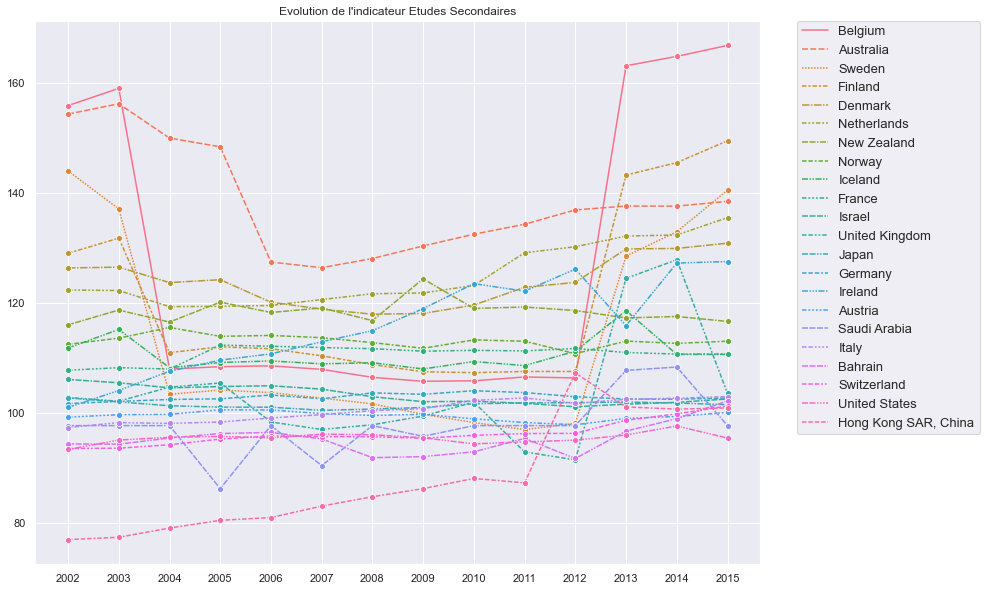

In [312]:
sns.lineplot(data=ind_secondaire_transposed,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='13')
plt.title('Evolution de l\'indicateur Etudes Secondaires')

## Indicateur Etudes Supérieures <a class="anchor" id="section_6_4"></a>

In [313]:
# Indicateur SE.TER.ENRR
ind_superieur = top_pays.loc[top_pays['Indicator Code']=='SE.TER.ENRR',:]

In [314]:
ind_superieur.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Moyenne'],
      dtype='object')

In [315]:
ind_superieur = ind_superieur[['Country Name', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']]

In [316]:
ind_superieur = ind_superieur.set_index('Country Name')

In [317]:
ind_superieur = ind_superieur.sort_values('2002', ascending=False)

In [318]:
ind_superieur_transposed = ind_superieur.T

In [319]:
ind_superieur_transposed

Country Name,Finland,United States,Australia,Sweden,Norway,New Zealand,Germany,Denmark,United Kingdom,Belgium,...,Italy,Iceland,France,"Hong Kong SAR, China",Japan,Ireland,Austria,Switzerland,Bahrain,Saudi Arabia
2002,84.959351,79.332962,75.752434,75.304626,73.372833,67.276680,64.931936,63.534271,62.601570,59.116268,...,54.949890,54.050018,53.379509,51.048189,50.707531,49.871571,46.535160,40.850559,35.743525,23.893221
2003,87.076881,81.313240,73.394257,81.438629,79.107819,68.980103,64.931936,67.534561,62.086349,59.864780,...,58.148819,62.174500,54.816662,31.312639,51.835781,51.293659,46.423519,43.940498,27.943110,27.397711
2004,89.663612,81.463562,71.698433,83.780327,79.263802,83.600929,64.931936,74.436569,59.363441,61.248032,...,61.814320,68.412239,55.218361,31.324270,53.576759,53.719101,47.200390,45.506310,35.743525,29.051149
2005,91.828644,82.084442,72.291924,81.974777,78.551308,80.641617,64.931936,80.423492,59.000992,61.404202,...,64.085068,70.376732,55.438808,32.302700,54.970970,54.243568,47.782242,45.714600,23.958241,29.593210
2006,93.287682,82.053001,71.482918,79.346848,77.683510,78.683792,64.931936,79.064941,59.126690,61.958858,...,65.774269,72.664658,55.476089,33.208191,57.105900,55.620701,49.413029,46.444908,22.794609,29.994530
2007,93.977943,83.031059,72.519951,74.976120,75.409569,78.920319,64.931936,78.584892,58.652000,61.349770,...,66.590607,71.721291,54.822540,41.496861,57.815350,57.836102,51.228519,47.135220,35.743525,29.691771
2008,95.074463,85.006821,72.918541,71.123863,72.337173,78.031540,64.931936,75.703438,56.874008,62.102169,...,66.441681,74.103279,54.519909,54.394001,57.639069,55.312569,56.149979,48.711830,35.743525,30.002939
2009,91.829498,88.581741,76.765373,71.451881,72.706467,82.603592,64.931936,74.300941,58.153419,65.198143,...,66.811943,74.323486,54.938709,55.434849,57.678341,57.830299,60.716579,50.014671,35.743525,30.967331
2010,94.119141,94.228012,80.917084,74.684128,72.886917,82.517502,64.931936,73.619652,59.066959,67.710922,...,66.204277,78.353157,57.127079,58.486809,58.075241,63.054420,68.732178,52.792740,35.743525,36.514511
2011,95.601837,96.322403,83.470757,73.945091,73.085793,81.707123,64.931936,76.801147,58.985909,69.725632,...,66.176971,80.942360,58.024979,60.549740,59.923988,65.782837,71.010902,54.338268,43.965721,41.315460


In [320]:
ind_superieur_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 2002 to 2015
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Finland               14 non-null     float64
 1   United States         14 non-null     float64
 2   Australia             14 non-null     float64
 3   Sweden                14 non-null     float64
 4   Norway                14 non-null     float64
 5   New Zealand           14 non-null     float64
 6   Germany               14 non-null     float64
 7   Denmark               14 non-null     float64
 8   United Kingdom        14 non-null     float64
 9   Belgium               14 non-null     float64
 10  Israel                14 non-null     float64
 11  Netherlands           14 non-null     float64
 12  Italy                 14 non-null     float64
 13  Iceland               14 non-null     float64
 14  France                14 non-null     float64
 15  Hong Kong SAR, China  14 

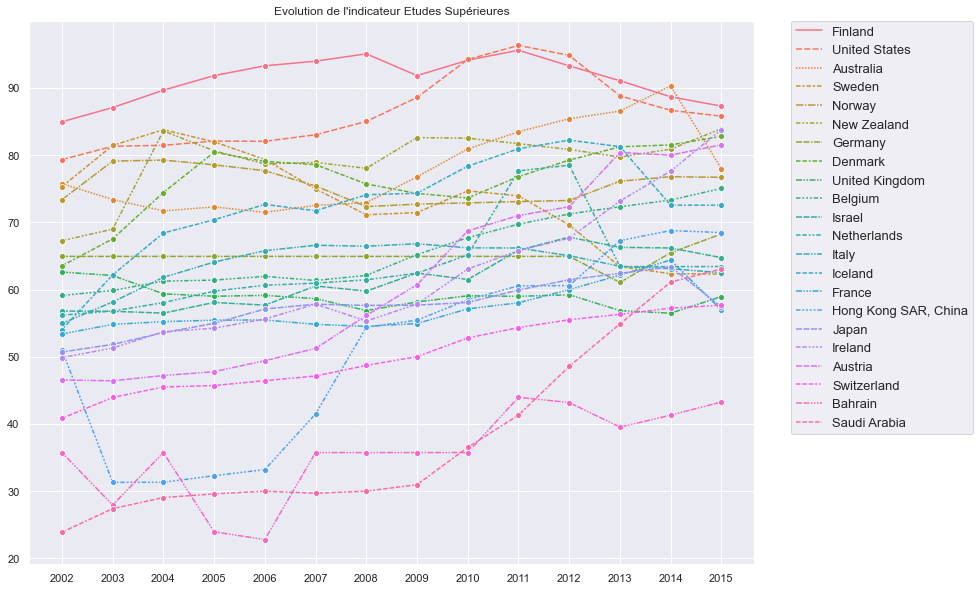

In [321]:
g = sns.lineplot(data=ind_superieur_transposed,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='13')
plt.title('Evolution de l\'indicateur Etudes Supérieures')
plt.show()

In [322]:
ind_superieur_transposed.describe()

Country Name,Finland,United States,Australia,Sweden,Norway,New Zealand,Germany,Denmark,United Kingdom,Belgium,...,Italy,Iceland,France,"Hong Kong SAR, China",Japan,Ireland,Austria,Switzerland,Bahrain,Saudi Arabia
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,91.266194,86.394845,77.960511,73.263540,75.518151,79.166793,64.931936,76.342644,58.960106,65.827739,...,63.648520,72.550805,56.945201,51.048189,57.427794,61.912381,61.388094,50.154446,35.743525,38.288853
std,3.282252,5.498232,6.302746,7.112900,2.553559,5.013916,1.425765,5.458125,1.730706,5.557089,...,3.474834,7.603828,3.186665,14.379092,3.727391,10.380754,13.825333,5.470097,6.749749,13.242567
min,84.959351,79.332962,71.482918,62.300770,72.337173,67.276680,61.056419,63.534271,56.476768,59.116268,...,54.949890,54.050018,53.379509,31.312639,50.707531,49.871571,46.423519,40.850559,22.794609,23.893221
25%,88.919563,82.060862,72.619598,69.993021,73.127209,78.742924,64.931936,74.334848,58.278065,61.363378,...,62.646016,70.712872,54.851583,35.280358,55.504703,54.510818,48.189939,45.897177,35.743525,29.617850
50%,91.829071,85.401299,76.258904,74.314610,75.763748,80.742485,64.931936,77.693020,58.993450,63.650156,...,64.559753,72.607732,55.457449,54.914425,57.658705,57.833200,58.433279,49.363251,35.743525,30.485135
75%,93.805378,88.751863,82.832338,78.336292,77.458422,82.314907,64.931936,80.130777,59.199028,70.864685,...,66.197451,77.345739,57.800504,60.577151,59.461802,67.172190,71.988886,55.209493,40.863094,46.750597
max,95.601837,96.322403,90.306503,83.780327,79.263802,83.931320,68.265587,82.786972,62.601570,75.036827,...,66.811943,82.227577,64.390472,68.778732,63.362591,83.777786,81.540512,57.672192,43.965721,63.066219


## Indicateur Internet <a class="anchor" id="section_6_5"></a>

In [323]:
# Indicateur IT.NET.USER.ZS
ind_internet = top_pays.loc[top_pays['Indicator Code']=='IT.NET.USER.ZS',:]

In [324]:
ind_internet.columns

Index(['Country Name', 'Country Code', 'Region', 'Indicator Name',
       'Indicator Code', 'Income Group', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Moyenne'],
      dtype='object')

In [325]:
ind_internet

,Country Name,Country Code,Region,Indicator Name,Indicator Code,Income Group,2002,2003,2004,2005,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Moyenne
65,Australia,AUS,East Asia & Pacific,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,75.533792,75.533792,75.533792,63.000000,...,69.450000,71.67,74.25,76.00,79.487698,79.000000,83.453497,84.000000,84.560515,75.533792
71,Austria,AUT,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,36.560000,42.700000,54.280000,58.000000,...,69.370000,72.87,73.45,75.17,78.739993,80.029994,80.618800,80.995825,83.940142,67.880340
83,Bahrain,BHR,Middle East & North Africa,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: nonOECD,18.050721,21.554945,21.458681,21.303734,...,32.910000,51.95,53.00,55.00,76.999966,88.000000,90.000040,90.503133,93.478301,53.032391
107,Belgium,BEL,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,46.330000,49.970000,53.860000,55.820000,...,64.440000,66.00,70.00,75.00,81.609996,80.719991,82.170200,85.000000,85.052942,68.263795
279,Denmark,DNK,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,64.250000,76.260000,80.930000,82.740000,...,85.030000,85.02,86.84,88.72,89.810013,92.260012,94.629700,95.990000,96.330502,86.104302
345,Finland,FIN,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,62.430000,69.220000,72.390000,74.480000,...,80.780000,83.67,82.49,86.89,88.709995,89.879998,91.514400,86.530393,86.422133,81.076208
351,France,FRA,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,30.180000,36.140000,39.150000,42.870000,...,66.090000,70.68,71.58,77.28,77.819999,81.440000,81.919800,83.750000,78.006038,63.126845
373,Germany,DEU,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,48.820000,55.900000,64.730000,68.710000,...,75.160000,78.00,79.00,82.00,81.270000,82.349998,84.170000,86.190000,87.589799,74.717843
449,"Hong Kong SAR, China",HKG,East Asia & Pacific,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: nonOECD,43.082383,52.200043,56.399880,56.900000,...,64.800000,66.70,69.40,72.00,72.200000,72.900000,74.200000,79.866270,84.948353,66.171209
461,Iceland,ISL,Europe & Central Asia,Individuals using the Internet (% of population),IT.NET.USER.ZS,High income: OECD,79.120000,83.140000,83.880000,87.000000,...,90.600000,91.00,93.00,93.39,94.819687,96.209800,96.546800,98.160000,98.200000,91.041163


In [326]:
ind_internet = ind_internet[['Country Name','2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']]

In [327]:
ind_internet = ind_internet.set_index('Country Name')

In [328]:
ind_internet.index

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Denmark', 'Finland',
       'France', 'Germany', 'Hong Kong SAR, China', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Saudi Arabia', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'],
      dtype='object', name='Country Name')

In [329]:
ind_internet

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,
Australia,75.533792,75.533792,75.533792,63.000000,66.000000,69.450000,71.67,74.25,76.00,79.487698,79.000000,83.453497,84.000000,84.560515
Austria,36.560000,42.700000,54.280000,58.000000,63.600000,69.370000,72.87,73.45,75.17,78.739993,80.029994,80.618800,80.995825,83.940142
Bahrain,18.050721,21.554945,21.458681,21.303734,28.243952,32.910000,51.95,53.00,55.00,76.999966,88.000000,90.000040,90.503133,93.478301
Belgium,46.330000,49.970000,53.860000,55.820000,59.720000,64.440000,66.00,70.00,75.00,81.609996,80.719991,82.170200,85.000000,85.052942
Denmark,64.250000,76.260000,80.930000,82.740000,86.650000,85.030000,85.02,86.84,88.72,89.810013,92.260012,94.629700,95.990000,96.330502
Finland,62.430000,69.220000,72.390000,74.480000,79.660000,80.780000,83.67,82.49,86.89,88.709995,89.879998,91.514400,86.530393,86.422133
France,30.180000,36.140000,39.150000,42.870000,46.870000,66.090000,70.68,71.58,77.28,77.819999,81.440000,81.919800,83.750000,78.006038
Germany,48.820000,55.900000,64.730000,68.710000,72.160000,75.160000,78.00,79.00,82.00,81.270000,82.349998,84.170000,86.190000,87.589799
"Hong Kong SAR, China",43.082383,52.200043,56.399880,56.900000,60.800000,64.800000,66.70,69.40,72.00,72.200000,72.900000,74.200000,79.866270,84.948353


In [330]:
ind_internet.loc[:, '2002':'2015']=ind_internet.loc[:, '2002':'2015'].fillna(method='ffill', axis=1)


In [331]:
ind_internet = ind_internet.sort_values('2002', ascending=False)

In [332]:
ind_internet

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,
Iceland,79.120000,83.140000,83.880000,87.000000,89.510000,90.600000,91.00,93.00,93.39,94.819687,96.209800,96.546800,98.160000,98.200000
Australia,75.533792,75.533792,75.533792,63.000000,66.000000,69.450000,71.67,74.25,76.00,79.487698,79.000000,83.453497,84.000000,84.560515
Norway,72.840000,78.130000,77.690000,81.990000,82.550000,86.930000,90.57,92.08,93.39,93.489983,94.649978,95.053400,96.300000,96.810326
Sweden,70.570000,79.130000,83.890000,84.830000,87.760000,82.010000,90.00,91.00,90.00,92.769986,93.179988,94.783600,92.520000,90.610197
Denmark,64.250000,76.260000,80.930000,82.740000,86.650000,85.030000,85.02,86.84,88.72,89.810013,92.260012,94.629700,95.990000,96.330502
Finland,62.430000,69.220000,72.390000,74.480000,79.660000,80.780000,83.67,82.49,86.89,88.709995,89.879998,91.514400,86.530393,86.422133
Switzerland,61.400000,65.100000,67.800000,70.100000,75.700000,77.200000,79.20,81.30,83.90,85.193028,85.200000,86.340000,87.400000,87.479056
Netherlands,61.290000,64.350000,68.520000,81.000000,83.700000,85.820000,87.42,89.63,90.72,91.419996,92.859992,93.956400,91.666666,91.724138
New Zealand,59.080753,60.962540,61.847628,62.720212,69.000000,69.760000,72.03,79.70,80.46,81.230000,81.644470,82.780000,84.000000,85.200000


In [333]:
ind_internet_transposed = ind_internet.T

Text(0.5, 1.0, "Evolution de l'indicateur accès à Internet")

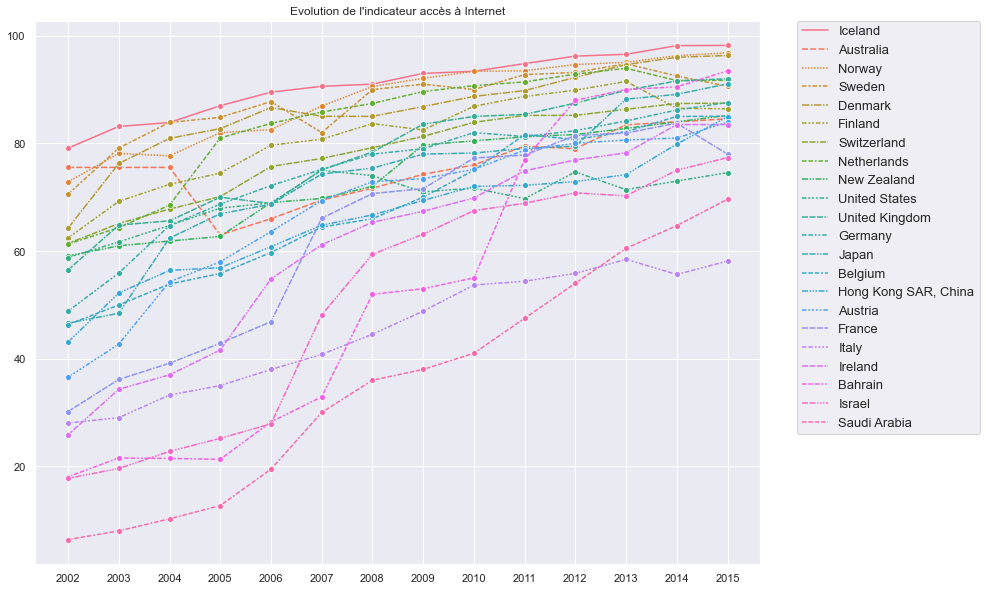

In [334]:
sns.lineplot(data=ind_internet_transposed,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='13')
plt.title('Evolution de l\'indicateur accès à Internet')

On constate une évolution positive importante de cet indicateur entre 2002 et 2015.

## Indicateur Stabilité Politique <a class="anchor" id="section_6_6"></a>

In [335]:
# Indicateur PV.EST
ind_stabilite = top_pays.loc[top_pays['Indicator Code']=='PV.EST',:]

In [336]:
ind_stabilite = ind_stabilite[['Country Name','2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015']]

In [337]:
ind_stabilite = ind_stabilite.set_index('Country Name')

In [338]:
ind_stabilite = ind_stabilite.sort_values('2002', ascending=False)

In [339]:
ind_stabilite

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,
Finland,1.755193,1.688117,1.620260,1.595862,1.501351,1.487837,1.445845,1.459815,1.423607,1.393471,1.400765,1.385172,1.282197,1.040587
Iceland,1.621677,1.517588,1.456844,1.444746,1.454132,1.484785,1.215352,1.190854,1.022254,1.244010,1.245032,1.287134,1.246975,1.308164
Norway,1.610245,1.205565,1.197584,1.296116,1.253358,1.145414,1.285150,1.275410,1.332312,1.337977,1.327470,1.352092,1.119959,1.161716
Switzerland,1.544934,1.247232,1.228192,1.197640,1.269325,1.234161,1.223261,1.307553,1.258594,1.300342,1.418336,1.401140,1.402653,1.339359
Denmark,1.527140,1.204807,1.085029,1.074679,1.047865,1.117682,1.065299,1.000632,1.040961,1.100293,0.914911,0.959233,0.951780,0.897650
Ireland,1.507424,1.349686,1.172185,1.299880,1.191983,1.214467,1.186240,1.056545,1.020165,0.948999,0.941073,0.901076,1.052991,0.908455
Sweden,1.478318,1.342789,1.362902,1.301027,1.294893,1.271177,1.129976,1.085468,1.094170,1.230688,1.170597,1.127778,1.065415,0.947106
Austria,1.362206,0.963399,1.090582,1.105386,1.075933,1.283752,1.339206,1.190602,1.152648,1.193522,1.340567,1.364101,1.270700,1.143079
New Zealand,1.322602,1.189064,1.500640,1.253895,1.255410,1.243147,1.162778,1.070571,1.236489,1.376731,1.361366,1.453927,1.467928,1.525453


In [340]:
ind_stabilite_transposed = ind_stabilite.T

Text(0.5, 1.0, "Evolution de l'indicateur de Stabilité politique")

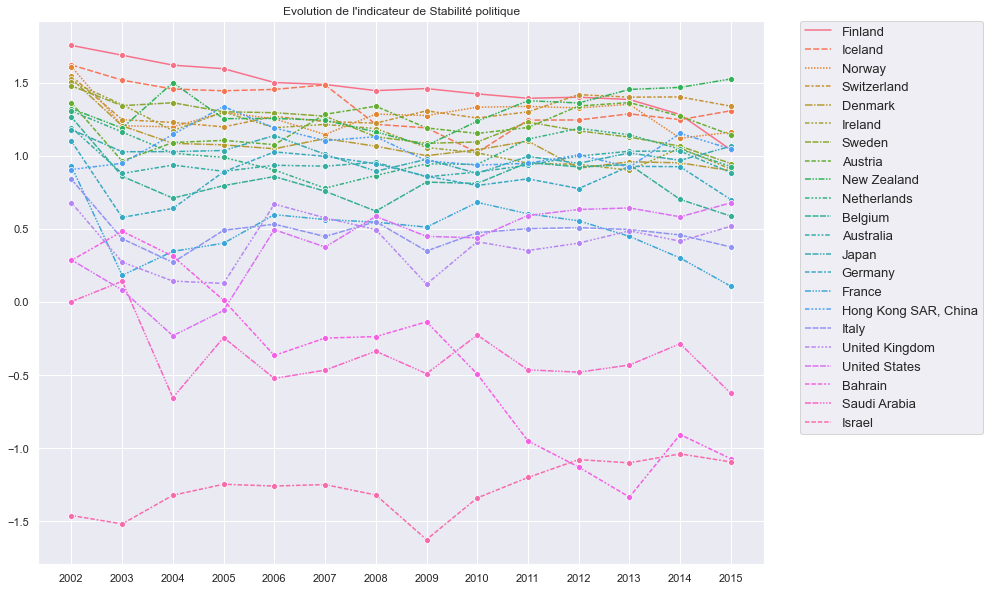

In [341]:
sns.lineplot(data=ind_stabilite_transposed,marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='13')
plt.title('Evolution de l\'indicateur de Stabilité politique')

# Conclusion <a class="anchor" id="chapter7"></a>

Je vais créer un graphique afin de faire apparaître mes pays sélectionné par rapport à l'ensemble des pays.

In [342]:
df_pivot = df_pivot.reset_index()

In [343]:
df_pivot

Indicator Code,Country Name,IT.NET.USER.ZS,NY.GNP.PCAP.PP.CD,PV.EST,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.TOTL
0,Afghanistan,8.260,1880.000,-2.571,55.644,3.767,33736494.0
1,Albania,56.900,11340.000,0.346,95.765,58.110,2880703.0
2,Algeria,38.200,14170.000,-1.090,81.824,36.922,39871528.0
3,Angola,22.000,6270.000,-0.501,24.607,9.308,27859305.0
4,Antigua and Barbuda,70.000,21010.000,1.005,102.705,17.224,99923.0
...,...,...,...,...,...,...,...
145,United Kingdom,92.000,41190.000,0.518,103.508,58.960,65128861.0
146,Uruguay,64.571,20570.000,1.004,98.834,55.566,3431552.0
147,Uzbekistan,42.800,6210.000,-0.373,95.640,8.788,31298900.0
148,Vanuatu,22.351,2551.538,0.478,54.816,4.740,264603.0


In [344]:
top_liste = top_pays['Country Name'].unique();
top_liste

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Denmark', 'Finland',
       'France', 'Germany', 'Hong Kong SAR, China', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Saudi Arabia', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

In [345]:
other_liste = df_pivot[~df_pivot['Country Name'].isin(top_liste)]['Country Name'];
other_liste

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
144                Ukraine
146                Uruguay
147             Uzbekistan
148                Vanuatu
149               Zimbabwe
Name: Country Name, Length: 129, dtype: object

In [346]:
# Je crée une nouvelle colonne pour distinguer les pays sélectionnés
df_pivot['Pays selectionnes']= 0

In [347]:
df_pivot['Pays selectionnes'].loc[df_pivot['Country Name'].isin(top_liste)]=1


C:\Users\sarah\AppData\Local\Temp\ipykernel_8992\785891043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['Pays selectionnes'].loc[df_pivot['Country Name'].isin(top_liste)]=1


In [348]:
df_pivot.columns

Index(['Country Name', 'IT.NET.USER.ZS', 'NY.GNP.PCAP.PP.CD', 'PV.EST',
       'SE.SEC.ENRR', 'SE.TER.ENRR', 'SP.POP.TOTL', 'Pays selectionnes'],
      dtype='object', name='Indicator Code')

In [349]:
df_pivot.rename(columns={'IT.NET.USER.ZS':'Indicateur Internet', 'NY.GNP.PCAP.PP.CD':'Indicateur de Revenus',
       'PV.EST':'Indicateur Stabilité Politique', 'SE.SEC.ENRR': "Indicateur Etudes Secondaire", 'SE.TER.ENRR':'Indicateur Etudes Supérieures', 'SP.POP.TOTL':'Indicateur Population'}, inplace=True)

In [350]:
df_pivot = df_pivot.reset_index()

Text(0.5, 1.0, 'Position des pays sélectionnés ')

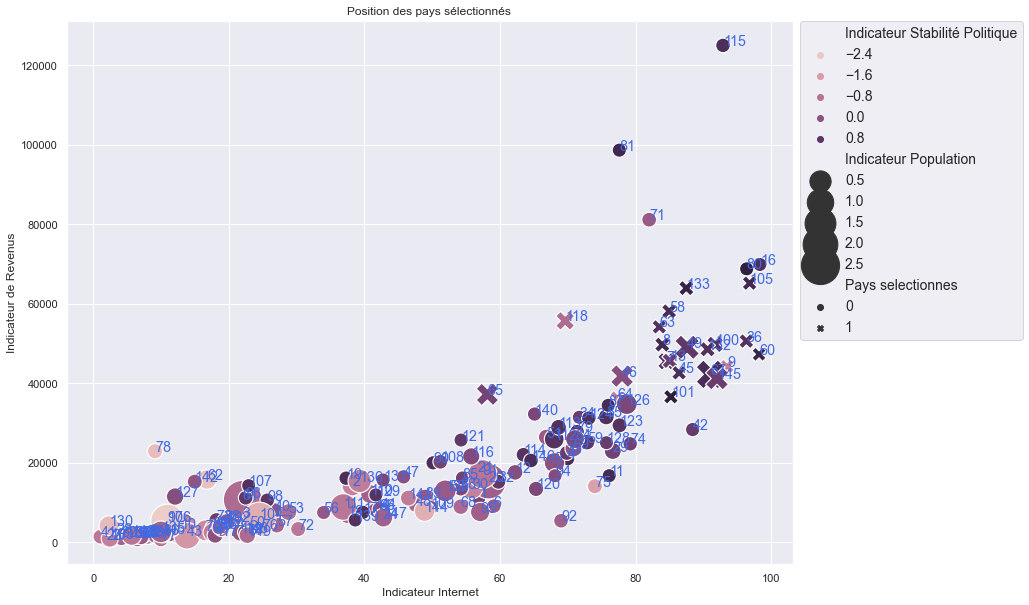

In [351]:
p1 = sns.scatterplot(data=df_pivot, x="Indicateur Internet", y="Indicateur de Revenus",hue="Indicateur Stabilité Politique",style='Pays selectionnes', size="Indicateur Population",sizes=(200,1500))
for line in range(0,df_pivot.shape[0]):
     p1.text(df_pivot["Indicateur Internet"][line]+0.01, df_pivot["Indicateur de Revenus"][line], 
     df_pivot['index'][line], horizontalalignment='left', 
     size='large', color='royalblue')
p1.legend(fontsize=14,bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Position des pays sélectionnés ')

Les pays que j'ai sélectionné sont ceux qui réunissent les meilleurs paramètres pour chacun de mes indicateurs.